In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt

**Global Weather Daily updated data set**
/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv

In [203]:
import pandas as pd
df = pd.read_csv("/kaggle/input/daily-global-weather-csv/GlobalWeatherRepository.csv")


In [ ]:
# **Initial analysis on the dataset** 

In [204]:
new_columns = ["country", "location_name", "latitude", "longitude", "timezone", "last_updated", "temperature_celsius", "temperature_fahrenheit", "condition_text", "wind_mph", "wind_kph", "wind_degree", "wind_direction", "pressure_mb", "pressure_in", "humidity", "cloud", "visibility_km", "uv_index", "sunrise","sunset","moonrise","moonset","moon_phase","moon_illumination"]

In [205]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93


In [206]:
print("Shape of Dataset:", df.shape)


Shape of Dataset: (18319, 41)


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18319 entries, 0 to 18318
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       18319 non-null  object 
 1   location_name                 18319 non-null  object 
 2   latitude                      18319 non-null  float64
 3   longitude                     18319 non-null  float64
 4   timezone                      18319 non-null  object 
 5   last_updated_epoch            18319 non-null  int64  
 6   last_updated                  18319 non-null  object 
 7   temperature_celsius           18319 non-null  float64
 8   temperature_fahrenheit        18319 non-null  float64
 9   condition_text                18319 non-null  object 
 10  wind_mph                      18319 non-null  float64
 11  wind_kph                      18319 non-null  float64
 12  wind_degree                   18319 non-null  int64  
 13  w

# **Examining Missing Values**

In [208]:
df.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [209]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


<Axes: >

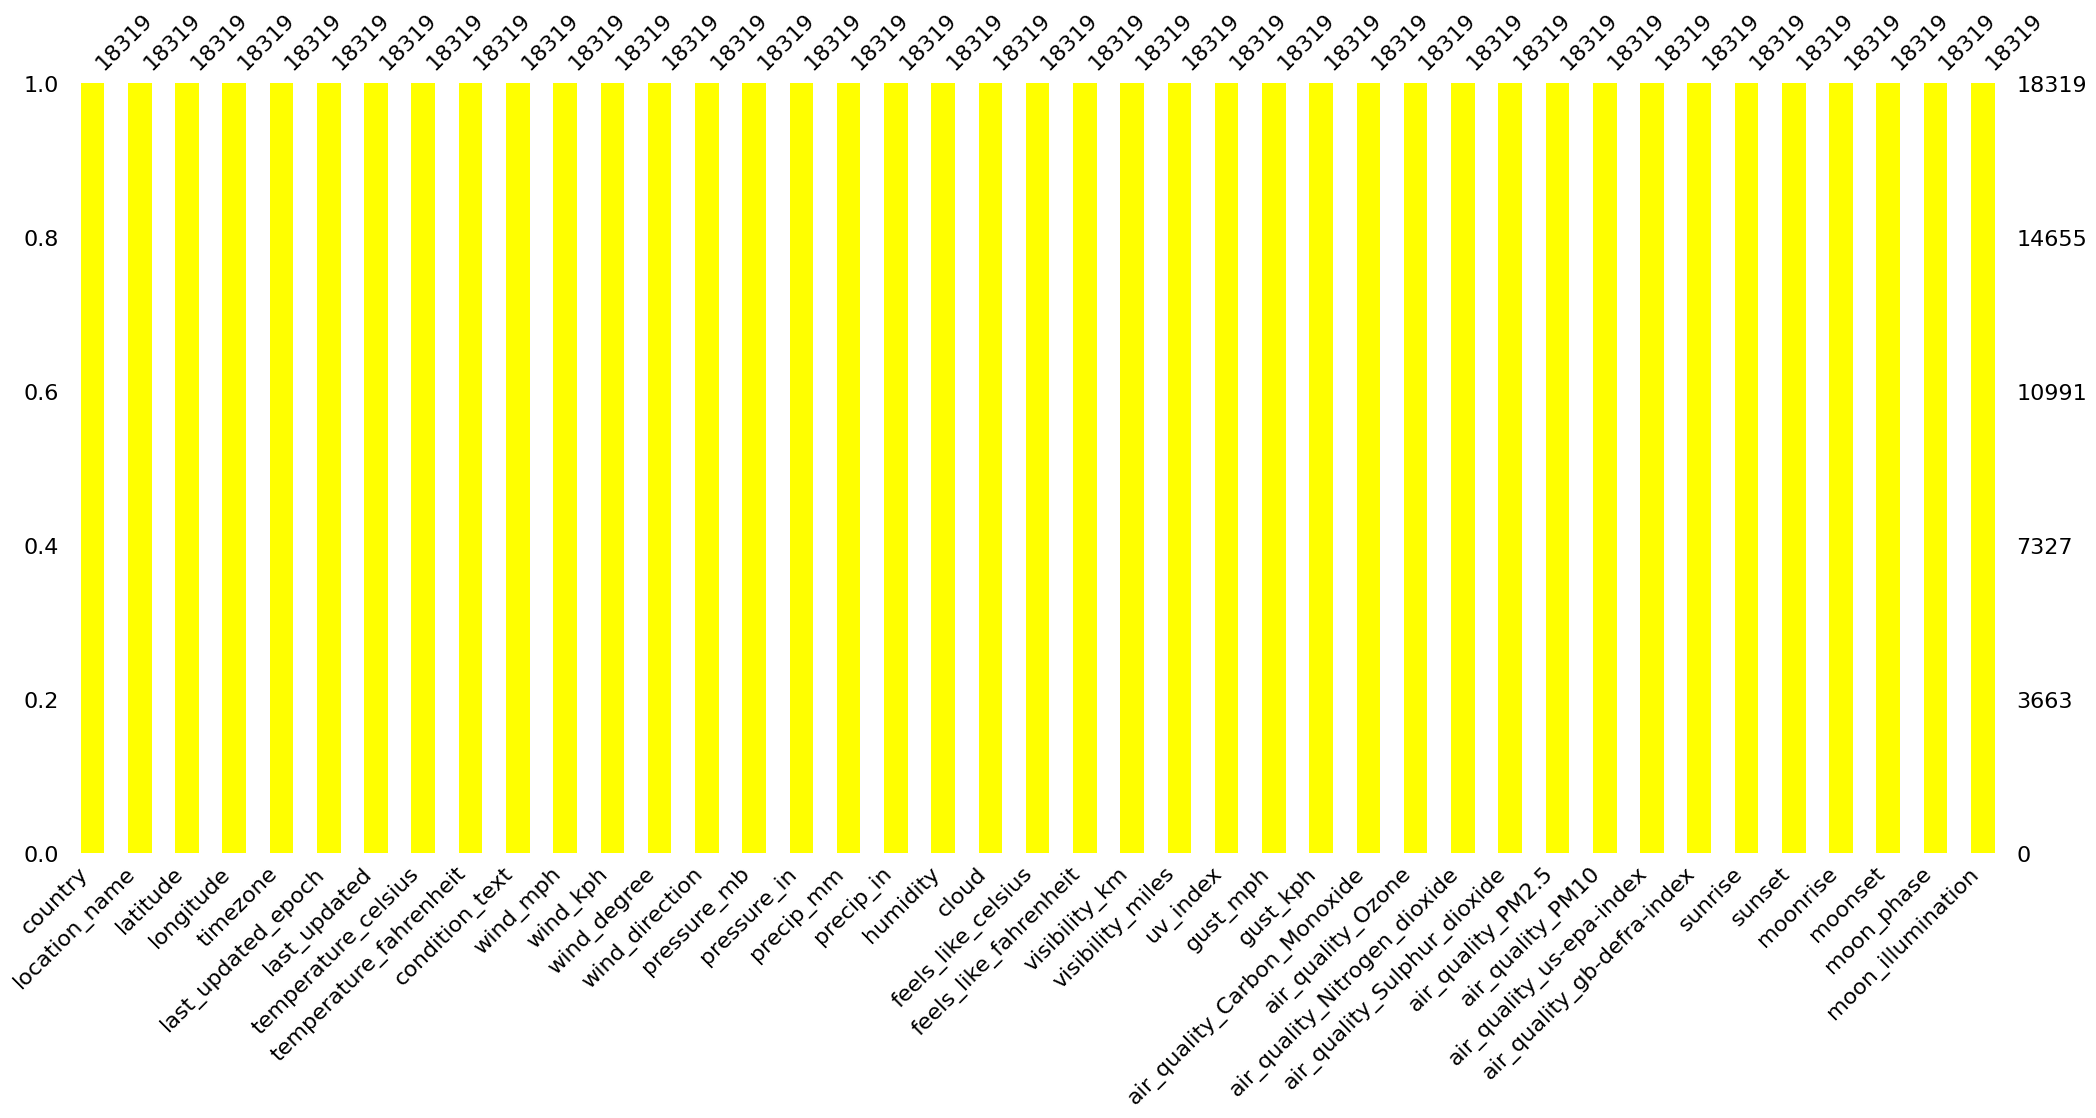

In [210]:
import missingno
missingno.bar(df, color = "yellow")

In [211]:
df["temperature_celsius"].value_counts()

temperature_celsius
 25.0    919
 27.0    912
 26.0    908
 28.0    792
 29.0    716
        ... 
-12.9      1
-16.5      1
 42.1      1
-13.8      1
-2.9       1
Name: count, Length: 509, dtype: int64

In [270]:
df["temperature_celsius"].value_counts().sum()

18319

In [213]:
df["temperature_celsius"].value_counts().count()

509

In [214]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
country,185
location_name,197
latitude,193
longitude,194
timezone,183
last_updated_epoch,149
last_updated,2831
temperature_celsius,509
temperature_fahrenheit,814
condition_text,38


# **Separating variables (Numeric or Categorical)** 

In [215]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93


In [216]:
numeric_var = ["latitude", "longitude",  "last_updated", "temperature_celsius", "temperature_fahrenheit", "wind_mph", "wind_kph", "wind_degree", "pressure_mb", "pressure_in", "humidity", "cloud", "visibility_km", "uv_index", "sunrise","sunset","moonrise","moonset","moon_illumination"]
categoric_var = [ "condition_text", "wind_direction","moon_phase"]

# **Examining Statistics of Variables** 

In [217]:
df[numeric_var].describe()

,latitude,longitude,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,humidity,cloud,visibility_km,uv_index,moon_illumination
count,18319.000000,18319.000000,18319.000000,18319.000000,18319.000000,18319.000000,18319.000000,18319.000000,18319.000000,18319.000000,18319.000000,18319.000000,18319.000000,18319.000000
mean,19.300485,21.909484,20.586517,69.055805,6.893886,11.096354,161.710901,1013.210656,29.919307,72.484743,35.691959,9.686746,2.220754,52.933293
std,24.583206,65.701294,8.841416,15.915167,4.922915,7.923465,105.857011,6.691060,0.197384,20.293635,33.173633,2.553693,2.247650,35.133012
min,-41.300000,-175.200000,-31.000000,-23.800000,2.200000,3.600000,1.000000,964.000000,28.470000,4.000000,0.000000,0.000000,1.000000,0.000000
25%,3.750000,-6.840000,15.000000,59.000000,3.400000,5.400000,70.000000,1010.000000,29.830000,62.000000,0.000000,10.000000,1.000000,18.000000
50%,17.250000,23.240000,22.300000,72.200000,5.600000,9.000000,150.000000,1013.000000,29.910000,77.000000,25.000000,10.000000,1.000000,53.000000
75%,41.330000,50.580000,27.000000,80.600000,9.400000,15.100000,250.000000,1017.000000,30.030000,88.000000,75.000000,10.000000,1.000000,88.000000
max,63.830000,179.220000,45.400000,113.700000,87.700000,141.100000,360.000000,1053.000000,31.100000,100.000000,100.000000,32.000000,11.000000,100.000000


# **Analysis Outputs**

<Axes: xlabel='temperature_celsius', ylabel='Density'>

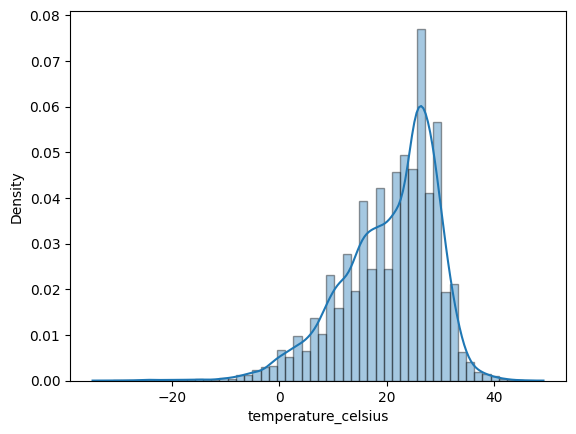

In [218]:
sns.distplot(df["temperature_celsius"], hist_kws = dict(linewidth = 1, edgecolor = "k"))

**Analysis of "temperature_celsius" variable according to Describe() method**

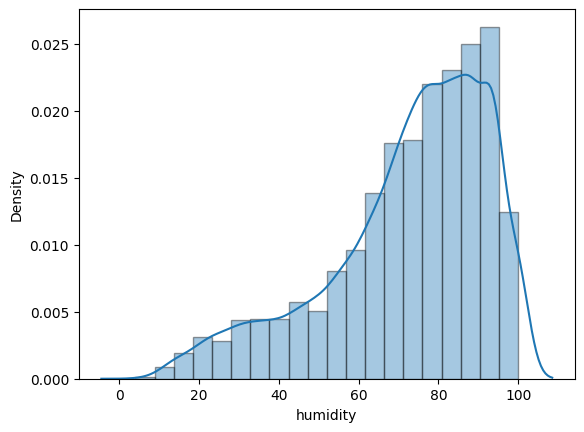

In [219]:
sns.distplot(df["humidity"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20);

**Analysis of "humidity" variable according to Describe() method**

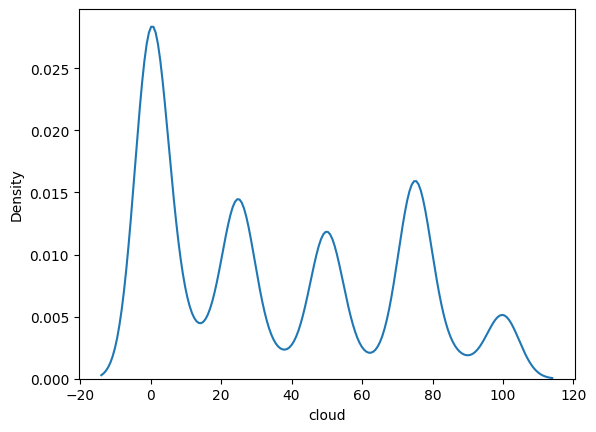

In [220]:
sns.distplot(df["cloud"], hist = False);

**Analysis of "cloud" variable according to Describe() method**

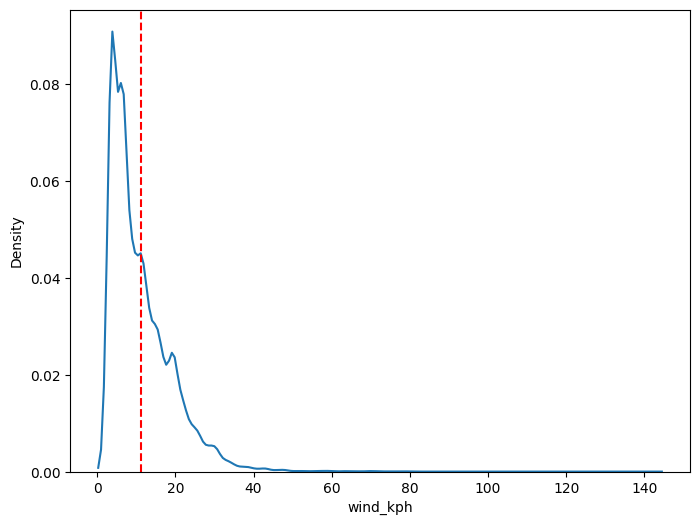

In [221]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["wind_kph"], hist = False, ax = y)
y.axvline(df["wind_kph"].mean(), color = "r", ls = "--");

**Analysis of "wind_kph" variable according to Describe() method**

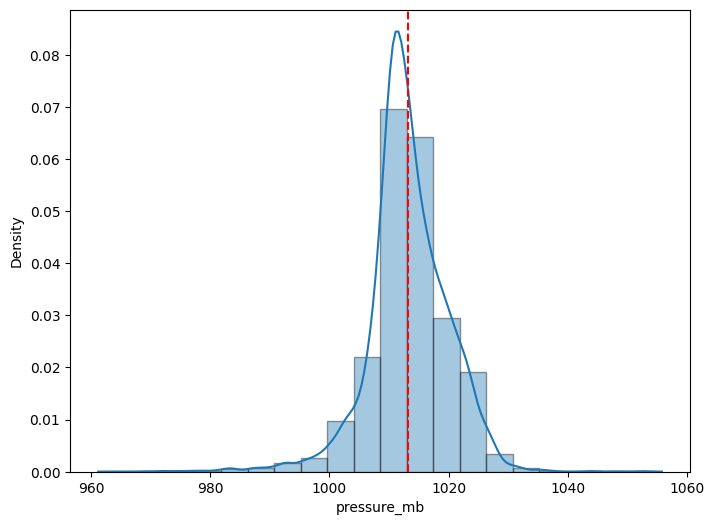

In [222]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["pressure_mb"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20, ax = y)
y.axvline(df["pressure_mb"].mean(), color = "r", ls = "--");

**Analysis of "pressure_mb" variable according to Describe() method**

In [223]:
numeric_var

['latitude',
 'longitude',
 'last_updated',
 'temperature_celsius',
 'temperature_fahrenheit',
 'wind_mph',
 'wind_kph',
 'wind_degree',
 'pressure_mb',
 'pressure_in',
 'humidity',
 'cloud',
 'visibility_km',
 'uv_index',
 'sunrise',
 'sunset',
 'moonrise',
 'moonset',
 'moon_illumination']

# **Numerical Variables(Analysis with Distplot)**

In [224]:
numeric_axis_name = ["Latitude", "Longitude", "Last Updated Date", "t C", "t F", "Wind mpH", "Wind kpH", "Wind Degree", "Pressure milib", "Pressure In", "Humidity", "Cloud", "Vision KM", "UV index", "sunrise", "sunset", "moonrise", "moonset", "moon illumination"]

In [225]:
list(zip(numeric_var, numeric_axis_name))

[('latitude', 'Latitude'),
 ('longitude', 'Longitude'),
 ('last_updated', 'Last Updated Date'),
 ('temperature_celsius', 't C'),
 ('temperature_fahrenheit', 't F'),
 ('wind_mph', 'Wind mpH'),
 ('wind_kph', 'Wind kpH'),
 ('wind_degree', 'Wind Degree'),
 ('pressure_mb', 'Pressure milib'),
 ('pressure_in', 'Pressure In'),
 ('humidity', 'Humidity'),
 ('cloud', 'Cloud'),
 ('visibility_km', 'Vision KM'),
 ('uv_index', 'UV index'),
 ('sunrise', 'sunrise'),
 ('sunset', 'sunset'),
 ('moonrise', 'moonrise'),
 ('moonset', 'moonset'),
 ('moon_illumination', 'moon illumination')]

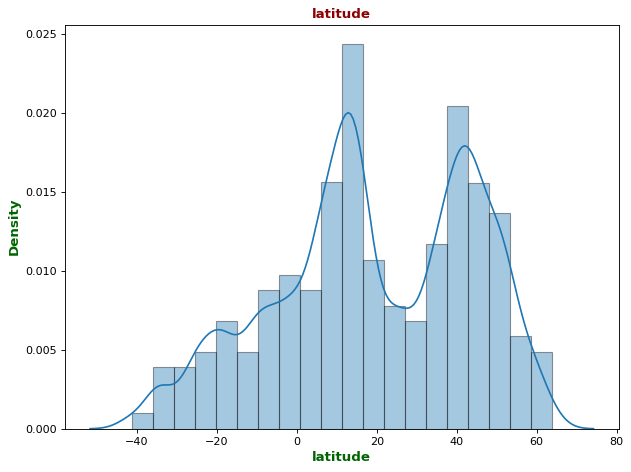

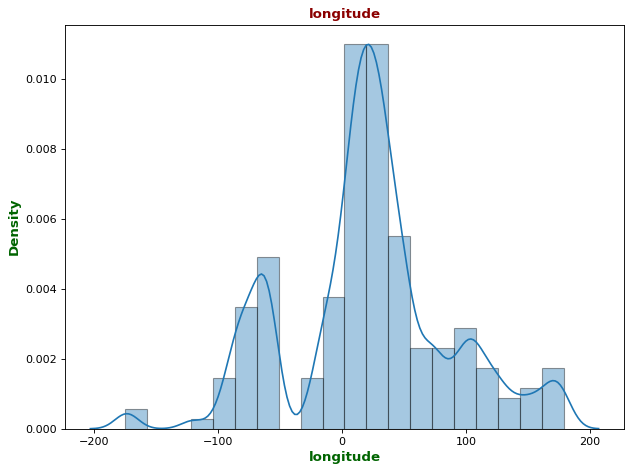

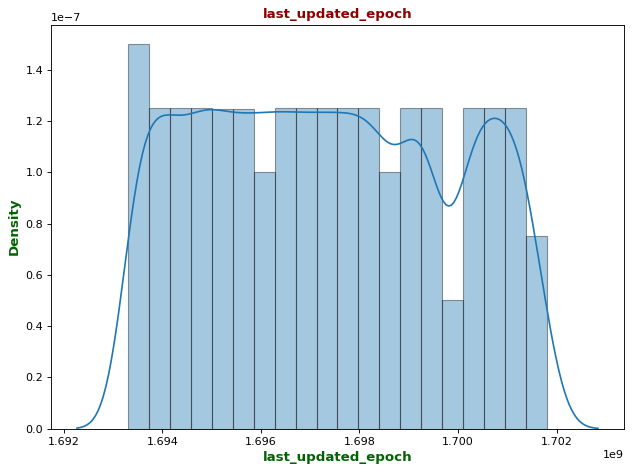

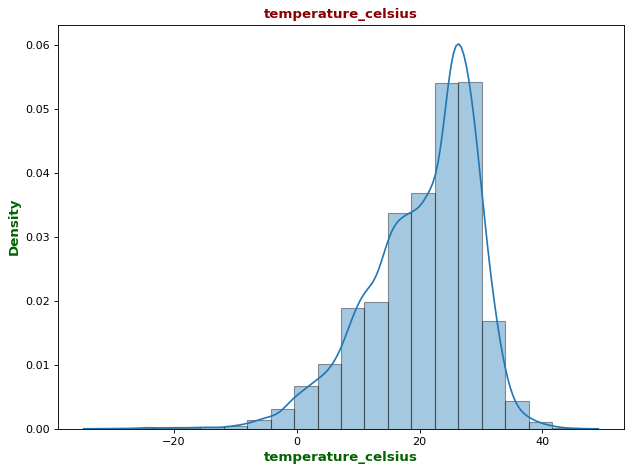

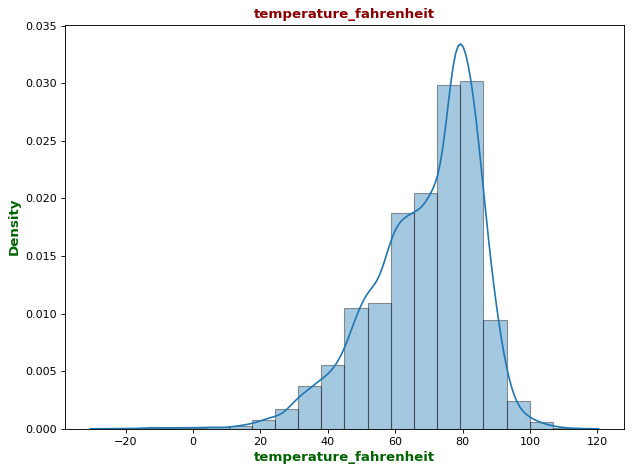

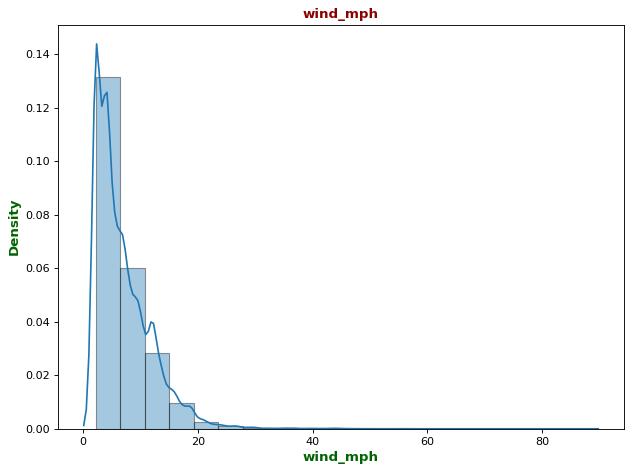

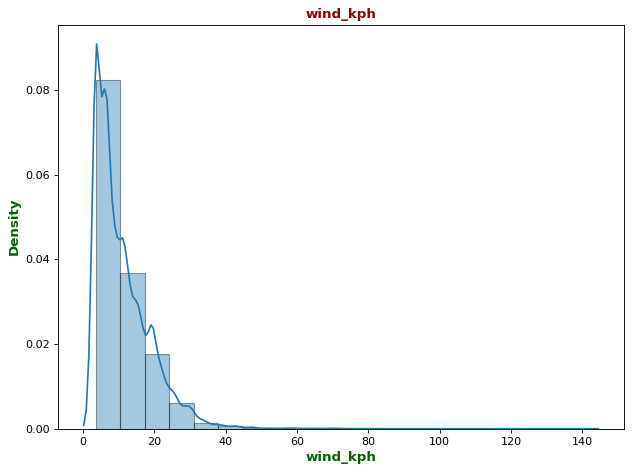

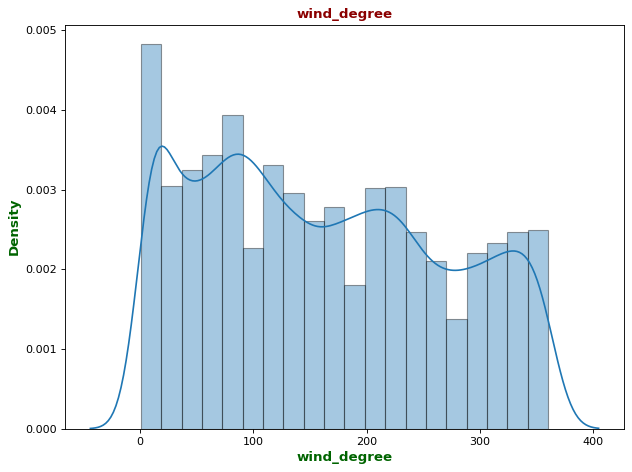

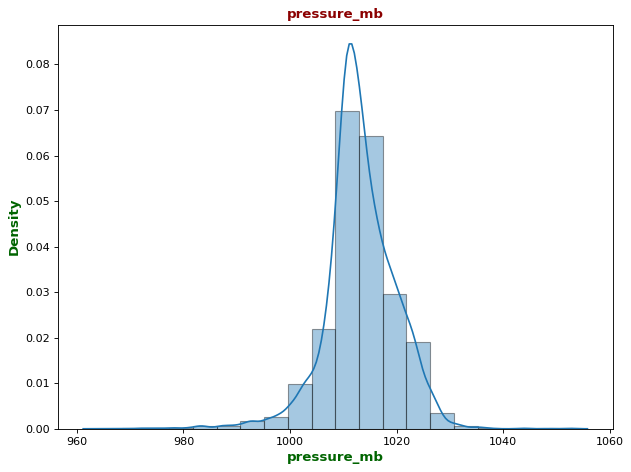

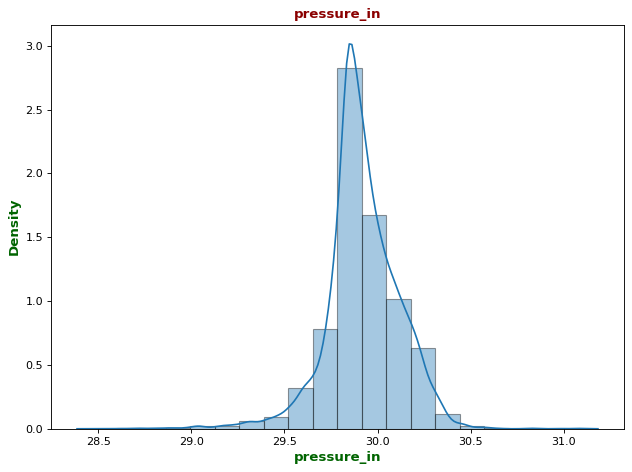

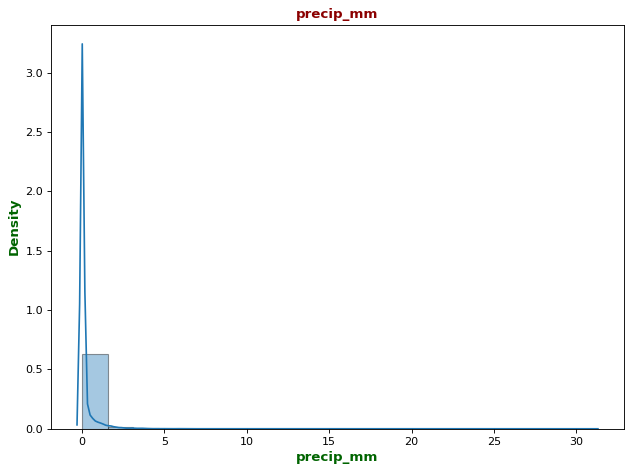

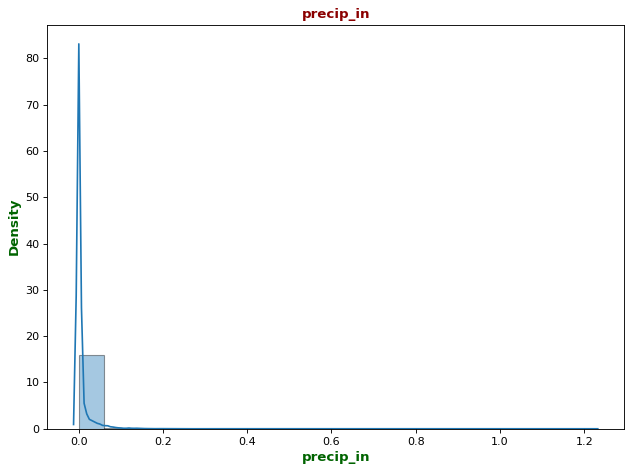

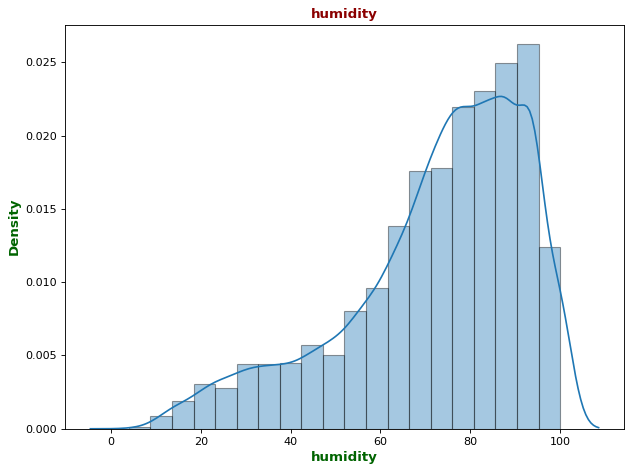

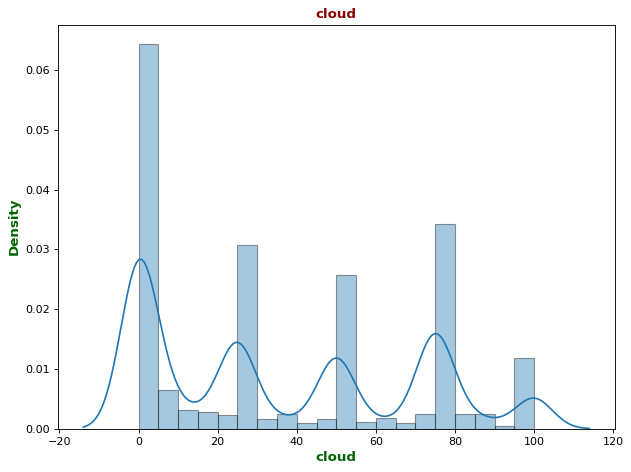

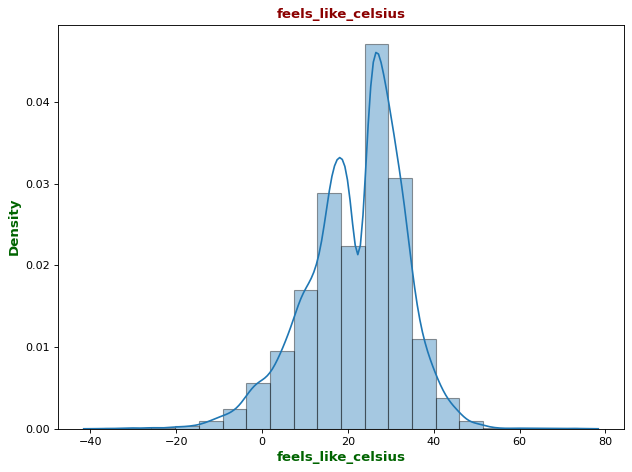

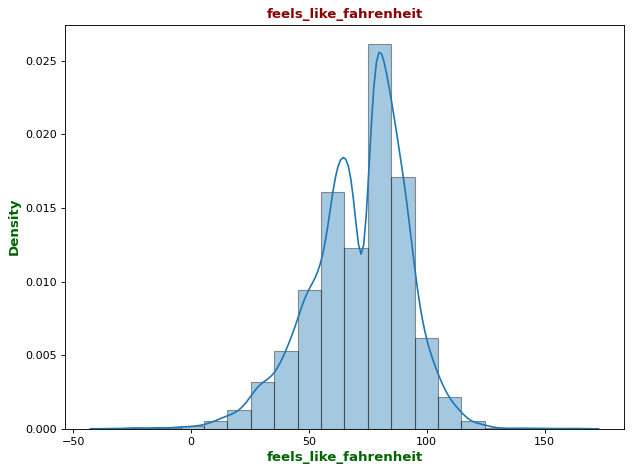

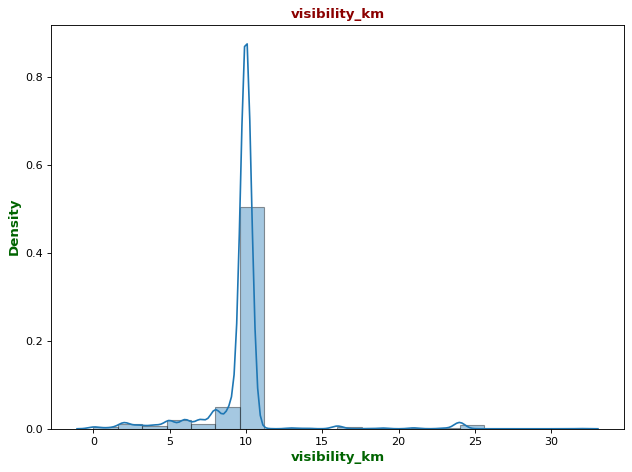

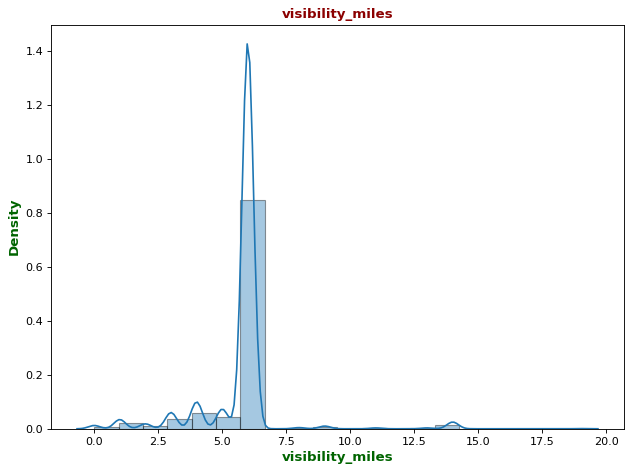

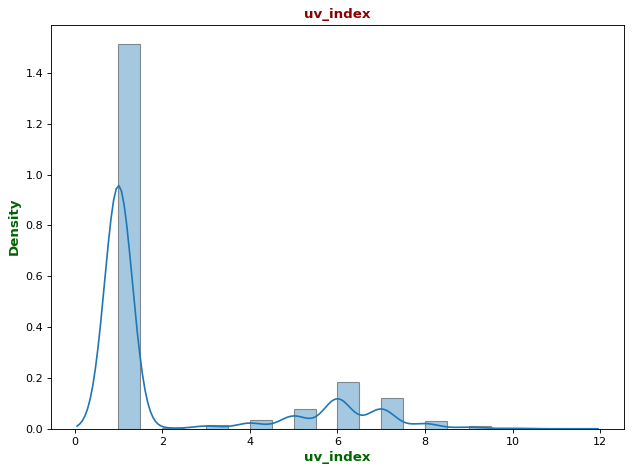

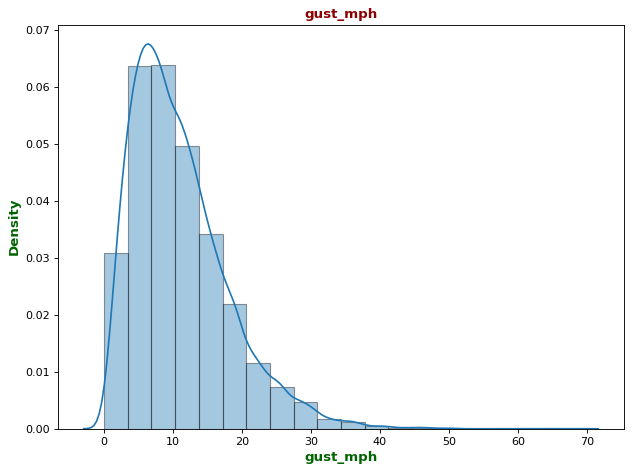

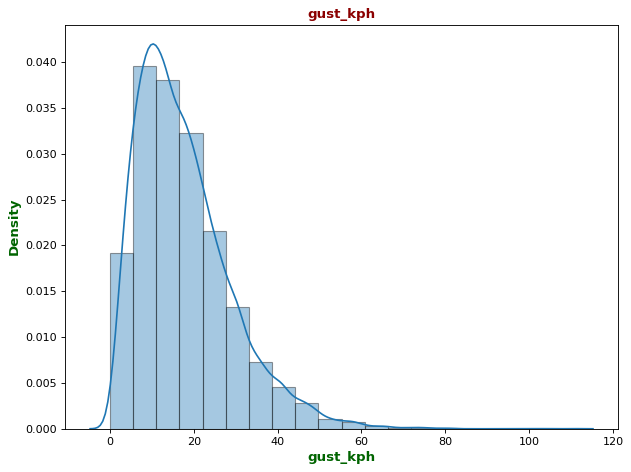

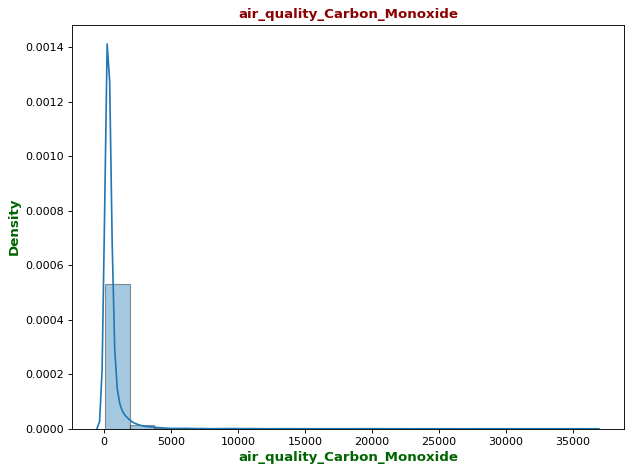

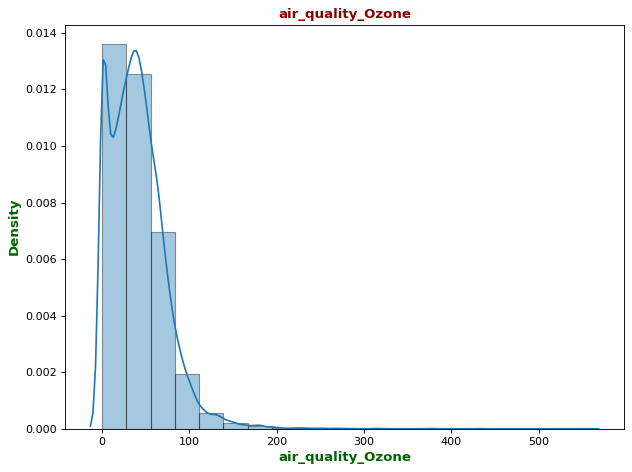

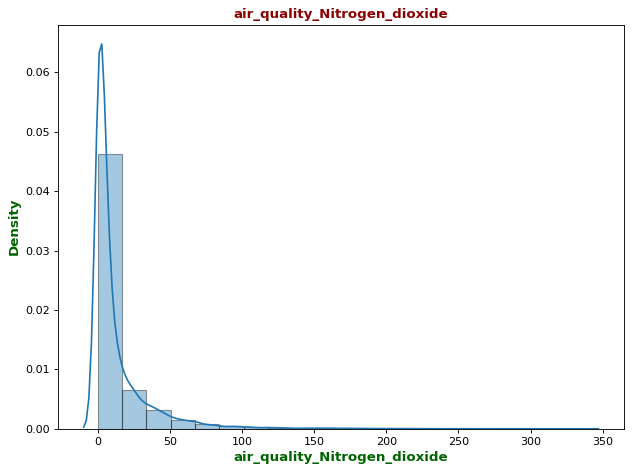

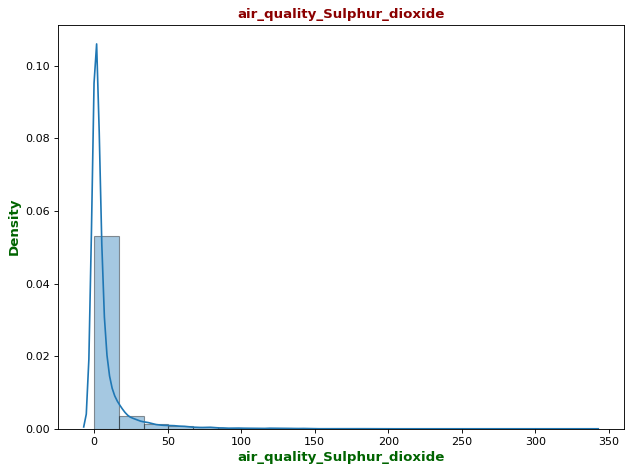

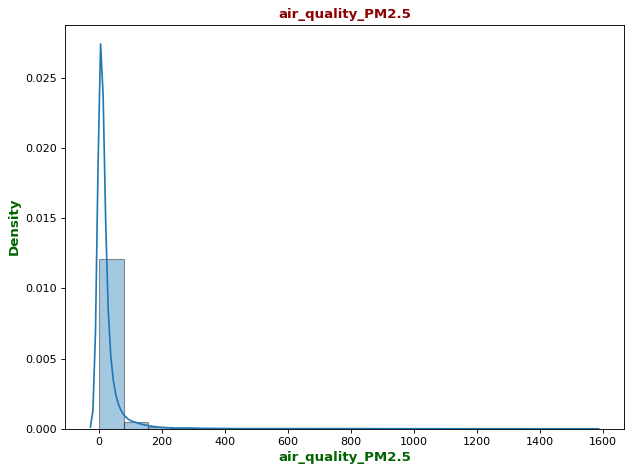

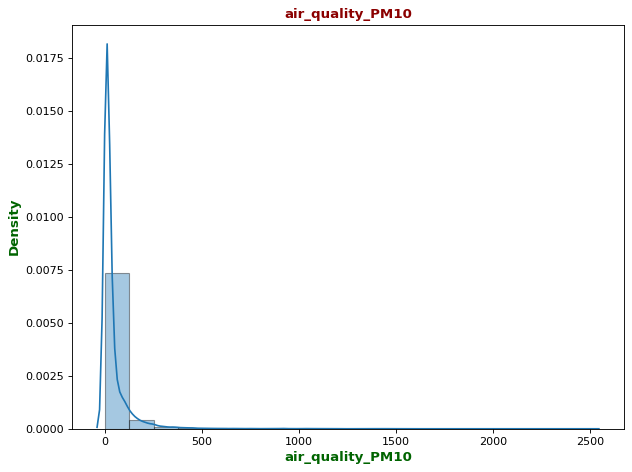

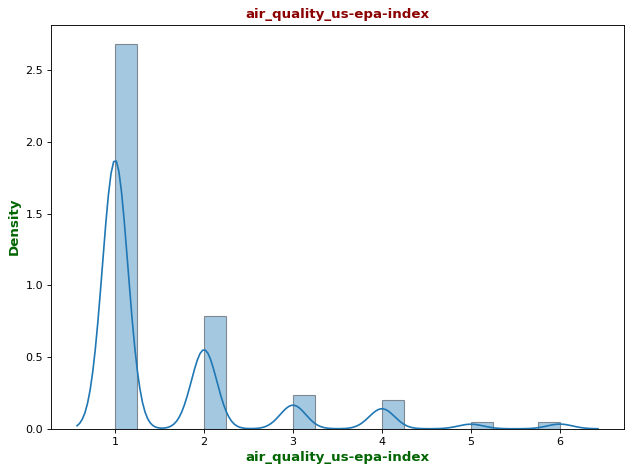

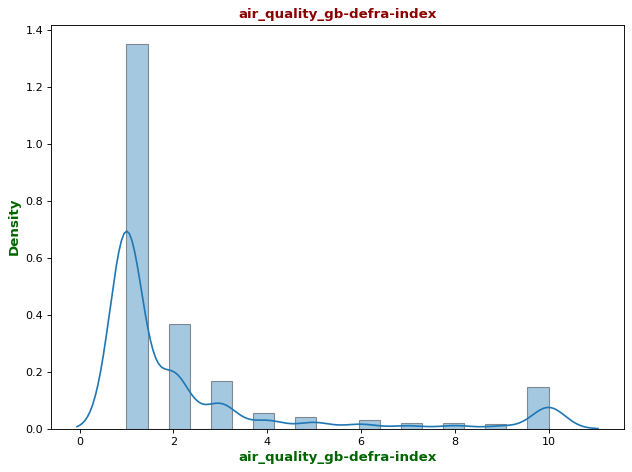

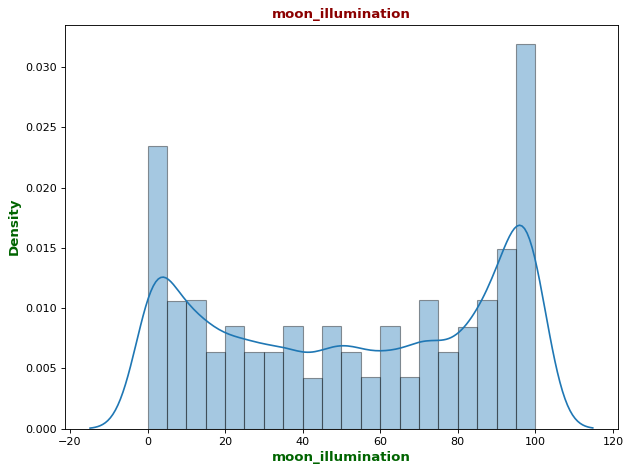

In [226]:
title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size": 12}
axis_font = {"family": "arial", "color": "darkgreen", "weight": "bold", "size": 12}

# Filter numeric columns
numeric_var = df.select_dtypes(include=['float64', 'int64']).columns
numeric_axis_name = df.select_dtypes(include=['float64', 'int64']).columns

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize=(8, 6), dpi=80)
    sns.distplot(df[i], hist_kws=dict(linewidth=1, edgecolor="k"), bins=20)

    plt.title(i, fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("Density", fontdict=axis_font)

    plt.tight_layout()
    plt.show()

#  **Categorical Variables(Analysis with Pie Chart)** 

In [227]:
categoric_var

['condition_text', 'wind_direction', 'moon_phase']

In [228]:
categoric_axis_name = [ "Weather Condition", "Wind Direction", "Moon Phase"]
categoric_var = [ "condition_text", "wind_direction","moon_phase"]

In [229]:
numeric_var = ["latitude", "longitude",  "last_updated", "temperature_celsius", "temperature_fahrenheit", "wind_mph", "wind_kph", "wind_degree", "pressure_mb", "pressure_in", "humidity", "cloud", "visibility_km", "uv_index", "sunrise","sunset","moonrise","moonset","moon_illumination"]
categoric_var = [ "condition_text", "wind_direction","moon_phase"]

In [230]:
list(zip(categoric_var, categoric_axis_name))

[('condition_text', 'Weather Condition'),
 ('wind_direction', 'Wind Direction'),
 ('moon_phase', 'Moon Phase')]

# **Simplifying the columns from dataset and their values**

In [231]:
df["condition_text"].value_counts()

condition_text
Partly cloudy                          7199
Clear                                  6228
Overcast                                807
Sunny                                   751
Patchy rain possible                    739
Light rain                              608
Mist                                    513
Light rain shower                       268
Patchy light rain with thunder          258
Moderate or heavy rain with thunder     183
Moderate rain                           138
Fog                                     136
Cloudy                                  106
Light snow                               67
Light drizzle                            54
Moderate or heavy rain shower            46
Thundery outbreaks possible              37
Patchy light drizzle                     31
Patchy light rain                        22
Moderate snow                            14
Moderate rain at times                   14
Heavy rain                               13
Heavy snow       

In [232]:
df["wind_direction"].value_counts()

wind_direction
N      2170
E      1739
S      1284
ENE    1266
NE     1185
ESE    1182
SSW    1091
SW     1056
NNE    1041
SE     1040
W       965
SSE     924
NNW     902
WSW     879
NW      820
WNW     775
Name: count, dtype: int64

In [233]:
list(df["condition_text"].value_counts())

[7199,
 6228,
 807,
 751,
 739,
 608,
 513,
 268,
 258,
 183,
 138,
 136,
 106,
 67,
 54,
 46,
 37,
 31,
 22,
 14,
 14,
 13,
 13,
 12,
 10,
 10,
 9,
 7,
 5,
 5,
 4,
 3,
 3,
 2,
 1,
 1,
 1,
 1]

In [234]:
list(df["condition_text"].value_counts().index)

['Partly cloudy',
 'Clear',
 'Overcast',
 'Sunny',
 'Patchy rain possible',
 'Light rain',
 'Mist',
 'Light rain shower',
 'Patchy light rain with thunder',
 'Moderate or heavy rain with thunder',
 'Moderate rain',
 'Fog',
 'Cloudy',
 'Light snow',
 'Light drizzle',
 'Moderate or heavy rain shower',
 'Thundery outbreaks possible',
 'Patchy light drizzle',
 'Patchy light rain',
 'Moderate snow',
 'Moderate rain at times',
 'Heavy rain',
 'Heavy snow',
 'Patchy light snow',
 'Freezing fog',
 'Light freezing rain',
 'Light sleet',
 'Torrential rain shower',
 'Patchy moderate snow',
 'Blowing snow',
 'Light snow showers',
 'Heavy rain at times',
 'Moderate or heavy snow showers',
 'Moderate or heavy sleet',
 'Moderate or heavy snow with thunder',
 'Patchy sleet possible',
 'Blizzard',
 'Light sleet showers']

# Replacing high descriptive categories into more simplified to prevent high recursion

In [235]:
data = {'wind_direction': ['N', 'E', 'S', 'ENE', 'NE', 'ESE', 'SSW', 'SW', 'NNE', 'SE', 'W', 'SSE', 'NNW', 'WSW', 'NW', 'WNW']}
df = pd.DataFrame(data)

wind_direction_mapping = {
    'N': 'North',
    'NNE': 'North',
    'NE': 'North',
    'ENE': 'East',
    'E': 'East',
    'ESE': 'East',
    'SE': 'South',
    'SSE': 'South',
    'S': 'South',
    'SSW': 'South',
    'SW': 'South',
    'WSW': 'West',
    'W': 'West',
    'WNW': 'West',
    'NW': 'North',
    'NNW': 'North'
}
df['wind_direction'] = df['wind_direction'].map(wind_direction_mapping)
print(df)

   wind_direction
0           North
1            East
2           South
3            East
4           North
5            East
6           South
7           South
8           North
9           South
10           West
11          South
12          North
13           West
14          North
15           West


# Analysing our categoric variables from the dataset after replacing descriptive values(for weather conditions and wind directions) on more simplified 

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


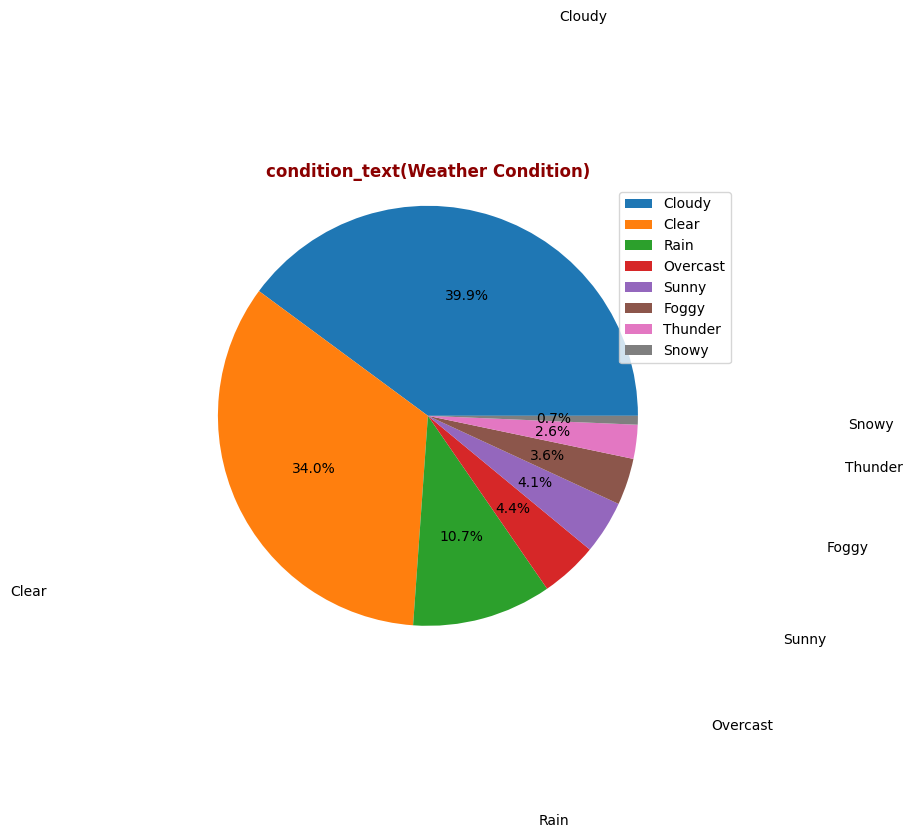

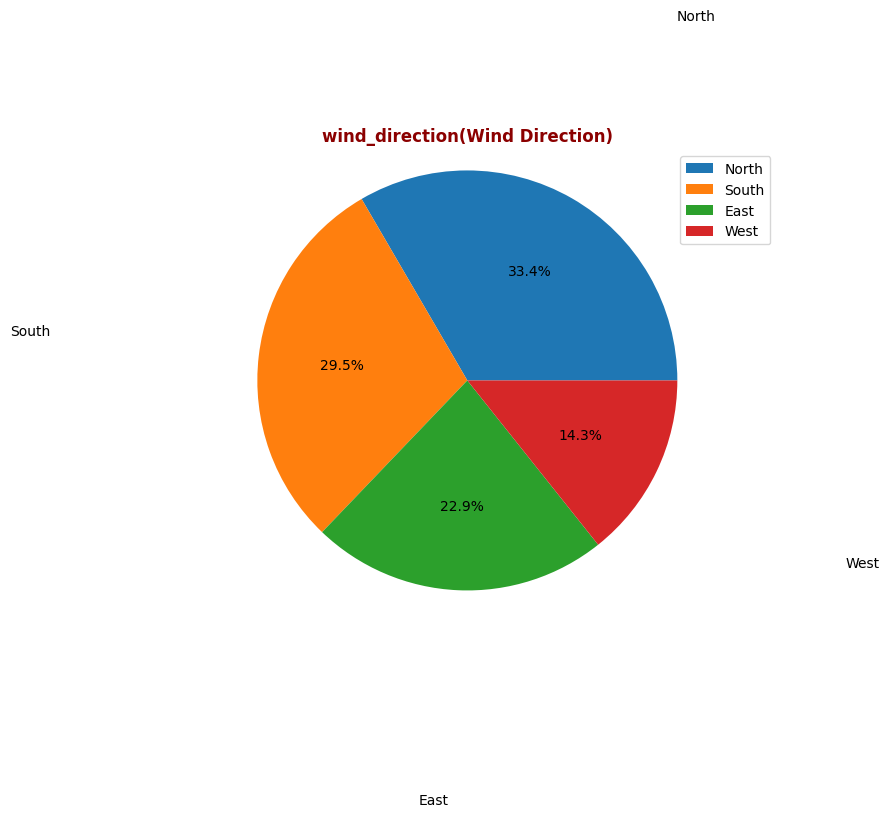

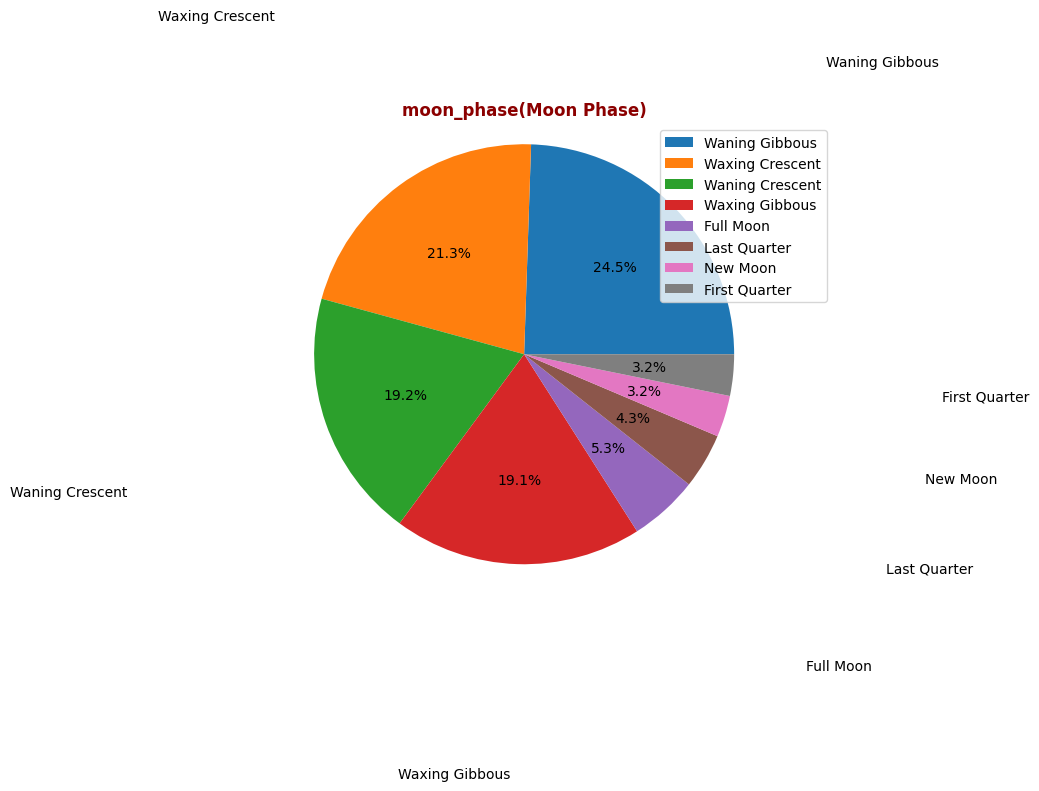

In [236]:
title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size": 12}
axis_font = {"family": "arial", "color": "darkgreen", "weight": "bold", "size": 12}

numeric_var = df.select_dtypes(include=['float64', 'int64']).columns
numeric_axis_name = df.select_dtypes(include=['float64', 'int64']).columns

df = pd.read_csv("/kaggle/input/daily-global-weather-csv/GlobalWeatherRepository.csv")

print(df.columns)

wind_direction_mapping = {
    'N': 'North',
    'NNE': 'North',
    'NE': 'North',
    'ENE': 'East',
    'E': 'East',
    'ESE': 'East',
    'SE': 'South',
    'SSE': 'South',
    'S': 'South',
    'SSW': 'South',
    'SW': 'South',
    'WSW': 'West',
    'W': 'West',
    'WNW': 'West',
    'NW': 'North',
    'NNW': 'North'
}

df['wind_direction'] = df['wind_direction'].map(wind_direction_mapping)
# This step was required as there are too much categories of weather conditions and I had to change them on more simplified condition words
# In other case the graph would had too much descriptions and details for 18320 rows out of global weather dataset and it would be hard to analyse
# the given data
weather_mapping = {

    'Partly cloudy': 'Cloudy',

    'Clear': 'Clear',

    'Overcast': 'Overcast',

    'Sunny': 'Sunny',

    'Patchy rain possible': 'Rain',

    'Light rain': 'Rain',

    'Mist': 'Foggy',

    'Light rain shower': 'Rain',

    'Patchy light rain with thunder': 'Thunder',

    'Moderate or heavy rain with thunder': 'Thunder',

    'Moderate rain': 'Rain',

    'Fog': 'Foggy',

    'Cloudy': 'Cloudy',

    'Light snow': 'Snowy',

    'Light drizzle': 'Rain',

    'Moderate or heavy rain shower': 'Rain',

    'Thundery outbreaks possible': 'Thunder',

    'Patchy light drizzle': 'Rain',

    'Patchy light rain': 'Rain',

    'Moderate snow': 'Snowy',

    'Moderate rain at times': 'Rain',

    'Heavy rain': 'Rain',

    'Heavy snow': 'Snowy',

    'Patchy light snow': 'Snowy',

    'Freezing fog': 'Foggy',

    'Light freezing rain': 'Rain',

    'Light sleet': 'Rain',

    'Torrential rain shower': 'Rain',

    'Patchy moderate snow': 'Snowy',

    'Blowing snow': 'Snowy',

    'Light snow showers': 'Snowy',

    'Heavy rain at times': 'Rain',

    'Moderate or heavy snow showers': 'Snowy',

    'Moderate or heavy sleet': 'Rain',

    'Moderate or heavy snow with thunder': 'Thunder',

    'Patchy sleet possible': 'Rain',

    'Blizzard': 'Snowy',

    'Light sleet showers': 'Rain'

}

df['condition_text'] = df['condition_text'].map(weather_mapping)

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8,6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels = observation_values, autopct = '%1.1f%%', labeldistance = 2)
    ax.axis("equal")
    
    plt.title((i + "(" + z +")"), fontdict = title_font)
    plt.legend()
    plt.show()

# **Numerical Variables - Target Variable (Analysis with FaceGrid) and First intergration of our Target column for Weather Warning category into the dataset manualy**

Integration of a condition where we would identfiy dangerous or locaitons that require close attentin/observation due to weather characteristics based on humidity and temperate 

In [271]:
numeric_var = ["latitude", "longitude",  "last_updated", "temperature_celsius", "temperature_fahrenheit", "wind_mph", "wind_kph", "wind_degree", "pressure_mb", "pressure_in", "humidity", "cloud", "visibility_km", "uv_index", "sunrise","sunset","moonrise","moonset","moon_illumination"]
categoric_var = [ "condition_text", "wind_direction","moon_phase"]

In [272]:
numeric_axis_name = ["Latitude", "Longitude", "Last Updated Date", "t C", "t F", "Wind mpH", "Wind kpH", "Wind Degree", "Pressure milib", "Pressure In", "Humidity", "Cloud", "Vision KM", "UV index", "sunrise", "sunset", "moonrise", "moonset", "moon illumination"]

In [273]:
numeric_var

['latitude',
 'longitude',
 'last_updated',
 'temperature_celsius',
 'temperature_fahrenheit',
 'wind_mph',
 'wind_kph',
 'wind_degree',
 'pressure_mb',
 'pressure_in',
 'humidity',
 'cloud',
 'visibility_km',
 'uv_index',
 'sunrise',
 'sunset',
 'moonrise',
 'moonset',
 'moon_illumination']

In [274]:
numeric_var.append("target")

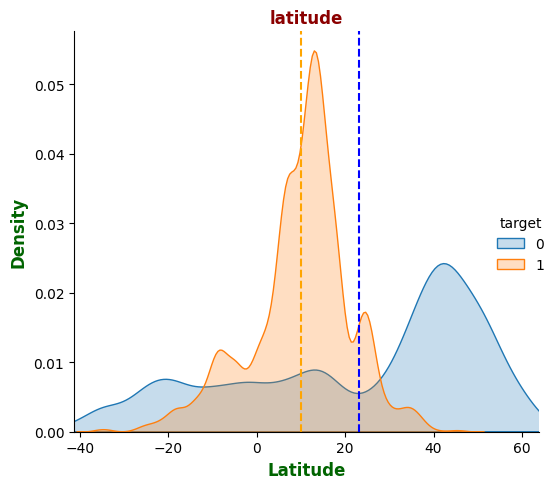

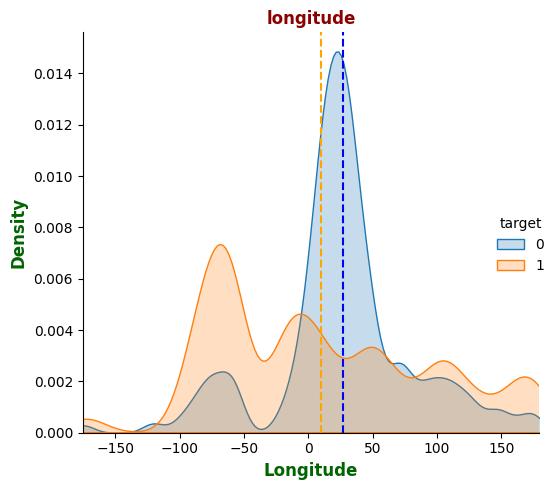

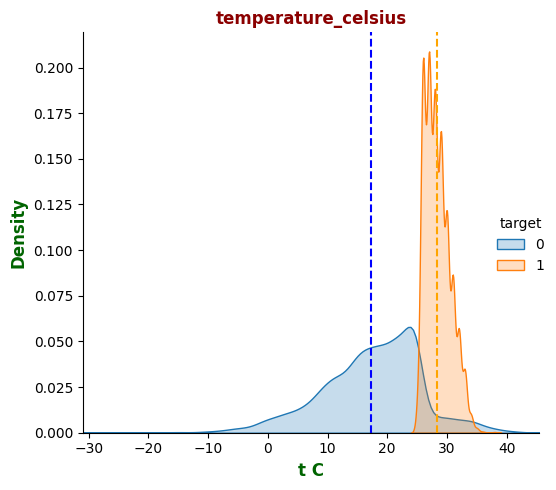

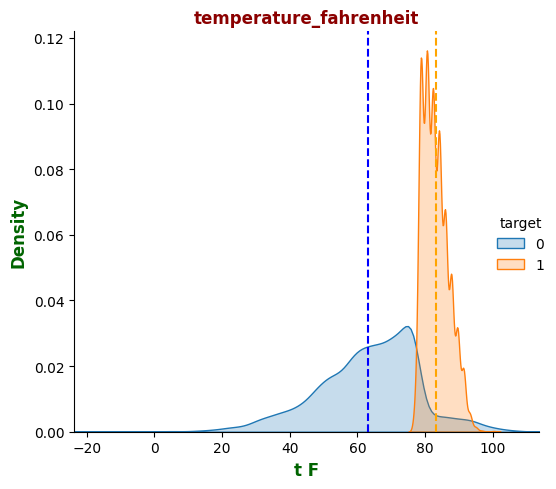

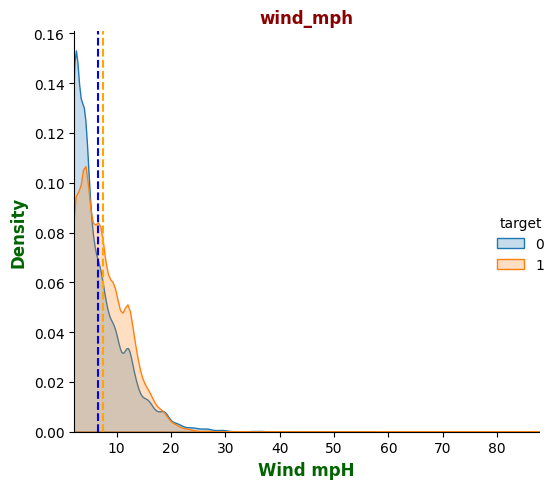

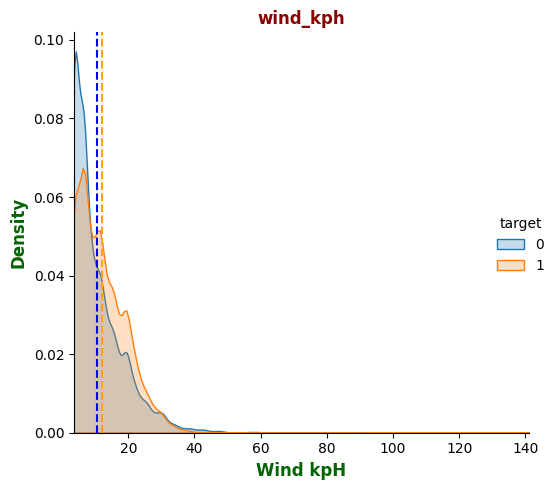

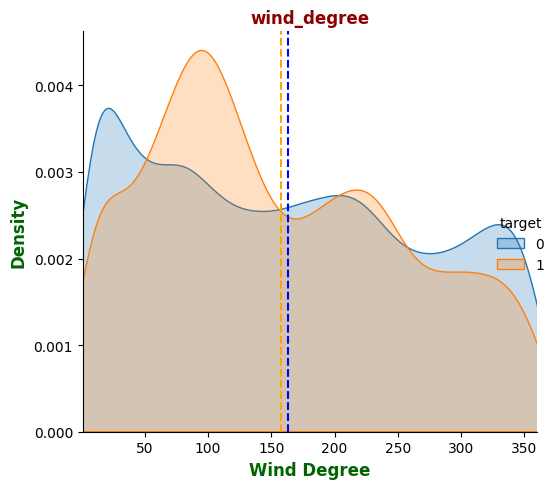

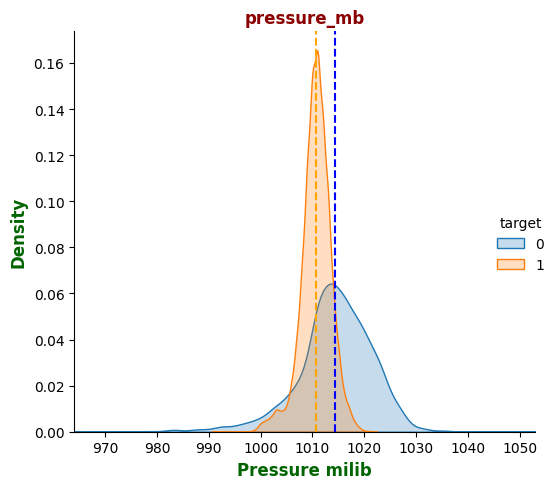

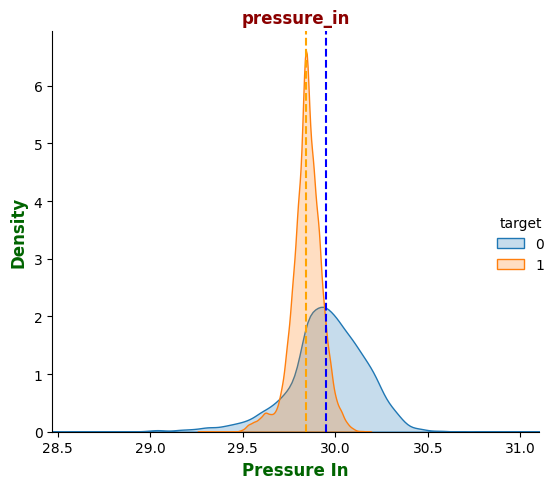

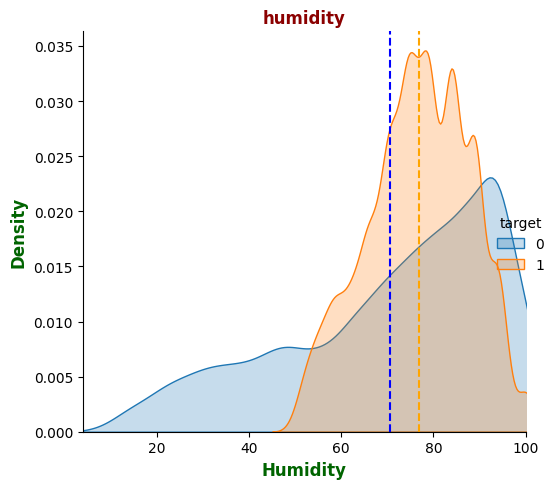

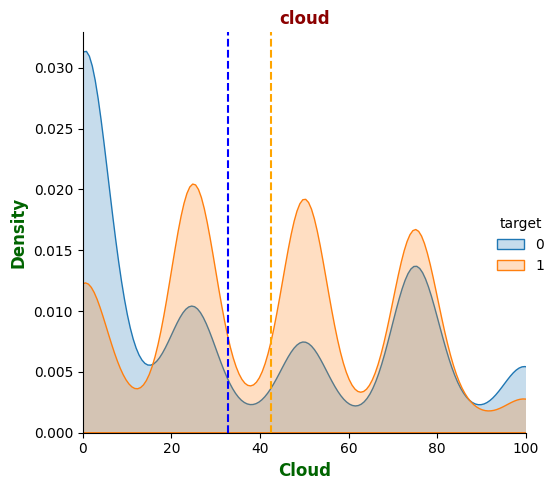

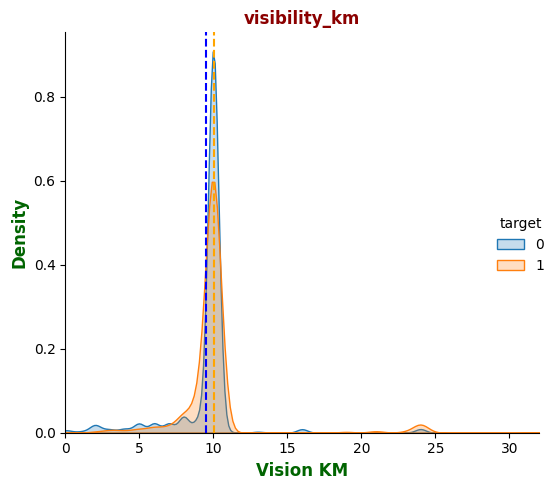

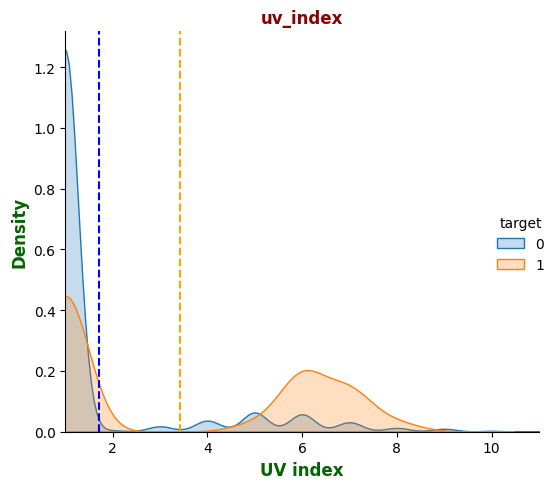

In [252]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/kaggle/input/daily-global-weather-csv/GlobalWeatherRepository.csv")
# conditions for target variable where we state that if in some row we find temperature higher than 25 and humidity higher than 50% we match that locaiton/row as a weather warning target
condition = (df['temperature_celsius'] > 25) & (df['humidity'] > 50)

# Create the 'target' column based on the conditions
df['target'] = condition.astype(int)

# numeric variables and their axis names
numeric_var = ["latitude", "longitude",  "temperature_celsius", "temperature_fahrenheit", "wind_mph", "wind_kph", "wind_degree", "pressure_mb", "pressure_in", "humidity", "cloud", "visibility_km", "uv_index", ]
numeric_axis_name = ["Latitude", "Longitude",  "t C", "t F", "Wind mpH", "Wind kpH", "Wind Degree", "Pressure milib", "Pressure In", "Humidity", "Cloud", "Vision KM", "UV index"]

numeric_var.append("target")
# styling
title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size": 12}
axis_font = {"family": "arial", "color": "darkgreen", "weight": "bold", "size": 12}

# FacetGrid
for i, z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df, hue="target", height=5, xlim=((df[i].min() ), (df[i].max() )))
    graph.map(sns.kdeplot, i, shade=True)
    graph.add_legend()
    
    mean_value = df.groupby('target')[i].mean()
    median_value = df.groupby('target')[i].median()

    plt.axvline(x=mean_value[0], color='blue', linestyle='--', label='Mean (Target 0)')
    plt.axvline(x=mean_value[1], color='orange', linestyle='--', label='Mean (Target 1)')

    plt.title(i, fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("Density", fontdict=axis_font)

    plt.tight_layout()
    plt.show()

In [244]:
df[numeric_var].corr()

,latitude,longitude,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,humidity,cloud,visibility_km,uv_index,target
latitude,1.000000,-0.013850,-0.496999,-0.496996,-0.025879,-0.025874,0.099241,-0.012699,-0.012234,0.137355,-0.065706,-0.041090,-0.291196,-0.244829
longitude,-0.013850,1.000000,-0.172589,-0.172584,-0.174141,-0.174226,-0.009668,0.064003,0.064815,0.162896,0.015971,0.013234,-0.297249,-0.114808
temperature_celsius,-0.496999,-0.172589,1.000000,0.999999,0.032693,0.032439,-0.052286,-0.262818,-0.264089,-0.245331,-0.034794,0.093080,0.423132,0.570998
temperature_fahrenheit,-0.496996,-0.172584,0.999999,1.000000,0.032694,0.032439,-0.052285,-0.262821,-0.264091,-0.245343,-0.034810,0.093089,0.423122,0.570971
wind_mph,-0.025879,-0.174141,0.032693,0.032694,1.000000,0.999967,0.094183,-0.201708,-0.201919,-0.088334,0.154396,0.052950,0.174303,0.080401
wind_kph,-0.025874,-0.174226,0.032439,0.032439,0.999967,1.000000,0.093333,-0.201680,-0.201895,-0.088285,0.154497,0.052764,0.174519,0.080212
wind_degree,0.099241,-0.009668,-0.052286,-0.052285,0.094183,0.093333,1.000000,-0.051882,-0.052144,0.048589,0.022277,-0.000846,-0.075393,-0.025569
pressure_mb,-0.012699,0.064003,-0.262818,-0.262821,-0.201708,-0.201680,-0.051882,1.000000,0.999572,-0.057378,-0.182759,0.028737,-0.151611,-0.249864
pressure_in,-0.012234,0.064815,-0.264089,-0.264091,-0.201919,-0.201895,-0.052144,0.999572,1.000000,-0.056871,-0.182736,0.027076,-0.152561,-0.250213
humidity,0.137355,0.162896,-0.245331,-0.245343,-0.088334,-0.088285,0.048589,-0.057378,-0.056871,1.000000,0.382716,-0.134806,-0.135288,0.136894


In [245]:
df[numeric_var].corr().iloc[:, [-1]]

,target
latitude,-0.244829
longitude,-0.114808
temperature_celsius,0.570998
temperature_fahrenheit,0.570971
wind_mph,0.080401
wind_kph,0.080212
wind_degree,-0.025569
pressure_mb,-0.249864
pressure_in,-0.250213
humidity,0.136894


# **Categoric Variables - Target Variable + Creating Weather Warning (Analysis with Count Plot)**

***Warning! : Possible Javascript error about too much recursion due to huge dataset***

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


TypeError: Could not convert SunnyCloudyCloudySunnyCloudyRainClearCloudyClearRainSunnyClearSunnyCloudyCloudySunnyCloudyRainCloudyRainClearCloudySunnyClearCloudyCloudyCloudyCloudySunnyCloudyThunderRainClearCloudySunnyClearSunnySunnyCloudyCloudyClearCloudyCloudyCloudyOvercastCloudySunnyFoggyRainCloudyClearCloudyRainRainRainCloudySunnyCloudyCloudyCloudyCloudyRainCloudySunnyRainOvercastCloudyCloudyFoggyCloudyRainFoggyClearRainCloudyRainSunnyFoggyCloudyCloudySunnyCloudyCloudyRainCloudyCloudyCloudyCloudyCloudyRainSunnySunnySunnyRainCloudySunnyCloudyCloudyRainThunderCloudyCloudyCloudyThunderRainCloudyOvercastSunnyCloudyCloudyRainOvercastCloudyCloudyCloudySunnyCloudyCloudySunnySunnyCloudyCloudyClearCloudySunnyCloudyRainCloudyRainSunnySunnyCloudyClearCloudyClearOvercastCloudyRainCloudyCloudySunnySunnyCloudyCloudyClearCloudyRainCloudyCloudyCloudySunnyCloudyCloudyCloudyCloudyRainRainCloudyCloudySunnyRainSunnySunnyCloudyCloudyCloudySunnyCloudyCloudySunnyCloudyCloudySunnySunnyCloudyCloudyCloudySunnyCloudyCloudyCloudySunnySunnySunnyClearClearSunnyOvercastCloudySunnyThunderSunnySunnySunnyCloudyCloudyCloudyCloudyCloudyClearSunnyCloudyRainSunnyThunderSunnySunnyCloudyClearCloudyRainCloudySunnyClearCloudyClearClearCloudyRainClearClearClearCloudyCloudyFoggyCloudyCloudyCloudyClearSunnyThunderRainClearFoggyCloudyCloudyCloudyOvercastClearCloudyCloudyRainCloudyClearClearCloudyRainClearCloudyClearFoggyCloudyFoggyOvercastCloudyCloudySunnyClearCloudyCloudyCloudyRainCloudyRainCloudyClearRainCloudyClearRainFoggyCloudyCloudySunnyCloudyCloudyRainCloudyCloudyClearRainCloudyRainSunnySunnySunnyClearCloudyClearRainCloudyOvercastCloudyCloudyCloudyClearCloudyCloudyCloudyClearOvercastRainOvercastCloudyRainCloudyCloudySunnyRainCloudyCloudyRainClearClearCloudyCloudyCloudyCloudyClearThunderRainCloudyCloudySunnySunnyCloudyClearCloudyFoggyCloudyCloudyCloudyCloudyCloudySunnyCloudyOvercastCloudyClearCloudyRainCloudyCloudyCloudySunnyRainClearCloudyRainCloudyCloudyOvercastRainRainClearCloudyRainClearCloudyCloudyCloudyRainOvercastClearSunnyCloudyCloudySunnyThunderCloudyCloudyCloudyClearRainRainCloudyRainSunnyCloudyOvercastClearCloudyRainCloudySunnyCloudyClearClearClearThunderCloudyFoggyCloudyOvercastClearClearCloudyClearClearCloudyClearCloudyCloudyCloudyClearCloudyCloudyFoggyClearClearClearClearCloudyCloudyRainClearClearCloudyCloudyRainCloudyClearClearClearSunnyClearClearClearCloudyRainCloudyClearCloudyClearClearClearCloudyCloudyRainClearCloudyCloudyRainRainClearRainCloudyFoggyOvercastCloudyCloudyClearClearOvercastClearCloudyCloudyCloudyCloudyCloudyOvercastCloudyThunderClearOvercastFoggyFoggyCloudyClearRainClearCloudyCloudyCloudyClearClearCloudyRainClearOvercastCloudyOvercastCloudyClearCloudyCloudyCloudyOvercastClearCloudyClearCloudyCloudyCloudyCloudyRainCloudyOvercastCloudyClearCloudyCloudyCloudyClearCloudyClearClearCloudyRainCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyClearCloudyClearCloudyFoggyClearCloudyRainCloudyCloudyClearCloudyClearCloudyCloudyCloudyRainCloudyClearClearClearCloudyClearCloudyCloudyCloudyClearCloudyCloudyCloudyClearCloudyRainClearRainCloudyThunderClearOvercastClearCloudyClearCloudySunnyCloudyCloudyOvercastCloudyClearClearCloudyCloudyRainClearOvercastSunnyClearCloudyCloudyCloudySunnyThunderClearClearClearClearCloudyClearCloudyCloudyClearClearSunnyClearCloudyCloudyClearRainCloudyCloudyCloudyCloudyCloudyCloudyRainCloudyClearClearCloudyCloudyClearClearClearCloudyCloudyRainCloudyFoggyClearCloudySunnyClearCloudyClearCloudyClearCloudyCloudyClearClearOvercastFoggyCloudyCloudyRainCloudyCloudyRainRainFoggyClearRainCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyClearCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyClearCloudyFoggyFoggyClearClearRainCloudyClearCloudyCloudyClearCloudyCloudyRainClearClearSunnyOvercastCloudyClearRainCloudyCloudyFoggyRainCloudyClearCloudyRainCloudyClearRainClearCloudyThunderCloudySunnyCloudyCloudyClearClearClearRainClearClearCloudyClearSunnyCloudyClearClearSunnyClearCloudyCloudyClearCloudyClearCloudyFoggyClearCloudyRainClearCloudyClearClearClearCloudyCloudyClearCloudyCloudyClearRainClearCloudyCloudyCloudyRainCloudyClearCloudyRainCloudyClearCloudyRainClearCloudyClearRainCloudyCloudyClearClearClearCloudySunnyCloudyCloudyOvercastCloudyClearClearCloudyCloudyCloudyCloudyRainSunnyClearClearCloudyCloudySunnyThunderClearClearRainClearClearRainCloudyCloudyClearClearSunnyClearClearOvercastClearCloudyCloudyClearClearRainCloudyFoggyClearClearClearClearCloudyCloudyClearClearClearCloudyCloudyRainClearCloudyClearOvercastSunnyClearClearClearOvercastClearCloudyClearClearClearClearClearCloudyCloudyThunderClearOvercastRainRainClearCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyCloudyCloudyOvercastThunderCloudyCloudyThunderClearCloudyClearClearFoggyClearClearFoggyCloudyClearCloudyCloudyClearFoggyCloudyRainClearClearCloudyCloudyCloudyClearThunderCloudyClearClearClearCloudyClearCloudyRainCloudyCloudyOvercastClearOvercastThunderRainRainCloudyCloudyClearCloudyClearRainClearClearCloudyFoggySunnyCloudyClearThunderSunnyClearOvercastClearClearOvercastRainCloudyFoggyClearCloudyRainClearCloudyClearClearClearThunderCloudyRainRainCloudyClearOvercastClearThunderClearCloudyCloudyCloudyClearClearCloudyCloudyClearSunnyClearClearCloudyClearCloudyFoggyClearClearClearClearCloudyCloudyClearCloudyCloudyClearClearClearClearCloudyCloudyCloudyCloudyClearClearCloudyClearFoggyClearClearClearClearClearThunderRainCloudyCloudyClearClearSunnyClearCloudyCloudyClearRainCloudyClearFoggyCloudyCloudyRainClearClearClearClearCloudyCloudyThunderClearClearClearCloudyRainCloudyThunderClearCloudySunnyClearClearClearRainClearCloudyCloudyCloudyClearCloudyClearCloudyCloudyRainClearCloudyRainClearCloudyClearClearCloudyClearClearCloudyCloudyThunderClearCloudyClearCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyClearFoggyCloudyCloudyClearCloudyCloudyClearCloudyCloudyClearCloudyCloudyRainClearClearSunnyClearClearClearRainSunnyClearFoggyClearCloudyClearCloudyRainCloudyClearRainClearOvercastRainOvercastCloudyClearCloudyClearCloudyClearCloudyClearCloudyCloudyFoggySunnyThunderCloudyThunderCloudyClearClearClearCloudyClearCloudySunnyClearCloudyRainClearCloudyClearClearClearCloudyCloudyCloudyRainCloudyClearClearClearCloudyClearRainCloudyCloudyClearClearSunnyCloudyClearOvercastClearCloudyCloudyThunderClearClearClearClearClearClearCloudySunnyClearCloudyCloudyCloudyThunderClearCloudyClearCloudyClearClearSunnyClearClearCloudyCloudySunnyClearClearClearRainCloudyCloudyClearCloudyCloudyOvercastClearOvercastCloudyClearCloudyClearRainCloudyClearClearCloudyCloudyClearClearCloudyClearClearCloudyThunderCloudyClearClearClearCloudyRainCloudyThunderCloudyCloudyFoggyRainClearCloudyCloudyClearCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyRainClearThunderRainClearClearClearCloudyCloudyCloudyClearCloudyCloudyCloudyClearCloudyClearCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyClearFoggyCloudyCloudyClearCloudyCloudyClearCloudyRainClearFoggyCloudyRainClearCloudyCloudyFoggyCloudyClearCloudySunnyClearFoggyClearCloudyClearCloudyRainCloudyClearCloudyClearOvercastThunderOvercastSunnyClearSunnyClearClearClearFoggyClearClearCloudyFoggyCloudyThunderClearThunderRainThunderCloudyClearClearCloudyRainCloudySunnyClearSunnyRainClearClearClearRainClearCloudyCloudyCloudyCloudyCloudyClearClearClearCloudyClearCloudyCloudyCloudyClearCloudyCloudyCloudyClearCloudyClearOvercastCloudyCloudyClearCloudyClearClearCloudyClearCloudySunnyCloudyCloudyCloudyCloudyCloudyClearCloudyClearClearClearFoggySunnyRainCloudyCloudyCloudyRainClearClearClearClearCloudyCloudyClearCloudyCloudyClearClearSunnyClearClearCloudyClearCloudyCloudyFoggyClearCloudyCloudyCloudyRainCloudyClearClearCloudyRainRainClearClearCloudyCloudyRainCloudyCloudyCloudyCloudyFoggyClearClearRainRainClearCloudyCloudyClearCloudyClearClearCloudyCloudyRainClearCloudyCloudyClearCloudyClearCloudyCloudyCloudyClearCloudyCloudyCloudyClearOvercastCloudyCloudyCloudyRainRainCloudyCloudyClearCloudyClearClearFoggyCloudyCloudyClearCloudyClearClearCloudyOvercastFoggyOvercastCloudyRainClearClearCloudyClearClearClearCloudyCloudyClearClearClearCloudyClearCloudyRainCloudyClearCloudyClearCloudyOvercastOvercastCloudyClearCloudyClearClearCloudyRainClearCloudyCloudyClearOvercastCloudyClearCloudySunnyCloudyClearClearRainCloudyCloudyFoggyCloudyCloudyRainClearCloudyClearClearClearCloudyCloudyCloudyClearCloudyClearClearClearCloudyClearCloudyRainCloudyClearCloudyCloudyCloudyClearCloudyClearCloudyCloudyClearCloudyClearClearClearClearClearCloudySunnyCloudyCloudyCloudyCloudyRainClearCloudyCloudyClearCloudyClearSunnyCloudyClearCloudyCloudySunnyClearClearClearClearCloudyCloudyClearCloudyOvercastClearClearSunnyClearClearCloudyClearRainCloudyClearClearCloudyCloudyCloudyClearCloudyClearClearCloudyOvercastThunderRainClearCloudyCloudyFoggyCloudyClearCloudyFoggyFoggyCloudyCloudyClearRainClearCloudyClearClearClearFoggyClearCloudyCloudySunnyClearCloudyCloudyClearCloudyCloudyCloudyCloudyClearClearCloudyCloudyClearClearClearCloudyThunderCloudyRainCloudyCloudyThunderClearCloudyClearRainFoggyFoggyCloudyClearCloudyClearClearCloudyRainClearCloudyCloudyCloudyClearClearFoggyClearCloudyClearCloudyRainClearCloudyClearCloudyClearRainRainThunderCloudyCloudyCloudyThunderCloudyClearClearSunnyClearCloudyCloudyRainClearCloudyCloudyClearOvercastCloudyClearCloudySunnyCloudyCloudyClearCloudyCloudyCloudyCloudyOvercastClearCloudyCloudyClearCloudyCloudyClearClearCloudyCloudyCloudyRainCloudyClearClearClearThunderClearCloudyRainCloudyClearClearCloudyCloudyClearSunnyCloudyClearCloudyClearCloudyOvercastClearClearClearClearRainSunnyClearCloudyCloudyCloudyClearClearCloudyClearClearClearClearSunnyClearClearCloudyCloudySunnyClearClearClearClearCloudyCloudyClearClearCloudyClearClearSunnyClearCloudyCloudyFoggyOvercastCloudyClearClearCloudyCloudyCloudyRainClearClearClearRainOvercastClearRainClearThunderCloudyFoggyCloudyCloudyClearRainFoggyCloudyClearCloudyCloudyClearCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyRainClearCloudyCloudyClearClearFoggyClearCloudyClearClearCloudyCloudyClearClearCloudyRainCloudyThunderRainCloudyCloudyCloudyClearCloudyClearRainFoggyFoggyClearClearCloudyClearClearCloudyCloudyClearCloudyRainRainClearCloudyFoggyClearClearClearCloudyCloudyClearClearClearCloudyClearCloudyRainThunderCloudyCloudyClearCloudyThunderOvercastCloudyClearRainClearCloudyCloudyRainClearClearThunderClearSunnyCloudyClearCloudySunnyCloudyCloudyClearClearCloudyClearCloudyCloudyClearCloudyCloudyClearCloudyFoggyClearClearCloudyCloudyCloudyRainCloudyClearClearClearCloudyClearRainCloudyCloudyClearCloudyCloudyCloudyClearCloudyClearClearRainClearRainClearClearClearClearClearCloudySunnyCloudyCloudyCloudyCloudyClearClearOvercastRainClearClearClearSunnyOvercastClearCloudyCloudySunnyClearClearClearClearClearCloudyClearCloudyCloudyCloudyClearCloudyClearCloudyCloudyClearRainCloudyClearClearCloudyCloudyClearClearClearClearClearCloudyCloudyRainRainCloudyCloudyCloudyRainRainRainClearCloudyFoggyClearCloudyClearOvercastClearCloudyClearClearRainClearClearCloudyCloudyRainClearCloudyCloudyThunderCloudyClearCloudyCloudyCloudyClearCloudyThunderCloudyClearCloudyCloudyCloudyCloudyCloudyThunderCloudyCloudyClearCloudyClearFoggyFoggyCloudyClearFoggyClearClearThunderClearCloudyCloudyRainClearClearCloudyFoggyClearClearRainCloudyClearClearClearCloudyClearCloudyRainCloudyCloudyCloudyClearCloudyCloudyOvercastCloudyClearSunnyClearClearClearRainClearCloudyCloudyClearSunnyCloudyClearCloudySunnyCloudyClearClearCloudyClearCloudyCloudyRainSunnyCloudyClearCloudyClearClearClearCloudyCloudyClearCloudyCloudyClearClearClearThunderClearCloudyCloudyCloudyClearClearCloudyClearClearSunnyClearClearCloudyCloudyCloudyClearClearClearClearCloudyCloudySunnyClearCloudyCloudyCloudyClearClearCloudyCloudyClearClearCloudySunnyRainCloudyCloudyClearCloudyClearClearClearClearClearCloudyClearCloudyCloudyClearCloudySunnyClearCloudyCloudyClearCloudyCloudyClearClearOvercastThunderFoggySunnyClearClearClearCloudyClearCloudyRainClearCloudyCloudyFoggyCloudyCloudyClearCloudyRainClearClearClearOvercastClearCloudyClearCloudyClearClearClearCloudyCloudyThunderClearCloudyCloudyClearFoggyClearCloudyCloudyFoggyClearOvercastCloudyOvercastClearOvercastCloudyCloudyCloudyCloudyCloudyCloudySunnyClearCloudyClearRainThunderFoggyClearClearCloudyCloudyClearCloudyRainClearClearCloudySunnyClearClearRainFoggyClearClearCloudyCloudyClearClearClearCloudyClearCloudyCloudyThunderClearCloudyClearCloudyCloudyCloudyOvercastClearSunnyClearCloudyCloudyFoggyClearClearCloudyFoggySunnyCloudyClearClearSunnyClearFoggyClearClearOvercastClearCloudyCloudyCloudySunnyCloudyFoggyCloudyClearClearCloudyCloudyCloudyCloudyCloudyCloudyClearFoggyClearClearClearCloudyRainCloudyClearClearRainCloudyClearSunnyClearThunderCloudyCloudyCloudyClearClearClearCloudyCloudySunnyClearCloudyOvercastCloudyClearCloudyCloudyCloudyCloudyClearOvercastSunnyClearCloudyCloudyClearOvercastClearClearClearClearClearClearClearCloudyOvercastClearCloudySunnyClearCloudyCloudyClearCloudyCloudyClearClearCloudyCloudyCloudySunnyClearClearClearCloudyClearRainRainClearCloudyCloudyRainCloudyClearClearCloudyRainClearClearClearFoggyClearCloudyClearClearClearClearClearCloudyCloudyRainClearCloudyCloudyClearClearClearClearCloudyCloudyClearCloudyCloudyClearClearCloudyCloudyCloudyCloudyThunderThunderCloudyCloudyClearCloudyClearOvercastThunderFoggyClearClearCloudyCloudyClearCloudyCloudyClearCloudyCloudyRainClearClearRainFoggyCloudyClearRainRainClearClearClearCloudyClearCloudyRainCloudyClearCloudyClearCloudyCloudyCloudyCloudyClearCloudyClearClearClearRainClearClearCloudyClearOvercastCloudyClearCloudyFoggyClearRainClearClearRainSunnyThunderFoggyClearSunnyCloudyClearClearClearClearClearCloudyRainCloudyCloudyCloudyClearClearClearCloudyClearCloudyCloudyCloudyClearClearCloudyCloudyClearSunnyClearFoggyCloudyClearThunderOvercastClearClearClearClearCloudySunnyClearCloudyOvercastCloudyClearClearCloudyCloudyClearClearClearSunnyClearCloudyCloudyClearSunnyClearClearClearClearClearCloudyClearClearCloudyClearClearSunnyClearCloudyCloudyClearRainCloudyClearClearCloudyCloudyCloudySunnyClearClearClearThunderClearClearRainClearCloudyCloudyFoggyCloudyClearClearOvercastFoggyClearClearCloudyRainClearCloudyCloudyClearCloudyFoggyFoggyCloudyCloudySunnyClearCloudyClearClearCloudyClearCloudyCloudyFoggyClearOvercastCloudyClearClearCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyClearCloudyClearOvercastFoggyCloudyClearClearCloudyCloudyClearCloudyCloudyClearClearCloudyCloudyClearClearCloudyClearCloudyClearCloudyRainClearClearClearCloudyClearCloudyCloudyCloudyCloudyOvercastClearOvercastCloudyCloudyClearClearCloudyClearCloudyClearRainClearClearCloudyClearCloudyCloudyClearClearSunnyClearRainClearClearOvercastClearCloudyFoggyClearSunnyCloudyClearCloudyClearClearFoggyRainOvercastCloudyRainCloudyClearClearClearCloudyClearCloudyRainCloudyClearClearCloudyCloudyClearCloudyClearCloudyCloudyClearClearFoggyClearClearClearClearCloudySunnyClearCloudyCloudyCloudyClearOvercastCloudyCloudyClearClearFoggySunnyCloudyOvercastCloudyClearRainClearClearClearClearClearThunderClearCloudyCloudyClearClearCloudyClearRainSunnyClearCloudyCloudyClearClearCloudyCloudyFoggyClearClearClearCloudyRainClearClearCloudyClearThunderCloudyFoggyCloudyCloudyCloudyClearSunnyClearClearClearThunderFoggyCloudyCloudyClearClearFoggyClearCloudyCloudySunnyOvercastCloudyCloudyClearCloudyOvercastClearCloudyFoggyThunderCloudyThunderOvercastClearCloudyCloudyOvercastCloudyCloudyCloudyCloudyCloudyClearCloudyClearClearFoggyFoggyClearClearRainClearClearThunderCloudyFoggyRainCloudyCloudyClearCloudyFoggyClearClearClearCloudyCloudyClearClearClearCloudyClearCloudyCloudyCloudyClearCloudyClearOvercastCloudyOvercastClearClearSunnyClearCloudyCloudyFoggyClearClearRainRainSunnyCloudyClearThunderSunnyClearRainClearClearOvercastClearCloudyCloudyClearSunnyCloudyClearCloudyClearClearCloudyCloudyCloudyCloudyCloudyCloudyClearClearClearThunderClearCloudyCloudyRainClearClearCloudyClearClearSunnyClearClearCloudyClearOvercastOvercastClearClearFoggyClearCloudySunnyClearCloudyOvercastCloudyClearClearCloudyFoggyClearClearCloudySunnyCloudyOvercastCloudyClearCloudyClearClearClearClearClearThunderFoggyClearCloudyClearRainSunnyClearRainCloudyClearCloudyCloudyClearRainCloudyCloudyCloudyRainClearClearClearCloudyClearCloudyClearClearCloudyCloudyCloudyRainCloudyCloudyCloudySunnyClearClearClearFoggyClearCloudyClearClearClearRainFoggyCloudyCloudyThunderClearCloudyCloudyClearClearOvercastCloudyCloudyRainFoggyCloudyCloudyClearClearRainClearCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyClearOvercastFoggyCloudyClearClearClearThunderClearCloudyCloudyOvercastOvercastCloudyCloudyClearCloudyCloudyFoggyClearClearThunderCloudyOvercastClearCloudyCloudyClearCloudyCloudyClearClearCloudyClearCloudyCloudyOvercastCloudyCloudySunnyClearClearCloudyRainClearClearThunderRainSunnyCloudyClearCloudyCloudyClearCloudyClearClearCloudySunnyRainFoggyClearCloudyCloudyClearCloudyClearClearClearCloudyCloudyCloudyCloudyCloudyClearFoggyClearCloudyClearCloudyCloudyClearClearClearCloudyClearClearRainClearClearCloudyClearCloudyCloudyCloudyClearCloudyClearCloudySunnyClearCloudyCloudyClearClearClearOvercastCloudyClearClearRainSunnyClearClearOvercastClearRainClearClearCloudyClearCloudyCloudySunnyCloudyCloudySunnyCloudyClearCloudySunnyCloudySunnyCloudyCloudyRainCloudyCloudyCloudyFoggySunnyCloudySunnySunnyCloudySunnyCloudySunnySunnyCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyCloudySunnySunnyRainCloudyCloudyCloudySunnyCloudyFoggyCloudyCloudySunnyCloudyCloudyCloudySunnyCloudySunnyRainCloudyCloudyCloudyCloudyCloudySunnyCloudyCloudySunnyCloudyCloudyCloudyCloudyCloudyCloudySunnyCloudyRainSunnyFoggyFoggyCloudySunnyCloudyCloudySunnyCloudyCloudyCloudyCloudyCloudyClearSunnyCloudyClearCloudySunnySunnyRainCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyOvercastSunnyCloudyCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyCloudySunnySunnyCloudyCloudyClearCloudyThunderThunderClearCloudySunnyClearClearCloudySunnyCloudyCloudyCloudyCloudyCloudyCloudyCloudySunnySunnyCloudySunnyCloudyCloudyCloudyCloudyCloudyCloudySunnySunnySunnyCloudyCloudyCloudyRainRainCloudyCloudySunnyCloudyCloudyCloudyCloudySunnySunnyCloudyCloudySunnyFoggyCloudyCloudyClearCloudyCloudyCloudyCloudySunnyClearCloudyCloudyCloudyFoggyCloudySunnyCloudyClearRainSunnyRainCloudyCloudySunnyClearClearCloudyCloudyCloudyCloudyClearClearSunnyCloudyClearCloudyClearCloudyCloudyOvercastClearCloudyCloudyFoggySunnyCloudyClearClearCloudyClearCloudyClearClearCloudyCloudyRainCloudyClearCloudyClearSunnyCloudyClearFoggyCloudyClearCloudyClearClearFoggyCloudyFoggyCloudyCloudyThunderClearThunderCloudyClearClearClearCloudyCloudyClearClearCloudyCloudyClearClearCloudyClearCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyClearClearFoggyCloudyClearClearRainCloudyClearCloudyCloudyClearCloudyCloudyCloudyClearCloudyRainCloudyClearClearCloudyRainClearCloudyClearCloudyClearCloudyClearClearClearCloudyClearCloudyCloudyCloudyRainCloudyRainClearClearClearCloudyClearClearCloudyClearCloudyCloudyClearRainCloudyCloudyCloudyClearClearThunderRainCloudyCloudyClearCloudyCloudyClearClearClearClearClearCloudyCloudyCloudyCloudyCloudyCloudyClearClearCloudyClearCloudyCloudyCloudyClearCloudyCloudyCloudyClearRainRainClearCloudyClearCloudyClearCloudyClearCloudyClearCloudySunnyCloudyCloudyCloudyCloudyClearCloudyCloudyCloudyCloudyFoggyClearSunnyClearClearOvercastClearClearClearClearClearClearClearCloudyFoggyCloudyCloudyClearClearSunnyClearClearCloudyClearThunderCloudyFoggyClearCloudyThunderClearSunnyCloudyClearClearRainThunderClearClearClearCloudyCloudyRainCloudyCloudyThunderClearSunnyRainClearClearFoggyClearCloudyClearClearClearClearCloudyCloudyCloudySunnyClearCloudyCloudyClearClearClearCloudyCloudyCloudyClearCloudyCloudyCloudyClearCloudyClearCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyClearRainFoggyCloudyClearClearRainCloudyClearThunderCloudyClearCloudyCloudyRainClearClearRainFoggyCloudyClearRainRainClearClearCloudyCloudyClearCloudyRainThunderClearCloudyClearOvercastCloudyOvercastOvercastClearCloudyCloudyCloudyClearCloudyClearClearThunderClearOvercastCloudyClearCloudyOvercastCloudyCloudyClearRainOvercastCloudyCloudyCloudyClearSunnyCloudyClearCloudyClearClearClearCloudyCloudyCloudySunnyCloudyClearClearClearCloudyClearRainCloudyCloudyClearCloudyCloudyClearClearCloudyCloudyClearCloudyClearCloudyCloudyCloudyClearClearClearCloudySunnyCloudyCloudyCloudyCloudyClearClearCloudyCloudyOvercastClearClearSunnyClearClearCloudyClearOvercastClearClearClearClearOvercastCloudyClearCloudyCloudyClearClearSunnyClearClearCloudyClearRainCloudyClearRainCloudyCloudyClearSunnyCloudyClearRainThunderClearCloudyClearClearCloudyCloudyFoggyCloudyClearClearCloudyFoggyClearClearClearCloudyClearCloudyClearClearClearClearClearCloudyCloudyRainClearCloudyCloudyClearClearCloudyRainCloudyCloudyClearCloudyCloudyCloudyClearCloudyClearCloudyCloudyThunderCloudyCloudyRainClearCloudyClearRainFoggyFoggyClearClearCloudyCloudyClearThunderCloudyClearFoggyCloudyRainClearClearRainClearClearClearCloudyCloudyClearClearRainCloudyClearCloudyCloudyCloudyClearOvercastClearOvercastThunderOvercastRainCloudyRainCloudyCloudyCloudyFoggyClearClearCloudyRainCloudyCloudyThunderThunderRainCloudyClearClearCloudyCloudyCloudyCloudySunnyClearCloudyClearCloudyClearCloudyClearCloudyCloudyCloudySunnyCloudyCloudyCloudyClearCloudyClearCloudyRainCloudyClearCloudyRainClearClearOvercastClearClearCloudyClearOvercastCloudyCloudyClearClearClearCloudySunnyRainCloudyCloudyCloudyClearClearCloudyCloudyClearCloudyCloudySunnyClearClearRainClearFoggyCloudyClearClearClearClearCloudyRainClearCloudyClearClearSunnyClearCloudyClearRainCloudyFoggyClearCloudyCloudyCloudySunnyClearClearClearThunderClearCloudyClearClearCloudyCloudyRainCloudyCloudyCloudyCloudySunnyCloudyClearClearRainCloudyCloudyClearClearClearOvercastFoggyCloudyCloudyRainClearCloudyRainClearCloudyRainCloudyRainClearThunderCloudyCloudyClearClearOvercastClearCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyClearRainFoggyCloudyClearClearRainCloudyClearCloudyCloudyClearFoggyCloudyRainClearRainRainClearClearClearCloudyRainClearClearClearCloudyClearCloudyRainCloudyClearOvercastClearCloudyThunderOvercastCloudyClearRainClearCloudyCloudyRainClearClearCloudyFoggySunnyRainClearCloudyFoggyClearCloudyClearRainRainSunnyCloudyFoggyClearCloudyCloudyClearCloudyClearClearClearCloudyCloudyCloudySunnyCloudyCloudyClearClearCloudyClearCloudyRainThunderClearClearCloudyClearClearSunnyCloudyCloudyCloudyClearClearClearCloudyClearClearClearCloudySunnyClearCloudyCloudyCloudyClearClearCloudyClearClearCloudyRainSunnyClearClearCloudyClearRainClearClearClearRainClearCloudyCloudyClearCloudyClearClearSunnyClearCloudyCloudyClearRainCloudyClearClearCloudyCloudyClearRainClearClearClearCloudyClearCloudyClearCloudyCloudyCloudyRainCloudyCloudyClearOvercastSunnyClearClearCloudyCloudyClearCloudyClearClearCloudyCloudyFoggyCloudyCloudyRainClearCloudyCloudyClearClearClearThunderCloudyCloudyClearCloudyThunderRainClearCloudyCloudyCloudyOvercastCloudyThunderCloudyCloudyClearCloudyCloudyOvercastFoggyFoggyClearClearRainClearClearCloudyCloudyClearCloudyCloudyRainClearClearRainClearCloudyClearCloudyCloudyClearCloudyCloudyClearCloudyRainCloudyClearOvercastClearCloudyThunderOvercastClearCloudyClearClearCloudyClearRainClearClearCloudyCloudyCloudyCloudyClearRainSunnyClearCloudyClearCloudyCloudyRainThunderSunnyClearCloudyCloudyClearClearClearClearFoggyCloudyCloudyCloudySunnyCloudyClearClearClearCloudyClearCloudyCloudyCloudyClearRainCloudyClearClearCloudyCloudyClearCloudyClearThunderOvercastRainClearClearClearCloudySunnyClearCloudyCloudyCloudyClearCloudyCloudyRainClearClearClearSunnyCloudyClearCloudyClearFoggyClearClearClearClearClearThunderCloudyCloudyOvercastCloudyClearSunnyClearCloudyThunderClearCloudyRainClearCloudyCloudyCloudyFoggyRainCloudyCloudyClearRainThunderClearRainClearCloudyCloudyFoggyCloudyCloudyCloudySunnySunnyRainCloudyClearRainFoggyCloudyClearClearClearOvercastFoggyCloudyCloudyRainClearCloudyCloudyClearCloudyClearCloudyCloudyClearCloudyCloudyCloudyCloudyClearCloudyClearCloudyCloudyCloudyThunderCloudyCloudyClearCloudyClearCloudyCloudyCloudyClearClearCloudyClearCloudyCloudyClearRainCloudyCloudyClearRainFoggyClearRainClearCloudyFoggyCloudyCloudyCloudyCloudyClearCloudyRainCloudyClearOvercastClearOvercastThunderOvercastRainCloudyClearClearCloudyClearFoggyClearClearCloudyCloudyCloudyCloudyRainClearCloudyClearRainOvercastRainThunderRainClearSunnyCloudyClearCloudyClearClearClearCloudyCloudyCloudyRainCloudyClearOvercastClearCloudyClearCloudyCloudyCloudyClearClearCloudyClearClearRainClearCloudyCloudyClearRainRainClearClearCloudyClearCloudySunnyClearCloudyCloudyCloudyClearCloudyOvercastCloudyCloudyClearOvercastSunnyCloudyRainCloudyRainCloudyClearClearClearClearCloudyCloudyFoggyClearCloudyRainThunderSunnyClearClearCloudyClearRainRainFoggyClearCloudyCloudyFoggySunnyClearClearClearThunderClearClearRainClearCloudyCloudyRainCloudyThunderClearCloudySunnyClearClearClearRainClearCloudyCloudyClearClearCloudyClearCloudyOvercastRainClearCloudyCloudyClearCloudyClearCloudyCloudyCloudyClearCloudyCloudyOvercastClearCloudyClearOvercastCloudyCloudyThunderCloudyCloudyClearCloudyClearClearFoggyCloudyClearClearCloudyCloudyClearCloudyCloudyClearClearCloudySunnyClearClearClearOvercastCloudyClearRainCloudyClearClearClearCloudyClearFoggyRainCloudyClearCloudyThunderCloudyCloudyRainClearRainCloudyClearCloudyClearFoggyClearClearCloudyCloudyOvercastCloudyClearCloudySunnyClearClearClearRainRainRainRainFoggyCloudyCloudyCloudyClearCloudyClearClearCloudyCloudyCloudyRainRainOvercastRainClearClearCloudyClearCloudyRainCloudyClearCloudyCloudyClearClearSunnyClearClearCloudyClearCloudyClearCloudyClearCloudyClearRainSunnyClearCloudyOvercastCloudyClearClearCloudyCloudyCloudyClearOvercastRainOvercastCloudyCloudyClearCloudyClearClearClearClearCloudyClearFoggyCloudyOvercastCloudyClearSunnyCloudyClearCloudyClearRainCloudyClearCloudyCloudyCloudyRainSunnyCloudyClearClearCloudyClearThunderClearClearCloudyCloudyFoggySunnyCloudyClearSunnySunnyCloudyClearThunderCloudyClearCloudyClearClearThunderCloudyClearCloudyCloudyRainClearCloudyThunderClearClearClearCloudyRainClearOvercastCloudyCloudyOvercastClearCloudyCloudyCloudyCloudyRainCloudyThunderCloudyClearCloudyClearClearFoggyFoggyClearFoggyCloudyClearClearCloudyOvercastClearFoggyCloudyRainClearRainRainClearCloudyClearRainCloudyRainClearCloudyCloudyClearRainRainThunderClearCloudyClearCloudyCloudyCloudyRainRainClearCloudyClearCloudyFoggyClearClearCloudyCloudyCloudyClearThunderSunnyCloudyCloudyClearRainCloudyCloudyCloudyCloudyClearCloudyCloudyClearCloudyClearClearFoggyCloudyCloudyCloudyCloudyCloudyOvercastClearClearClearClearCloudyRainCloudyClearCloudyCloudyRainClearSunnyClearCloudyCloudyClearCloudyClearRainClearClearClearCloudySunnyCloudyCloudyCloudyCloudyClearClearCloudyClearClearClearOvercastCloudyOvercastClearCloudyCloudyClearClearClearClearClearClearCloudyFoggyCloudyRainCloudyClearSunnyCloudyClearRainClearRainCloudyClearClearCloudyCloudyRainSunnyClearClearRainRainClearThunderClearClearCloudyCloudyFoggyCloudyCloudyThunderCloudySunnyClearClearClearCloudyCloudyThunderClearRainClearClearFoggyCloudyCloudyRainClearCloudyThunderClearClearClearCloudyCloudyCloudyCloudyCloudyCloudyOvercastClearClearClearCloudyCloudyThunderThunderCloudyCloudyCloudyCloudyCloudyRainFoggyCloudyClearClearClearCloudyCloudyThunderRainClearCloudyCloudyRainClearClearClearClearCloudyCloudyCloudyCloudyRainCloudyCloudyCloudyClearCloudyCloudyCloudyClearOvercastClearCloudyCloudyOvercastRainClearCloudyClearClearCloudyFoggyClearClearCloudyRainRainRainCloudyCloudySunnyClearCloudyClearClearFoggySunnyCloudyCloudyClearCloudyOvercastClearClearClearClearClearCloudyCloudyCloudyRainCloudyCloudyClearClearCloudyClearThunderRainCloudyClearThunderCloudyClearClearCloudyClearCloudyClearOvercastRainCloudyClearClearClearCloudySunnyClearCloudyOvercastCloudyClearClearCloudyClearClearClearClearSunnyClearClearCloudySunnyClearClearClearClearClearCloudyClearClearCloudyCloudyOvercastCloudyOvercastRainClearOvercastClearCloudyCloudyClearClearCloudyCloudyRainSunnyThunderClearRainCloudyClearClearClearClearCloudyCloudyCloudyCloudyCloudyClearCloudySunnyCloudyClearClearThunderRainRainClearClearClearClearFoggyThunderCloudyThunderClearCloudyCloudyClearCloudyClearRainOvercastCloudyClearCloudyCloudyOvercastClearCloudyClearCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyOvercastRainFoggyCloudyClearClearCloudyCloudyClearCloudyClearClearCloudySunnyClearClearCloudyFoggyCloudyCloudyCloudyCloudyOvercastFoggyClearCloudyClearCloudyRainThunderClearRainClearOvercastCloudyRainRainClearCloudyClearClearRainClearClearCloudyCloudyRainCloudyCloudySunnyClearCloudyCloudyClearCloudySunnyCloudyFoggyClearCloudyCloudyClearClearClearClearClearCloudyCloudyCloudyCloudyCloudyCloudyClearClearCloudyCloudyCloudyRainCloudyClearCloudySunnyRainClearSunnyClearClearCloudyClearCloudyCloudyCloudyClearCloudyClearCloudySunnyClearCloudyCloudyCloudyClearClearCloudyCloudyClearClearClearSunnyCloudyClearCloudyCloudyClearClearClearClearClearCloudyClearClearCloudyCloudyClearCloudySunnyOvercastClearCloudyClearRainCloudyFoggyClearCloudyCloudyFoggySunnyOvercastClearClearThunderCloudyClearClearClearCloudyCloudyFoggyCloudyClearClearSunnySunnyCloudyClearClearCloudyOvercastCloudyClearClearClearClearCloudyRainCloudyRainFoggyOvercastCloudyClearCloudyClearCloudyCloudyCloudyClearCloudyCloudyRainClearCloudyCloudyCloudyCloudyRainThunderCloudyCloudyClearCloudyOvercastOvercastFoggyCloudyClearFoggyCloudyClearClearCloudyCloudyClearClearCloudyRainClearClearRainClearClearClearRainRainClearClearClearCloudyClearCloudyRainClearCloudyCloudyClearCloudyCloudyOvercastOvercastClearCloudyCloudyClearCloudyCloudyClearClearCloudyClearOvercastCloudyClearThunderCloudyCloudyCloudyClearThunderSunnyThunderCloudyClearSunnyCloudyClearClearClearClearClearCloudyCloudyCloudyCloudyCloudyCloudyClearClearCloudyThunderRainCloudyCloudyCloudyOvercastCloudyCloudyClearCloudyClearClearCloudyClearCloudyClearClearClearCloudyClearCloudySunnyRainCloudyRainCloudyClearClearCloudyCloudyClearClearOvercastSunnyCloudyClearCloudyCloudyClearCloudyClearClearRainRainCloudyClearCloudyOvercastClearCloudyCloudyClearClearCloudyClearRainCloudyFoggyClearCloudyClearClearSunnyCloudyClearClearThunderCloudyCloudyClearClearCloudyCloudyCloudyCloudyCloudyClearCloudyClearCloudyClearCloudyRainClearCloudyClearClearCloudyClearFoggyCloudyCloudyRainOvercastCloudyCloudyClearOvercastClearCloudyCloudyCloudyClearCloudyCloudyOvercastClearCloudyCloudyRainCloudyCloudyThunderCloudyCloudyClearCloudyClearCloudyFoggyFoggyCloudyClearCloudyClearClearCloudyCloudyClearClearCloudyRainClearClearClearFoggyCloudyCloudyCloudyFoggyClearClearClearCloudyClearCloudyRainThunderThunderOvercastCloudyCloudyCloudyCloudyClearClearCloudyCloudyCloudyCloudyFoggyClearClearCloudyCloudyCloudyClearRainRainCloudyCloudyClearClearOvercastSunnyThunderFoggyClearSunnyCloudyCloudyClearClearClearClearCloudyCloudyCloudyCloudyCloudyClearClearClearClearFoggyCloudyRainCloudyClearCloudyRainClearClearRainClearClearCloudyClearThunderClearClearClearClearClearCloudySunnyClearCloudyOvercastCloudyClearClearThunderFoggyClearClearClearSunnyClearClearCloudyRainClearClearClearClearRainCloudyCloudyClearCloudyCloudyClearClearCloudyCloudyClearOvercastClearRainCloudyClearClearCloudyClearCloudySunnyCloudyClearRainCloudyClearClearClearClearCloudyCloudyClearCloudyThunderClearSunnyFoggyCloudyClearClearThunderClearOvercastCloudyClearClearCloudyClearCloudyOvercastThunderClearCloudyCloudyClearClearRainCloudyRainCloudyClearCloudyCloudyClearClearClearCloudyCloudyCloudyCloudyThunderThunderCloudyClearThunderClearFoggyFoggyCloudyClearCloudyClearClearCloudyRainClearClearCloudyClearCloudyClearClearCloudyClearCloudyRainClearClearClearCloudyClearCloudyRainCloudyCloudyRainClearCloudyCloudyOvercastCloudyClearClearClearThunderRainClearClearThunderClearCloudyClearRainOvercastClearCloudyClearClearOvercastSunnyCloudyCloudyClearCloudyCloudyClearClearClearClearClearCloudyCloudyCloudyClearClearClearClearCloudyClearCloudyRainCloudyClearCloudyCloudyRainClearRainClearCloudyRainCloudyClearClearClearClearClearRainSunnyClearCloudyCloudyCloudyClearCloudyRainCloudyClearClearCloudySunnyCloudyClearCloudyCloudyCloudyClearCloudyClearClearClearCloudyClearCloudyCloudyClearClearOvercastClearFoggyCloudyClearClearCloudyClearClearCloudyCloudyClearSunnyClearClearClearCloudyCloudyClearClearClearCloudyCloudyFoggyCloudyCloudyClearSunnyClearClearClearClearThunderClearCloudyClearClearClearClearFoggyCloudyCloudyRainClearCloudyCloudyClearCloudyRainCloudyRainCloudyOvercastCloudyCloudyClearClearCloudyThunderClearCloudyThunderThunderThunderCloudyClearThunderClearCloudyFoggyFoggyClearClearClearClearRainCloudyClearCloudyClearRainClearClearRainFoggyCloudyClearThunderRainClearClearClearCloudyClearCloudyRainCloudyClearCloudyClearCloudyCloudyOvercastClearClearCloudyClearClearRainRainClearCloudyCloudyClearOvercastCloudyClearThunderFoggyCloudyCloudyClearClearOvercastCloudyThunderCloudyCloudyCloudyCloudyClearClearClearClearFoggyCloudyCloudyCloudyCloudyCloudyClearClearClearCloudyClearCloudyCloudyCloudyClearCloudyCloudyCloudyClearFoggyClearClearCloudyClearCloudyCloudyClearClearCloudyClearCloudySunnyClearCloudyThunderCloudyClearClearCloudyCloudyClearClearOvercastOvercastClearClearCloudyCloudyRainClearCloudyClearRainClearCloudyClearCloudyOvercastClearClearCloudyClearClearCloudyClearRainCloudyFoggyClearRainCloudyClearSunnyClearClearCloudyRainClearCloudyCloudyClearCloudyCloudyFoggyCloudyCloudyCloudySunnySunnyClearClearClearThunderClearCloudyClearClearClearClearCloudyCloudyCloudyRainClearCloudyThunderClearFoggyFoggyCloudyCloudyFoggyClearCloudyCloudyClearClearCloudyCloudyCloudyCloudyCloudyThunderCloudyCloudyClearCloudyClearClearFoggyFoggyCloudyFoggyCloudyClearClearRainOvercastClearClearCloudyCloudyClearRainFoggyClearClearClearCloudyRainClearClearClearCloudyClearCloudyRainThunderClearOvercastCloudyCloudyCloudyOvercastCloudyClearCloudyClearClearCloudyRainClearCloudyCloudyClearSunnyCloudyClearCloudySunnyCloudyOvercastClearClearCloudyRainCloudyCloudyCloudyCloudyCloudyClearClearClearClearClearCloudyCloudyCloudyClearCloudyClearClearClearCloudyClearCloudyRainCloudyClearClearCloudyRainClearSunnyRainClearRainClearCloudyFoggyClearClearOvercastClearCloudySunnyClearOvercastCloudyCloudyClearCloudyRainClearClearRainOvercastCloudyClearCloudyCloudyCloudyClearClearClearClearClearCloudyClearCloudyCloudySunnyThunderSunnyClearClearCloudyClearRainCloudyClearClearThunderCloudyCloudySunnyClearClearSunnyRainCloudyCloudyClearClearCloudyRainFoggyCloudyCloudyClearSunnyClearCloudyClearClearCloudyFoggyCloudyClearClearClearCloudyClearCloudyCloudyRainClearThunderCloudyClearCloudyClearCloudyCloudyRainClearCloudyCloudyClearClearCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyClearClearFoggyFoggyClearClearClearClearClearCloudyCloudyClearClearCloudyCloudyClearCloudyRainCloudyClearClearCloudyFoggyCloudyClearClearCloudyClearCloudyRainClearClearOvercastClearOvercastSunnyOvercastCloudyClearClearClearClearClearRainClearCloudyCloudyClearCloudyCloudyClearCloudyRainClearClearRainRainRainCloudyCloudySunnyCloudyCloudyClearClearClearClearClearCloudyCloudyCloudySunnyCloudyClearClearClearCloudyClearRainCloudyCloudyClearClearCloudyClearClearCloudyRainClearCloudyClearClearRainCloudyClearCloudyClearCloudyClearClearCloudyCloudyCloudyCloudyClearCloudyClearClearClearClearOvercastCloudyClearCloudyRainClearClearClearClearClearCloudyCloudyClearClearCloudyClearClearSunnyClearClearCloudyClearCloudyOvercastClearClearCloudyCloudyCloudyRainCloudyClearClearCloudyClearClearClearClearClearCloudyFoggyCloudyClearThunderSunnySunnyCloudyRainCloudyFoggyClearCloudyCloudyClearCloudyCloudyClearCloudyCloudyRainClearCloudyCloudyClearCloudyClearCloudyCloudyClearClearCloudyCloudyOvercastClearOvercastCloudyOvercastCloudyRainThunderCloudySunnyClearCloudyClearFoggyCloudyCloudyFoggyCloudyClearClearCloudyCloudyClearFoggyCloudyRainClearCloudyRainClearRainClearThunderCloudyCloudyCloudyClearCloudyClearCloudyRainThunderClearOvercastClearCloudyCloudyOvercastOvercastClearClearCloudyClearClearRainClearRainCloudyCloudySunnyCloudyClearRainSunnyCloudyCloudyClearClearCloudySunnyCloudyCloudyCloudyCloudyCloudyClearClearClearClearClearCloudyCloudyThunderCloudyCloudyClearClearClearCloudyClearCloudyRainCloudyFoggyCloudyCloudyClearClearSunnyRainClearCloudyClearCloudyClearClearCloudyCloudyClearCloudySunnyClearCloudyCloudyCloudyCloudyClearCloudyClearClearClearOvercastSunnyClearClearCloudyCloudyFoggyClearClearClearClearClearClearClearCloudyCloudySunnyCloudyCloudyClearClearCloudyClearCloudyCloudyClearClearCloudyCloudyCloudyRainClearClearSunnyCloudyCloudyThunderClearClearCloudyRainRainCloudyThunderCloudyCloudyClearCloudyClearThunderThunderClearCloudyCloudyClearThunderRainClearCloudyCloudyRainClearThunderCloudyClearCloudyRainCloudyCloudyCloudyClearCloudyCloudyRainOvercastRainCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyClearOvercastFoggyCloudyClearCloudyCloudyCloudyClearThunderCloudyClearFoggyCloudyCloudyClearClearClearClearCloudyClearCloudyFoggyClearClearClearCloudyClearCloudyRainThunderCloudyCloudyCloudyOvercastCloudyCloudyClearClearCloudyClearClearCloudyRainClearCloudyRainCloudyCloudyCloudyClearThunderClearClearClearClearClearRainRainThunderFoggyClearSunnyRainFoggyClearClearCloudyClearCloudyCloudyRainRainCloudyClearClearClearCloudyClearCloudyCloudyCloudyClearFoggyCloudyClearClearSunnyClearClearCloudyClearSunnyClearClearCloudyClearClearCloudyClearClearCloudyCloudyCloudyCloudyClearCloudyCloudyCloudyClearCloudySunnyCloudyClearCloudySunnyFoggyClearClearClearClearClearCloudyClearCloudyCloudyClearCloudyCloudyClearFoggyOvercastClearRainOvercastClearClearCloudyCloudyFoggySunnyClearClearClearCloudyOvercastThunderClearRainCloudyRainFoggyCloudyClearOvercastCloudyClearClearClearClearFoggyFoggyCloudyCloudyClearClearFoggyCloudyRainCloudyRainClearOvercastCloudyClearCloudyClearCloudyCloudyCloudyClearRainCloudyCloudyClearCloudyCloudyOvercastCloudyThunderThunderCloudySunnyClearThunderClearOvercastFoggyCloudyClearOvercastCloudyRainClearFoggyCloudyCloudyClearCloudyRainClearClearRainOvercastCloudyClearRainRainClearCloudyClearCloudyCloudyFoggyRainThunderCloudyCloudyClearCloudyCloudyCloudyClearClearCloudyClearCloudyClearFoggyClearCloudyCloudyClearCloudyCloudyThunderRainCloudyClearCloudyClearClearCloudyCloudyCloudyFoggyClearCloudyRainClearClearClearClearClearCloudyCloudyRainRainCloudyClearClearClearClearClearCloudyThunderCloudyClearClearCloudyClearClearSunnyRainClearRainClearCloudyClearClearClearClearClearCloudySunnyClearCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearClearFoggyRainClearClearCloudySunnyFoggyClearClearClearClearClearCloudyCloudyCloudyCloudyRainCloudyRainClearCloudyOvercastClearRainCloudyClearClearCloudyCloudyFoggySunnyClearClearSunnyCloudyClearThunderClearClearClearCloudyFoggyCloudyClearOvercastCloudyClearClearRainRainRainClearCloudyCloudyCloudyRainCloudyCloudyThunderCloudyThunderClearCloudyCloudyClearRainClearCloudyCloudyRainCloudyCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyThunderThunderCloudyCloudyClearThunderClearOvercastFoggyCloudyCloudyOvercastCloudyCloudyClearThunderRainClearFoggyClearRainClearClearFoggyCloudyCloudyClearRainFoggyOvercastClearClearCloudyClearCloudyRainThunderClearRainClearCloudyCloudyOvercastClearClearClearClearCloudyClearCloudyClearClearCloudyCloudyOvercastCloudyClearCloudyClearClearClearClearOvercastSunnyCloudyOvercastSunnyCloudyRainClearClearClearClearCloudyCloudyCloudyCloudyRainCloudyClearClearClearClearClearCloudyThunderCloudyClearClearCloudyRainClearCloudyRainClearRainClearCloudyCloudyCloudyClearClearClearRainClearClearCloudyCloudyCloudyClearClearRainCloudyClearClearClearSunnyCloudyClearCloudyCloudyCloudyClearClearClearClearClearCloudyClearCloudyCloudySunnyCloudyOvercastClearRainCloudyClearRainOvercastCloudyClearCloudyCloudyRainSunnyCloudyClearSunnyThunderClearCloudyRainClearClearCloudyRainCloudyClearOvercastSunnyClearClearClearClearFoggyClearCloudyCloudyClearClearCloudyClearCloudyCloudyThunderClearCloudyCloudyClearCloudyClearCloudyCloudyCloudyClearCloudyCloudyClearClearCloudyClearCloudyCloudyCloudyThunderCloudyCloudyClearCloudyClearRainFoggyFoggyCloudyCloudyCloudyClearClearCloudyClearClearCloudyRainClearClearFoggyClearClearClearCloudyFoggyClearCloudyClearCloudyClearCloudyRainCloudyClearCloudyClearCloudyCloudyOvercastCloudyCloudyClearClearCloudyCloudyRainClearClearCloudyCloudyCloudyCloudyOvercastFoggyClearClearOvercastClearClearOvercastSunnyCloudyOvercastSunnyCloudyRainClearClearClearClearClearCloudyCloudyCloudySunnyCloudyCloudyClearClearCloudyClearCloudyCloudyCloudyClearFoggyCloudyRainClearClearClearClearCloudyClearThunderClearClearClearCloudyClearCloudyClearClearCloudyCloudyCloudyClearCloudyCloudyCloudyCloudyClearClearSunnyCloudyClearCloudySunnyClearClearClearClearClearClearClearClearClearCloudySunnyClearOvercastClearFoggyCloudyClearRainCloudyCloudyClearCloudyCloudyFoggySunnyCloudyClearCloudyThunderCloudyClearClearClearClearCloudyFoggyCloudyCloudyThunderCloudyClearRainClearCloudyCloudyClearCloudyClearClearCloudyCloudyCloudyRainCloudyRainClearCloudyCloudyClearCloudyClearCloudyCloudyClearClearCloudyCloudyClearFoggyCloudyClearRainCloudyThunderThunderCloudyCloudyClearCloudyClearOvercastFoggyFoggyClearCloudyCloudyClearClearThunderSunnyClearClearCloudyCloudyClearCloudyRainRainClearCloudyCloudyFoggyClearCloudyClearCloudyClearCloudyRainCloudyCloudyRainClearCloudyCloudyOvercastClearClearCloudyClearCloudyClearCloudyClearClearCloudyClearOvercastThunderOvercastFoggyOvercastCloudyCloudyClearClearOvercastSunnyCloudyOvercastSunnyCloudyCloudyCloudyClearClearClearClearCloudyCloudyRainRainCloudyClearClearClearCloudyClearCloudyRainCloudyClearClearCloudyRainClearCloudyRainClearCloudyClearCloudyClearClearClearCloudyClearRainClearClearSunnyRainCloudyClearOvercastCloudyCloudyOvercastClearCloudySunnySunnyCloudyCloudyCloudyFoggyClearClearClearClearClearClearClearCloudyCloudySunnyClearSunnyClearCloudyCloudyClearFoggyRainClearClearCloudyCloudyRainSunnyClearClearSunnyThunderClearOvercastClearClearClearCloudyFoggyCloudyCloudyClearSunnyClearClearCloudyClearRainClearCloudyCloudyClearClearCloudyClearCloudyCloudyThunderClearRainCloudyClearRainClearClearCloudyClearCloudyThunderClearCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyClearRainFoggyFoggyClearClearCloudyClearClearCloudyCloudyClearClearCloudyRainClearCloudyRainRainCloudyClearThunderRainClearRainClearCloudyClearCloudyRainClearCloudyOvercastClearCloudyCloudyOvercastClearClearCloudyClearClearCloudyRainClearClearCloudyClearRainCloudyOvercastThunderClearClearClearClearOvercastSunnyCloudyCloudySunnyRainCloudyRainClearClearClearClearCloudyCloudySunnyRainCloudyClearClearClearClearClearCloudyCloudyFoggyClearClearCloudyRainClearClearCloudyClearCloudyClearCloudyOvercastClearClearOvercastClearCloudyClearClearCloudyRainCloudyClearCloudyCloudyCloudyCloudyClearOvercastRainSunnyRainOvercastSunnyFoggyClearClearClearClearClearCloudyClearClearCloudySunnyClearSunnyClearClearCloudyClearRainCloudyCloudyClearCloudyThunderFoggyRainClearClearSunnyCloudyClearOvercastClearClearCloudyCloudyFoggyRainFoggyOvercastSunnyRainClearRainCloudyThunderClearCloudyClearClearCloudyOvercastClearCloudyOvercastRainClearCloudyCloudyClearCloudyClearCloudyCloudyCloudyClearCloudyCloudyClearRainCloudyCloudyCloudyThunderCloudyCloudyCloudyCloudyClearThunderClearRainFoggyFoggyCloudyCloudyClearClearClearCloudyCloudyClearClearClearCloudyClearClearFoggyRainCloudyClearCloudyRainClearClearClearCloudyClearFoggyRainThunderCloudyOvercastClearCloudyCloudyOvercastClearClearClearClearClearCloudyRainClearClearCloudyClearSunnyCloudyOvercastClearOvercastClearCloudyClearClearOvercastSunnyCloudyCloudySunnyCloudyCloudyCloudyClearClearClearCloudyCloudyCloudyCloudyCloudyCloudyClearClearClearClearCloudyCloudyCloudyClearClearThunderRainClearClearClearClearCloudyClearThunderClearClearClearCloudyClearCloudyClearClearCloudyOvercastCloudyClearClearRainClearRainClearClearSunnySunnyClearOvercastSunnyClearClearClearClearClearClearCloudyClearOvercastCloudySunnyClearFoggyCloudyClearCloudyClearRainCloudyCloudyClearCloudyThunderRainRainClearClearSunnyThunderClearClearClearClearClearCloudyCloudyRainThunderOvercastSunnyClearCloudyClearClearCloudyClearCloudyCloudyClearClearCloudyClearCloudyCloudyRainCloudyCloudyThunderClearCloudyRainCloudyCloudyCloudyClearCloudyCloudyClearClearCloudyClearCloudyCloudyThunderCloudyCloudyCloudyClearCloudyClearRainFoggyFoggyClearCloudyClearClearClearCloudyRainFoggyClearClearRainClearClearCloudyCloudyClearCloudyRainRainClearCloudyClearCloudyClearCloudyRainThunderClearOvercastClearOvercastCloudyRainCloudyClearClearClearClearCloudyRainClearClearCloudyClearCloudyCloudyOvercastClearCloudyCloudyCloudyClearClearRainSunnyRainCloudyRainCloudyFoggyClearClearClearClearRainCloudyCloudyCloudyCloudyCloudyClearClearClearClearClearCloudyRainCloudyCloudyClearCloudyClearClearClearClearClearCloudyClearSunnyClearClearClearCloudyClearCloudyClearClearCloudyCloudyCloudyClearClearCloudyClearRainClearClearSunnySunnyFoggyCloudySunnyClearClearClearClearClearClearCloudyClearCloudyCloudySunnyCloudyOvercastRainCloudyCloudyClearClearCloudyCloudyClearCloudyCloudyRainSunnyClearClearSunnyThunderClearThunderRainClearCloudyCloudyRainRainClearOvercastSunnyClearCloudyClearClearOvercastClearCloudyCloudyCloudyCloudyOvercastCloudyCloudyCloudyRainClearCloudyCloudyClearCloudyCloudyCloudyCloudyClearClearCloudyCloudyClearRainClearCloudyCloudyRainThunderCloudyCloudyCloudyClearCloudyOvercastFoggyCloudyCloudyCloudyClearRainClearRainFoggyClearCloudyRainClearClearCloudyRainCloudyCloudyCloudyRainClearClearClearCloudyClearCloudyRainClearClearOvercastClearCloudyOvercastCloudyCloudyCloudyClearClearClearCloudyRainClearClearCloudyCloudySunnyCloudyOvercastCloudyClearClearCloudyClearClearOvercastCloudyCloudyRainSunnySunnyCloudyFoggyClearClearClearCloudyCloudyCloudyCloudyCloudyCloudyClearClearClearClearClearRainCloudyCloudyRainClearRainClearClearClearClearClearCloudyClearCloudyClearClearClearClearClearCloudyClearCloudyCloudyOvercastCloudyCloudyClearCloudyCloudyClearClearClearCloudySunnyClearCloudySunnyClearClearClearClearClearClearCloudyClearCloudyCloudySunnyClearOvercastClearOvercastCloudyClearCloudyCloudyClearClearCloudyCloudyCloudySunnyClearThunderSunnyThunderCloudyClearRainRainCloudyCloudyRainCloudyCloudyClearSunnyClearClearClearRainCloudyClearCloudyCloudyClearRainCloudyCloudyCloudyCloudyRainClearCloudyRainClearCloudyRainCloudyCloudyCloudyClearRainCloudyCloudyClearCloudyCloudyCloudyRainCloudyThunderCloudyCloudyClearCloudyFoggyClearFoggyFoggyCloudyFoggyCloudyCloudyClearCloudySunnyCloudyClearCloudyCloudyClearOvercastClearCloudyCloudyCloudyCloudyFoggyClearClearClearCloudyClearCloudyRainThunderClearCloudyClearCloudyCloudyCloudyClearCloudyClearClearCloudyCloudyFoggyClearClearCloudyClearCloudyThunderClearCloudyClearClearCloudyClearClearOvercastCloudyCloudyRainCloudySunnyRainCloudyClearClearClearClearCloudyCloudyCloudyRainCloudyFoggyClearClearClearCloudyCloudyCloudyCloudyOvercastCloudyCloudyRainClearClearClearClearCloudyClearSunnyRainClearCloudyClearClearCloudyClearClearCloudyOvercastCloudyClearClearCloudyCloudyClearClearClearCloudySunnyClearCloudySunnyClearClearClearClearClearClearCloudyClearCloudyCloudySunnyClearSunnyClearOvercastCloudyClearClearCloudyCloudyClearCloudyCloudyCloudySunnyClearClearSunnyCloudyClearClearRainCloudyCloudyCloudyRainOvercastCloudyClearSunnyClearClearClearClearCloudyFoggyCloudyClearClearClearCloudyCloudyCloudyCloudyRainFoggyCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyClearCloudyCloudyClearClearCloudyCloudyCloudyCloudyRainThunderOvercastCloudyClearCloudyClearSnowyFoggyFoggyCloudyCloudyCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyCloudyClearClearRainRainCloudyRainThunderRainClearCloudyClearCloudyClearCloudyRainThunderClearOvercastClearCloudyOvercastCloudyClearCloudyClearClearClearCloudyFoggyClearClearCloudyCloudySunnyThunderClearClearClearClearCloudyClearClearCloudyCloudyCloudyRainSunnySunnyCloudyClearClearClearClearCloudyCloudyCloudyRainCloudyFoggyClearClearCloudyClearCloudyRainCloudyClearClearCloudyCloudyClearClearClearClearRainClearCloudyCloudyClearClearClearCloudyCloudyClearClearCloudyCloudyCloudyClearCloudyCloudyRainCloudyClearRainCloudyCloudyClearCloudySunnyClearClearClearClearClearClearCloudyClearClearCloudySunnyCloudySunnyClearClearCloudyClearClearCloudyClearCloudyCloudyCloudyCloudySunnyClearClearSunnyCloudyClearClearRainClearCloudyCloudyCloudyCloudyCloudyClearSunnyFoggyClearClearCloudyCloudyClearCloudyCloudyRainCloudyClearCloudyCloudyCloudyRainCloudyOvercastThunderClearCloudyFoggyCloudyCloudyClearCloudyCloudyCloudyOvercastCloudyCloudyClearCloudyOvercastThunderThunderCloudyCloudyClearCloudyClearOvercastFoggyFoggyThunderClearCloudyCloudyClearCloudyCloudyClearClearCloudyCloudyClearCloudyCloudyClearClearRainCloudyRainClearCloudyCloudyThunderClearFoggyCloudyThunderCloudyCloudyClearClearCloudyOvercastClearCloudyClearClearFoggyCloudyClearClearClearCloudyRainOvercastCloudyClearThunderCloudyClearClearClearThunderRainThunderCloudyOvercastSunnyCloudyCloudyClearClearClearClearCloudyCloudyRainCloudyCloudyFoggyCloudyClearCloudyClearCloudyCloudyCloudyClearClearCloudyCloudyClearClearClearClearCloudyClearThunderClearClearClearCloudyClearCloudyClearClearCloudyCloudyClearClearOvercastCloudyCloudyRainClearRainOvercastCloudyRainCloudySunnyClearClearClearClearRainFoggyClearClearCloudyCloudySunnyClearSunnyClearCloudyThunderClearClearCloudyCloudyCloudyCloudyCloudyCloudySunnyClearClearSunnyCloudyClearClearRainClearCloudyCloudyRainRainCloudyOvercastSunnyClearClearClearClearCloudyClearCloudyCloudyClearClearCloudyCloudyCloudyRainCloudyCloudyThunderClearClearRainCloudyCloudyCloudyCloudyThunderCloudyClearClearCloudyClearCloudyCloudyClearThunderCloudyCloudyClearCloudyClearCloudyFoggyFoggyClearClearCloudyCloudyClearCloudyCloudyClearClearClearCloudyClearRainFoggyRainCloudyClearCloudyRainClearRainRainCloudyClearCloudyRainCloudyCloudyOvercastClearCloudyCloudyOvercastClearCloudyClearClearClearCloudyClearClearClearCloudyRainOvercastThunderRainClearClearCloudyCloudyRainCloudyOvercastCloudyRainCloudyClearCloudyClearClearClearCloudyCloudyRainCloudyCloudyClearClearClearThunderClearCloudyRainCloudyClearFoggyCloudyCloudyClearCloudyClearClearCloudyClearOvercastRainClearClearCloudyClearCloudyClearClearCloudyOvercastClearClearClearCloudyCloudyClearClearCloudySunnySunnyClearOvercastSunnyCloudyClearClearClearClearClearCloudyRainCloudyCloudySunnyClearSunnyCloudyClearCloudyClearClearCloudyCloudyCloudyCloudyClearRainSunnyClearClearSunnyCloudyClearClearClearClearCloudyCloudyFoggyCloudyThunderClearSunnyClearClearClearClearCloudyClearCloudyCloudyClearClearCloudyCloudyCloudyCloudyRainClearThunderCloudyRainCloudyRainCloudyCloudyCloudyClearCloudyCloudyClearClearCloudyCloudyCloudyCloudyCloudyThunderThunderCloudyClearCloudyClearRainFoggyCloudyClearCloudyCloudyCloudyClearCloudyRainClearRainCloudyRainClearClearCloudyClearCloudyClearCloudyRainRainClearCloudyCloudyClearCloudyRainCloudyClearCloudyClearCloudyOvercastCloudyClearClearClearFoggyCloudyCloudyClearClearClearCloudyRainCloudyCloudyOvercastClearClearClearClearClearClearCloudySunnyCloudyCloudySunnyCloudyCloudyClearClearClearClearClearCloudyCloudyCloudyRainCloudyClearClearClearCloudyClearRainCloudyCloudyClearCloudyCloudyCloudyClearFoggyClearClearCloudyClearCloudyCloudyOvercastClearClearClearCloudyClearClearCloudyCloudyCloudyClearCloudyCloudyCloudyClearClearClearSunnyCloudyClearCloudySunnyClearClearCloudyClearRainCloudyClearFoggyCloudyCloudySunnyCloudyOvercastCloudyCloudyRainClearClearCloudyClearCloudyCloudyCloudyRainSunnyCloudyClearCloudyCloudyCloudyClearClearCloudyCloudyCloudyRainRainCloudyClearSunnyClearCloudyClearClearCloudyClearCloudyCloudyCloudyClearCloudyClearCloudyCloudyRainClearCloudyThunderRainCloudyRainCloudyCloudyClearClearThunderClearClearCloudyCloudyClearCloudyOvercastCloudyCloudyCloudyCloudyClearCloudyCloudyOvercastFoggyFoggyCloudyClearCloudyCloudyClearCloudyCloudyCloudyFoggyCloudyRainClearClearRainCloudyThunderThunderCloudyFoggyCloudyCloudyClearCloudyClearThunderCloudyClearClearOvercastClearCloudyOvercastCloudyOvercastCloudyClearCloudyCloudyCloudyClearClearClearCloudyRainSunnyCloudyClearClearClearCloudyClearThunderCloudyCloudyCloudyCloudySunnySunnyCloudyClearCloudyClearCloudyClearCloudyCloudyCloudyRainCloudyCloudyClearClearClearCloudyCloudyRainCloudyRainCloudyCloudyClearClearClearClearOvercastCloudyClearSunnyClearCloudyCloudyClearClearCloudyClearCloudyCloudyOvercastCloudyClearClearOvercastCloudyRainClearClearCloudyCloudyClearRainSunnyClearClearClearClearThunderOvercastClearFoggyCloudyOvercastCloudyCloudyCloudyCloudyClearCloudyClearClearCloudyCloudyClearRainRainClearSunnyClearClearRainCloudyClearClearClearClearClearCloudyRainCloudyCloudyCloudySunnyClearCloudyClearClearRainClearCloudyCloudyClearClearClearCloudyCloudyCloudyThunderClearCloudyCloudyRainCloudyFoggyClearCloudyClearClearCloudyCloudyClearClearCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearOvercastFoggyFoggyCloudyClearCloudyCloudyCloudyCloudyCloudyFoggyClearRainClearClearFoggyClearCloudyClearCloudyFoggyClearClearClearCloudyClearCloudyRainClearClearCloudyClearCloudyOvercastCloudyCloudyCloudyClearClearClearCloudyRainClearCloudyThunderClearOvercastClearThunderClearClearCloudyCloudyRainCloudySunnyRainCloudySunnyCloudyCloudyCloudyCloudyClearClearClearCloudyCloudyCloudyRainCloudyCloudyClearClearCloudyClearCloudyRainCloudyClearClearCloudyClearClearClearClearCloudyCloudyClearOvercastClearFoggyClearCloudyClearCloudyClearCloudyCloudyOvercastCloudyClearClearCloudyRainRainClearOvercastCloudyCloudyOvercastCloudySunnyClearClearRainRainClearOvercastClearCloudyClearCloudySunnyCloudyCloudyClearCloudyOvercastCloudyClearCloudyCloudyClearCloudyThunderSnowyClearClearSunnyCloudyRainClearCloudyCloudyCloudyCloudyRainCloudyCloudyClearSunnyClearClearClearThunderThunderCloudyCloudyCloudyClearThunderClearCloudyCloudyCloudyThunderCloudySunnyThunderRainOvercastRainCloudyCloudyCloudyClearCloudyCloudyClearClearClearRainCloudyCloudyCloudyThunderCloudyCloudyClearCloudyClearFoggyFoggyClearClearRainClearClearCloudyCloudyClearClearRainRainClearClearRainCloudyCloudyClearCloudyRainFoggyCloudyClearCloudyRainCloudyCloudyClearClearCloudyClearCloudySunnyCloudyCloudyCloudyCloudyFoggyClearCloudyCloudyClearCloudyCloudyClearSunnyCloudyOvercastThunderClearFoggyCloudyCloudyClearCloudyRainThunderCloudySunnyCloudyCloudyClearRainClearClearCloudyCloudyCloudyCloudySunnyCloudyCloudyClearClearCloudyClearCloudyCloudyCloudyClearOvercastSunnyThunderClearClearClearClearCloudyClearCloudyClearClearClearClearClearCloudyClearCloudyCloudyOvercastCloudyCloudyCloudyCloudyCloudyClearClearOvercastCloudyCloudyOvercastCloudyCloudyClearClearClearClearClearClearClearFoggyCloudyCloudySunnyCloudySunnyCloudyClearCloudyClearClearCloudyCloudyCloudyCloudyCloudyClearRainClearClearRainRainCloudyClearRainClearCloudyCloudyRainCloudyClearClearSunnyClearClearClearCloudyThunderOvercastCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyThunderClearCloudyCloudyClearOvercastClearClearCloudyCloudyCloudyCloudyCloudyRainClearClearCloudyCloudyCloudyCloudyThunderThunderCloudyClearCloudyClearFoggyFoggyClearCloudyRainCloudyClearCloudyClearCloudyClearCloudyRainClearClearRainRainCloudyClearThunderCloudyOvercastCloudyRainCloudyClearCloudyRainClearClearOvercastClearCloudyCloudyCloudyClearCloudyClearCloudyClearCloudyRainClearCloudyCloudyRainCloudyCloudyClearThunderCloudyCloudyCloudyClearClearCloudyRainRainCloudySunnyCloudyCloudyClearCloudyClearClearCloudyCloudyCloudyCloudySunnyOvercastFoggyRainClearClearClearCloudyCloudyCloudyClearRainCloudyRainClearCloudyClearCloudyCloudyClearThunderOvercastRainClearClearClearCloudyClearCloudyCloudyOvercastCloudyCloudyClearCloudyCloudyCloudyClearRainSunnySunnyOvercastOvercastCloudyClearClearClearCloudyClearClearCloudyRainCloudyOvercastSunnyFoggySunnyRainRainCloudyClearClearCloudyClearClearCloudyCloudyCloudyRainCloudyClearCloudyCloudyClearClearRainRainCloudyCloudyFoggyCloudyFoggyClearCloudyClearClearClearRainCloudyClearRainCloudyFoggyRainCloudyCloudyCloudyRainClearCloudyClearRainCloudyRainCloudyCloudyCloudyRainClearCloudyClearRainCloudyCloudyCloudyCloudyThunderThunderThunderCloudyClearCloudyClearFoggyCloudyCloudyClearRainClearClearCloudyCloudyClearOvercastCloudyRainClearClearRainCloudyCloudyClearThunderFoggyCloudyClearRainCloudyClearCloudyRainClearClearOvercastClearCloudyOvercastOvercastClearRainClearOvercastFoggyCloudyRainClearClearCloudyCloudyOvercastRainClearThunderClearClearClearClearClearCloudySunnyCloudyCloudyRainCloudyCloudyRainRainClearClearRainCloudyCloudyCloudyRainOvercastClearClearClearClearClearCloudyThunderCloudyCloudyRainSunnyClearClearClearClearOvercastCloudyRainThunderSnowyFoggyClearClearClearCloudyClearClearCloudyCloudyCloudyClearClearCloudyRainRainClearRainSunnyCloudyOvercastOvercastCloudyClearClearClearClearClearClearCloudySnowyCloudyRainSunnyClearSunnyClearCloudyCloudyClearClearOvercastRainClearCloudyCloudySnowySunnyClearClearCloudyCloudyClearThunderClearClearCloudyCloudyClearOvercastClearClearSunnyClearClearClearClearOvercastClearCloudyCloudyClearClearRainCloudyCloudyRainClearCloudyThunderRainClearClearCloudyCloudyClearCloudyCloudyCloudyClearFoggyCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearRainFoggyFoggyCloudyClearClearCloudyCloudyCloudyClearCloudyCloudyClearCloudyClearOvercastClearClearCloudyFoggyClearOvercastRainCloudyCloudyFoggyRainThunderClearRainClearCloudyCloudyCloudyClearCloudyClearCloudyCloudyClearClearClearClearCloudyCloudyOvercastCloudyClearThunderClearClearClearClearClearCloudySunnyThunderCloudyRainCloudyRainRainCloudyClearClearCloudyCloudyRainCloudySunnyCloudyCloudyClearClearClearClearClearCloudyCloudyClearCloudyRainClearClearClearClearCloudyCloudyClearSunnyOvercastCloudyClearClearClearCloudyClearClearCloudyCloudyCloudyClearOvercastCloudyCloudyFoggyClearCloudySunnySunnyOvercastCloudyCloudyClearClearClearClearCloudyThunderCloudyCloudyCloudyCloudySunnyClearSunnyClearClearSunnyClearClearOvercastRainRainCloudyThunderCloudySunnyCloudyClearRainThunderClearThunderClearClearCloudyThunderCloudyRainClearClearCloudyClearClearClearRainRainCloudyCloudyClearClearRainRainCloudyCloudyCloudyRainClearCloudyCloudyClearSnowyClearCloudyCloudyCloudyRainCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyRainRainFoggyFoggyCloudyClearCloudyClearClearCloudyCloudyFoggyClearCloudyRainClearClearClearRainClearRainCloudyFoggyRainRainCloudyCloudyClearCloudyRainCloudyClearRainClearOvercastCloudyCloudyOvercastClearClearRainCloudyClearRainClearClearCloudyCloudyOvercastThunderClearThunderClearClearClearCloudyCloudySunnyCloudyCloudySunnyCloudyCloudyFoggyRainClearClearFoggyCloudySunnyRainRainRainCloudyRainClearCloudyRainCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearClearClearCloudyCloudyClearCloudyRainOvercastClearFoggyClearCloudyClearCloudyCloudyCloudyCloudyClearClearCloudyCloudyCloudyClearOvercastSunnyOvercastFoggyOvercastCloudyOvercastClearCloudyClearClearCloudyCloudySnowyClearRainCloudyClearSunnyClearCloudyCloudyClearCloudyCloudyClearCloudyCloudyThunderClearRainClearClearCloudyThunderCloudyClearClearClearCloudyCloudyRainRainRainClearCloudyClearClearClearCloudyOvercastClearCloudyClearClearCloudyCloudyClearCloudyCloudyRainClearCloudyCloudyClearFoggyRainCloudyCloudyRainClearCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyClearOvercastFoggyFoggyClearClearCloudyClearClearCloudyCloudyOvercastClearCloudyClearClearClearOvercastClearClearCloudyFoggyClearRainClearThunderClearCloudyRainThunderClearOvercastClearCloudyCloudyCloudyCloudyClearCloudyClearCloudyCloudyRainClearClearCloudyCloudySunnyCloudyClearClearClearCloudyOvercastClearClearCloudySunnyThunderCloudySunnyCloudyCloudyRainCloudyClearClearFoggyCloudyCloudyRainCloudyClearCloudyClearCloudyClearCloudyCloudyCloudyClearCloudyRainCloudyClearCloudyClearRainThunderClearRainOvercastClearClearFoggyClearCloudyClearClearCloudyCloudyCloudyClearCloudyCloudyCloudyClearClearClearSunnyOvercastOvercastCloudyThunderOvercastClearRainClearClearClearCloudyClearCloudyCloudyRainClearSunnyClearCloudyCloudyClearRainOvercastCloudyRainCloudyCloudyClearRainClearClearRainRainCloudyClearClearRainCloudyCloudyRainCloudyRainClearSunnyFoggyClearClearRainRainClearCloudyClearClearClearClearClearCloudyCloudyRainClearThunderThunderRainRainClearCloudyCloudyCloudyOvercastCloudyCloudyClearFoggyCloudyClearOvercastRainCloudyThunderCloudyCloudyClearCloudyCloudyClearFoggyFoggyClearClearRainCloudyClearCloudyCloudyFoggyOvercastCloudyCloudyClearCloudyRainOvercastClearClearCloudyFoggyClearOvercastCloudyThunderClearCloudyCloudyThunderCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyClearClearCloudyCloudyFoggyClearClearCloudyRainCloudyCloudyClearClearOvercastCloudyCloudyClearClearCloudySunnyCloudyCloudySunnySunnyCloudyFoggyCloudyClearClearRainCloudyCloudyCloudyRainCloudyClearRainClearCloudyClearCloudyCloudyCloudyCloudyCloudyCloudyClearClearFoggyClearCloudyCloudyClearRainOvercastCloudyClearCloudyClearCloudyClearClearCloudyOvercastCloudyClearClearCloudyClearCloudyClearOvercastSunnyRainFoggyCloudyCloudyClearClearClearClearClearCloudyClearCloudyCloudyCloudyCloudySunnyRainClearCloudyClearClearCloudyOvercastClearRainCloudyClearRainCloudyClearRainThunderClearClearClearCloudyCloudyCloudyRainOvercastCloudyClearSunnyFoggyOvercastClearCloudyThunderRainCloudyClearRainCloudyClearCloudyRainRainClearOvercastRainRainClearRainCloudyCloudySnowyClearRainCloudyClearRainCloudyCloudyOvercastCloudyCloudyClearThunderCloudyCloudyOvercastRainClearFoggyFoggyCloudyCloudyCloudyFoggyCloudyCloudyCloudyClearClearCloudyCloudyClearClearRainOvercastClearClearThunderFoggyOvercastFoggyClearThunderClearCloudyCloudyOvercastClearOvercastClearCloudyCloudyOvercastSnowyClearClearClearClearRainRainClearClearCloudyCloudySunnyRainClearClearClearClearCloudyClearClearCloudySunnyCloudyCloudySunnyCloudyOvercastCloudyCloudyClearClearCloudyCloudyCloudyCloudyRainCloudyClearClearClearClearClearCloudyCloudyCloudyRainRainSunnyThunderClearFoggyClearCloudyCloudyClearThunderOvercastCloudyClearClearCloudyCloudyClearClearCloudyOvercastCloudyClearClearCloudyClearCloudyClearClearCloudyCloudyClearCloudyClearRainClearClearClearOvercastClearRainCloudyOvercastSunnyClearSunnyOvercastCloudyCloudyClearRainCloudyRainCloudyCloudyThunderCloudyRainClearClearCloudyThunderClearClearClearRainCloudyCloudyRainOvercastThunderClearSunnyClearRainClearClearRainClearCloudyClearRainClearCloudyCloudyOvercastRainCloudyCloudyCloudyRainClearRainRainCloudyCloudyClearCloudyClearClearCloudyThunderCloudyCloudyCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyCloudyFoggyFoggyClearClearRainClearCloudyRainCloudyFoggyCloudyCloudyCloudyRainClearRainCloudyClearClearCloudyFoggyRainRainCloudyCloudyClearCloudyCloudyOvercastCloudyCloudyClearCloudyRainCloudyClearClearClearCloudyClearCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyClearClearCloudyCloudyClearCloudyClearCloudyCloudyThunderCloudySunnyCloudyCloudyFoggyCloudyCloudyClearCloudyCloudyCloudyThunderCloudyCloudyCloudyCloudyClearClearClearCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearFoggyClearCloudyClearClearOvercastOvercastCloudyClearCloudyCloudyCloudyClearRainCloudyThunderCloudyClearCloudyCloudyCloudyFoggyThunderCloudyOvercastCloudyClearOvercastThunderCloudyRainClearClearClearCloudyClearSnowyCloudyRainSunnyClearSunnyCloudyClearRainClearCloudyRainClearClearRainThunderClearSunnyCloudyClearRainCloudyCloudyCloudyClearClearCloudyCloudyCloudyOvercastCloudyClearSunnyClearClearClearThunderRainRainCloudyClearClearThunderCloudyCloudyCloudyCloudyRainClearRainCloudyRainClearClearCloudyCloudyCloudyRainThunderCloudyClearFoggyCloudyCloudyCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyClearClearFoggyFoggyClearClearCloudyClearCloudyCloudyClearClearCloudyCloudyCloudyClearRainRainSnowyClearClearRainFoggyRainRainFoggyCloudyClearFoggyRainOvercastCloudyCloudyClearCloudyCloudyOvercastOvercastCloudyClearRainClearCloudyClearClearCloudyCloudyCloudySunnyCloudyClearClearClearCloudyCloudyCloudyClearCloudyRainThunderCloudyRainSunnyCloudyRainCloudyClearClearSnowyCloudyRainCloudyRainCloudyCloudyClearClearClearClearCloudyClearCloudyFoggyRainCloudyCloudyClearCloudyClearClearClearClearCloudyCloudyRainClearClearClearThunderClearClearCloudyOvercastCloudyClearClearCloudyCloudyRainClearClearCloudyCloudyCloudyCloudyThunderClearRainClearClearClearOvercastCloudyFoggyCloudyCloudyCloudyClearOvercastClearCloudyCloudyClearClearOvercastFoggyClearCloudyCloudyCloudySunnyClearClearSunnyCloudyClearClearClearClearCloudyCloudyRainCloudyClearClearCloudyClearCloudyClearCloudyCloudyCloudyCloudyClearClearCloudyCloudyCloudyCloudyOvercastRainFoggyCloudyThunderRainOvercastCloudyCloudyCloudyCloudyCloudyThunderClearClearRainCloudyCloudyOvercastRainRainCloudySunnyCloudyCloudyRainClearClearFoggyCloudyClearClearRainClearCloudyThunderClearOvercastClearCloudyCloudyClearOvercastClearOvercastClearRainCloudyFoggyClearFoggyRainCloudyClearCloudyRainOvercastClearOvercastClearCloudyCloudyOvercastCloudyClearCloudyRainCloudyCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyClearCloudyClearRainOvercastClearClearCloudyRainRainCloudySunnySunnyCloudyCloudyCloudyClearClearSnowyCloudyOvercastRainRainCloudyClearClearClearClearClearCloudyCloudyCloudyClearRainSunnyRainClearClearClearCloudyCloudyClearOvercastOvercastRainClearClearCloudyCloudyClearRainCloudyCloudyCloudyClearClearCloudyRainRainClearClearCloudyCloudyClearCloudyRainRainRainClearClearClearCloudyCloudyCloudyOvercastRainSunnyClearSunnyClearFoggyCloudyClearClearCloudyOvercastRainCloudyCloudyClearCloudyClearClearSunnyCloudyCloudyClearClearClearCloudyCloudyRainCloudyCloudyOvercastCloudyFoggyClearClearClearCloudyFoggyCloudyCloudyClearClearOvercastCloudyRainCloudyRainClearCloudyRainRainOvercastRainRainCloudyOvercastRainCloudyCloudyClearClearCloudyClearCloudyCloudyCloudyThunderCloudyCloudyCloudyCloudyFoggyClearCloudyCloudyClearCloudyCloudyClearCloudyCloudyRainClearRainCloudyCloudyClearRainClearClearClearClearCloudyFoggyClearOvercastRainThunderClearFoggyThunderCloudyClearRainClearCloudySunnyOvercastClearCloudyClearClearClearThunderRainClearClearCloudyRainFoggyCloudyClearClearClearClearCloudyClearClearRainCloudyThunderCloudyRainCloudyCloudyCloudyCloudyClearClearRainCloudyOvercastCloudyRainCloudyClearRainClearClearClearCloudyRainCloudyClearFoggyCloudyRainClearClearClearCloudyCloudyCloudyCloudyOvercastCloudyClearClearClearCloudyClearClearCloudyCloudyCloudyClearClearOvercastCloudyCloudyClearOvercastSunnyCloudyOvercastCloudyCloudyRainCloudyClearClearClearClearCloudyClearCloudyOvercastCloudyClearSunnyClearClearCloudyClearClearOvercastRainClearCloudyCloudyClearSunnyClearClearSunnyCloudyClearClearRainClearCloudyCloudyRainOvercastCloudyClearCloudyFoggyClearClearThunderCloudyClearCloudyClearClearThunderCloudyRainRainCloudyRainCloudyOvercastCloudyRainOvercastRainCloudyCloudyCloudyClearCloudyClearClearClearCloudyClearCloudyRainCloudyThunderCloudySunnyCloudyRainClearCloudyOvercastCloudyClearCloudyCloudyClearCloudyCloudyCloudyClearRainCloudyClearClearRainSnowyClearCloudyCloudyRainClearRainCloudyThunderClearCloudyRainCloudyClearOvercastClearCloudySunnyOvercastOvercastCloudyClearCloudyOvercastClearClearClearCloudyCloudySunnyCloudyClearClearCloudyClearCloudyClearCloudyRainCloudyCloudyRainSunnySunnyCloudyClearCloudyCloudyClearOvercastCloudyOvercastRainRainCloudyClearCloudyClearClearRainCloudyCloudyClearCloudyCloudyRainClearFoggyClearCloudyCloudyClearCloudyCloudyCloudyClearClearCloudyCloudyClearClearCloudyOvercastCloudyClearClearCloudyCloudyClearClearCloudySunnyCloudyOvercastCloudyCloudyClearRainCloudyClearCloudyCloudyOvercastThunderCloudyCloudyClearCloudyCloudyClearOvercastClearClearCloudyClearClearCloudyClearCloudyCloudyCloudyClearRainClearOvercastCloudyCloudyCloudyClearRainCloudyCloudyCloudyRainCloudyThunderClearCloudyFoggyClearClearClearOvercastRainCloudyClearClearClearOvercastCloudyCloudyCloudyRainFoggyRainCloudyRainRainFoggyRainCloudyRainClearCloudyCloudyClearClearClearCloudyCloudyThunderThunderCloudyCloudyClearOvercastClearCloudyFoggyCloudyCloudyCloudyRainClearClearCloudyCloudyClearSnowyCloudySunnyClearClearFoggyOvercastCloudyClearCloudyFoggyCloudyCloudyCloudyCloudyClearCloudyRainClearClearOvercastClearCloudyCloudyOvercastFoggyClearCloudyCloudyCloudyCloudyCloudyClearClearCloudyThunderCloudyRainClearClearFoggyCloudyCloudyClearClearCloudyRainRainCloudyCloudyRainRainRainCloudyClearClearFoggyCloudyCloudyCloudyCloudyCloudyClearCloudyClearClearClearCloudyCloudyCloudyClearFoggyRainRainOvercastCloudyRainClearCloudyClearCloudyRainClearCloudyCloudyCloudyCloudyClearRainCloudyOvercastCloudyClearClearCloudyCloudyClearClearRainSunnyRainFoggyOvercastCloudyCloudyClearClearClearClearCloudyCloudySnowyCloudyCloudySunnyClearOvercastClearCloudyCloudyClearClearOvercastCloudyRainCloudyCloudyClearSunnyClearOvercastSunnyCloudyClearClearClearRainCloudyCloudyRainCloudyFoggyClearOvercastFoggyOvercastClearClearCloudyFoggyCloudyCloudyClearClearRainCloudyCloudyCloudyRainClearCloudyCloudyRainRainRainCloudyCloudyCloudyCloudyRainClearClearClearClearCloudyOvercastCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearClearFoggyFoggyFoggyClearCloudyCloudyCloudyCloudyClearClearRainCloudyCloudyClearClearRainOvercastCloudyClearCloudyFoggyCloudyCloudyCloudyThunderClearCloudyCloudyCloudyCloudyCloudyClearRainCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearClearClearCloudyCloudyOvercastThunderClearClearClearClearOvercastClearCloudyCloudySunnyCloudyOvercastCloudyCloudyCloudyClearCloudyClearClearCloudyCloudyThunderRainRainCloudyClearClearCloudyClearClearCloudyCloudyCloudyClearClearCloudyCloudyClearCloudyClearOvercastCloudyClearThunderCloudyClearCloudyFoggyCloudyCloudyClearClearCloudyRainCloudyClearClearOvercastRainCloudyClearCloudyOvercastCloudyClearOvercastCloudyFoggyClearClearCloudyClearCloudyCloudySnowyCloudyCloudyOvercastCloudyOvercastClearCloudyOvercastClearClearOvercastClearCloudyCloudyClearSunnyCloudyClearSunnyRainFoggyClearCloudyRainClearCloudyRainCloudyFoggyClearCloudyClearClearClearCloudyRainClearCloudyCloudyRainCloudyRainCloudyCloudyCloudyThunderClearCloudyRainRainRainFoggyCloudyCloudyCloudyRainRainClearClearRainCloudyCloudyOvercastRainCloudyCloudyOvercastCloudyCloudyOvercastRainClearFoggyFoggyCloudyClearRainCloudyCloudyCloudyCloudyClearOvercastRainCloudyClearClearFoggyClearCloudyClearRainCloudyCloudyClearCloudyCloudyClearCloudyRainCloudyCloudyOvercastClearCloudyCloudyCloudyFoggyCloudyCloudyCloudyCloudyCloudyClearClearCloudyCloudyCloudyCloudyClearClearThunderClearCloudyClearClearCloudySunnyRainCloudySunnySunnyCloudyClearCloudyClearCloudyOvercastCloudyCloudyRainRainRainCloudyRainCloudyClearClearCloudyThunderCloudyRainRainCloudyRainClearCloudyClearCloudyCloudyClearCloudyCloudyRainClearClearCloudyCloudyClearClearCloudyRainCloudyCloudyClearCloudyCloudyClearClearRainFoggyRainOvercastCloudyCloudyFoggyClearClearCloudyClearCloudyCloudySnowyCloudyOvercastCloudyCloudyOvercastClearCloudyOvercastClearClearCloudyCloudyThunderCloudyCloudySunnyClearClearSunnyCloudyThunderClearRainCloudyClearCloudyRainOvercastFoggyClearSunnyClearCloudyRainRainRainClearCloudyCloudyRainRainOvercastCloudyRainCloudyRainClearCloudyRainThunderClearRainCloudyCloudyCloudyCloudyCloudyCloudyClearRainClearCloudyOvercastCloudyCloudyCloudyCloudyCloudyCloudyRainClearCloudyFoggyCloudyClearClearCloudyClearCloudyCloudyClearClearFoggyRainCloudyClearClearCloudyCloudyCloudyCloudyThunderFoggyOvercastCloudyCloudyCloudyClearCloudyRainClearClearCloudyClearCloudyCloudyOvercastClearClearCloudyRainCloudyCloudyClearClearClearCloudyCloudyCloudyCloudyClearClearClearRainOvercastClearClearCloudyRainThunderCloudySunnySunnyCloudyClearCloudyClearClearOvercastCloudyCloudyCloudyRainCloudyCloudyCloudyClearClearClearCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearFoggyClearOvercastCloudyClearCloudyRainRainClearClearClearCloudyClearRainCloudyRainCloudyClearClearCloudyCloudyOvercastClearClearFoggyRainOvercastRainThunderCloudyClearClearClearClearClearClearSnowyCloudyCloudySunnyClearOvercastClearClearCloudyClearClearRainRainClearRainCloudyCloudySunnyClearClearSunnyCloudyClearClearRainClearCloudyThunderRainCloudyFoggyClearSunnyRainClearClearRainRainClearOvercastCloudyClearRainOvercastRainCloudyCloudyRainClearCloudyRainRainOvercastClearCloudyCloudyClearClearClearClearCloudyCloudyOvercastCloudyThunderClearCloudyCloudyRainRainClearCloudyFoggyCloudyFoggyClearCloudyClearRainCloudyCloudyClearOvercastCloudyCloudyClearCloudyFoggyOvercastClearRainRainFoggyRainClearCloudyCloudyClearThunderRainClearCloudyOvercastClearOvercastCloudyRainOvercastRainCloudyCloudyCloudyCloudyClearClearThunderCloudyCloudySunnyRainClearClearCloudyClearCloudyClearClearCloudyCloudyCloudyOvercastSunnyCloudyCloudyClearCloudyClearCloudyFoggyCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearClearClearCloudyThunderCloudyCloudyRainCloudyRainClearCloudyClearClearCloudyClearCloudyOvercastRainClearClearCloudyCloudyClearClearCloudyRainCloudyClearCloudyRainCloudyRainRainCloudyRainSunnyOvercastOvercastCloudyCloudyCloudyClearClearClearRainCloudyRainCloudyCloudySunnyClearOvercastClearCloudyCloudyClearClearRainRainClearCloudyCloudyCloudyRainCloudyClearCloudyCloudyOvercastClearRainCloudyCloudyCloudyRainCloudyClearClearSunnyClearRainRainFoggyThunderClearCloudyCloudyCloudyFoggyCloudyCloudyCloudyCloudyThunderClearCloudyRainRainRainClearCloudyCloudyFoggyRainRainClearClearCloudyCloudyCloudyCloudyRainCloudyCloudyCloudyCloudyClearRainFoggyCloudyFoggyFoggyCloudyCloudyCloudyCloudyClearCloudyRainCloudyClearCloudySunnyClearClearRainClearClearClearCloudyRainClearRainRainCloudyClearCloudyCloudyCloudyClearOvercastClearCloudyCloudyCloudySnowyClearClearRainCloudyCloudyClearClearCloudyFoggyCloudyOvercastCloudyClearThunderRainCloudyCloudyCloudyCloudyRainSunnyCloudyCloudySunnyCloudyCloudyCloudyCloudyClearClearRainCloudyCloudyCloudyCloudyCloudyClearClearCloudyClearClearCloudyCloudyCloudyClearCloudyRainClearClearRainClearCloudyCloudyClearSunnyCloudyCloudyClearClearCloudyCloudyClearThunderCloudyOvercastCloudyClearClearOvercastCloudyRainClearClearSunnySunnyOvercastCloudyCloudyFoggyCloudyClearClearRainClearCloudySnowyCloudyCloudySunnyCloudySunnyClearCloudyCloudyClearClearCloudyCloudyCloudyRainThunderClearSunnyCloudyClearSunnyCloudyClearClearRainRainCloudyCloudyRainRainClearClearSunnyClearClearClearRainCloudyClearCloudyClearClearRainRainClearCloudyCloudyRainClearOvercastCloudyRainFoggyClearCloudyCloudyFoggyCloudyRainClearCloudyClearCloudyCloudyRainCloudyCloudyCloudySunnyCloudyClearCloudyClearRainOvercastFoggyClearClearCloudyClearClearCloudyClearClearRainCloudyClearClearClearCloudyClearRainCloudyFoggyRainRainRainCloudyClearCloudyRainCloudyCloudyOvercastOvercastOvercastSunnyOvercastRainClearSnowyCloudyClearClearClearClearClearFoggyRainCloudyClearClearClearClearCloudyCloudyClearCloudySunnyCloudySunnySunnyCloudyCloudyCloudyCloudyClearClearOvercastCloudyCloudyCloudyThunderCloudyCloudyClearClearClearClearCloudyThunderCloudyClearCloudyCloudyRainRainCloudyClearClearCloudyRainCloudyCloudyCloudyClearCloudyCloudyCloudyClearClearCloudySunnyCloudyClearClearCloudyRainCloudyCloudyClearCloudySunnyOvercastCloudySunnyRainClearClearClearRainCloudyCloudySnowyCloudyCloudySunnyClearCloudyRainClearCloudyClearClearCloudyClearClearRainThunderClearCloudyRainClearRainCloudyClearClearCloudyRainCloudyCloudyClearCloudyCloudyClearSunnyClearClearClearThunderCloudyFoggyCloudyCloudyClearThunderCloudyClearCloudyCloudyRainClearCloudyCloudyRainCloudyRainClearCloudyRainClearCloudyClearClearCloudyCloudyClearRainRainCloudyClearCloudyCloudyCloudyCloudyRainCloudyFoggyFoggyClearClearCloudyClearCloudyCloudyClearClearClearCloudyRainClearCloudyCloudyCloudyClearClearThunderFoggyCloudyCloudyCloudyCloudyClearCloudyCloudyClearCloudyOvercastCloudyThunderCloudyOvercastCloudyClearCloudyCloudyClearRainClearClearClearCloudyRainOvercastCloudyClearClearClearClearCloudyClearCloudyCloudySunnyRainCloudySunnySunnyRainClearClearClearClearCloudyCloudyCloudyCloudyCloudyCloudyClearClearClearClearClearCloudyClearClearFoggyOvercastCloudyRainClearClearClearClearThunderClearCloudyOvercastFoggyClearCloudyCloudyCloudyClearCloudyCloudyRainCloudyClearRainOvercastCloudyClearClearClearSunnySunnyOvercastCloudyCloudyClearClearRainCloudyRainCloudyCloudyClearCloudyCloudySunnyClearCloudyClearClearCloudyClearClearOvercastFoggyRainCloudyCloudySnowySunnyClearClearCloudyCloudyCloudyClearRainRainCloudyCloudyClearCloudyThunderOvercastSunnyClearCloudyClearCloudyCloudyFoggyCloudyCloudyClearCloudyCloudyClearCloudyRainThunderClearCloudyThunderCloudyFoggyRainClearRainCloudyRainCloudyClearClearClearCloudyCloudyRainCloudyCloudyClearThunderCloudyClearRainClearClearOvercastFoggyClearClearRainClearClearCloudyCloudyFoggyClearCloudyRainClearClearFoggyCloudyClearClearCloudyRainClearRainClearRainClearCloudyRainCloudyClearOvercastClearCloudySunnyRainOvercastClearCloudyCloudyClearCloudyClearClearClearCloudyCloudyCloudyCloudyClearClearOvercastRainCloudyCloudyClearCloudyRainOvercastSunnySunnySunnyCloudyCloudyRainClearClearClearCloudyCloudyCloudyRainOvercastClearRainClearClearClearCloudyCloudyCloudyClearFoggyCloudyRainClearClearClearCloudyCloudyClearThunderCloudyClearClearRainCloudyCloudyClearClearCloudyOvercastCloudyClearClearCloudyRainCloudyClearClearSunnySunnyFoggyCloudyCloudyCloudyClearRainClearClearClearCloudyCloudyCloudyCloudySunnyClearSunnyClearClearCloudyClearClearOvercastFoggyRainCloudyThunderRainSunnyClearClearCloudyCloudyClearClearClearCloudyCloudyRainClearFoggyRainClearCloudyClearClearClearRainCloudyClearCloudyCloudyClearRainCloudyClearCloudyCloudyRainClearCloudyCloudyRainOvercastRainCloudyRainFoggyOvercastRainClearClearOvercastCloudyCloudyCloudyCloudyCloudyClearCloudySunnyCloudyCloudyClearClearThunderCloudyClearClearCloudyCloudyCloudyCloudyCloudyClearRainCloudyRainClearRainCloudyClearCloudyClearThunderFoggyRainClearCloudyCloudyRainCloudyCloudyOvercastCloudyOvercastClearCloudyCloudyOvercastCloudyRainClearCloudyClearCloudyClearClearCloudyCloudyCloudyOvercastCloudyOvercastClearOvercastClearClearRainCloudySunnyCloudyCloudySunnyCloudyCloudyClearClearClearClearCloudyCloudyCloudyRainRainCloudyRainRainClearOvercastClearCloudyRainCloudyClearCloudyThunderRainClearClearClearClearCloudyClearCloudyRainCloudyClearCloudyClearCloudyClearClearRainCloudyCloudyCloudyClearCloudyCloudyCloudyClearCloudySunnySunnyClearCloudyCloudyFoggyClearClearRainClearCloudyCloudySnowyCloudyCloudyThunderCloudyFoggyOvercastCloudyCloudyClearClearCloudyClearRainRainCloudyClearRainCloudyClearCloudyCloudyCloudyClearRainClearCloudyCloudyFoggyCloudyCloudyCloudyCloudyClearCloudyClearRainCloudyFoggyCloudyCloudyClearRainOvercastCloudyCloudyRainRainClearCloudyRainClearRainClearClearCloudyRainCloudyRainClearClearCloudyCloudyCloudyOvercastCloudyCloudyFoggyCloudyCloudyRainCloudyRainCloudyFoggyFoggyCloudyCloudyCloudyCloudyRainCloudyClearClearOvercastRainClearClearClearClearCloudyClearCloudyFoggyClearClearRainCloudyRainCloudyRainClearCloudyOvercastClearCloudyCloudyRainClearClearClearRainClearClearClearClearCloudyCloudyRainSunnyCloudyClearClearCloudyCloudyCloudyClearClearThunderRainCloudyCloudySunnySunnyCloudyClearCloudyClearCloudyClearCloudyCloudyCloudyCloudyRainRainClearClearRainCloudyCloudyCloudyRainFoggyRainRainClearClearClearOvercastCloudyClearCloudyCloudyCloudyClearClearClearCloudyClearRainRainRainCloudyCloudyCloudyRainCloudyOvercastClearClearFoggyThunderClearOvercastCloudyCloudyClearClearClearClearCloudyClearRainCloudyCloudySunnyRainOvercastRainClearCloudyClearClearCloudyOvercastCloudyCloudyCloudyClearRainCloudyClearClearCloudyFoggyClearRainCloudyClearCloudyRainCloudyCloudyOvercastSunnyClearClearRainCloudyFoggyRainCloudyCloudyRainCloudyRainCloudyCloudyCloudyRainClearThunderThunderRainRainFoggyCloudyCloudyCloudyCloudyCloudyClearClearRainOvercastClearCloudyCloudyFoggyClearCloudyCloudyClearOvercastRainRainFoggyFoggyFoggyOvercastCloudyThunderClearCloudyCloudyFoggyClearCloudyRainClearClearFoggyOvercastCloudyCloudyCloudyClearCloudyRainCloudyCloudyClearCloudyRainClearClearOvercastClearRainCloudyOvercastSnowyClearCloudyCloudyClearCloudyFoggyClearClearCloudyRainSunnyCloudyClearClearClearClearOvercastClearClearRainRainThunderFoggySunnyCloudyCloudyCloudyClearClearClearCloudyCloudyCloudyCloudyCloudyCloudyFoggyRainClearClearClearCloudyCloudyCloudyRainRainCloudyClearClearFoggyClearClearCloudyClearCloudyOvercastCloudyCloudyClearRainCloudySunnyClearOvercastCloudyCloudyClearClearCloudyCloudyRainClearClearSunnyClearClearCloudyCloudyOvercastClearClearCloudyClearCloudyClearFoggyCloudyCloudySunnyFoggySunnyClearCloudyCloudyClearCloudyRainRainClearRainCloudyClearSunnyCloudyCloudySunnyCloudyRainClearRainRainClearCloudyCloudyCloudyCloudyClearCloudyClearOvercastClearThunderCloudyFoggyCloudyCloudyCloudyThunderRainCloudyCloudyCloudyThunderCloudyCloudyCloudyRainOvercastFoggyCloudyCloudyCloudyClearCloudyClearClearRainCloudyClearCloudyCloudyFoggyClearCloudyCloudyClearRainCloudyRainFoggyCloudyCloudyFoggyCloudyCloudyClearCloudyClearClearClearCloudyThunderClearClearFoggyCloudyCloudyClearCloudyFoggyCloudyRainCloudyThunderCloudyCloudyCloudyClearClearCloudyClearCloudySunnyRainFoggyClearCloudyRainFoggyCloudyCloudyClearClearCloudyRainSunnyCloudyOvercastClearRainRainCloudyClearCloudyRainCloudySunnySunnyCloudyCloudyCloudyCloudyClearClearCloudyCloudyCloudyCloudyRainCloudyFoggyClearRainClearClearCloudyClearCloudyCloudyCloudyCloudyCloudyClearCloudyClearFoggyCloudyClearCloudyCloudyClearClearClearClearCloudyCloudyOvercastRainOvercastCloudyCloudyClearCloudyCloudyRainClearClearOvercastCloudyClearCloudyCloudyRainRainClearCloudyClearCloudyClearFoggyCloudyCloudySunnyFoggyOvercastClearClearRainThunderRainRainCloudyCloudyRainCloudyClearRainClearCloudySunnyCloudyClearClearRainClearClearCloudyRainCloudyRainClearCloudyClearClearClearThunderRainClearCloudyCloudyRainThunderCloudyCloudyCloudyCloudyRainCloudyCloudyThunderRainOvercastClearCloudyCloudyCloudyOvercastCloudyClearClearClearClearCloudyRainCloudyFoggyCloudyCloudyCloudyClearCloudyClearOvercastFoggyCloudyCloudyFoggyCloudyCloudyClearOvercastRainClearOvercastCloudyRainRainOvercastRainOvercastCloudyCloudyCloudyOvercastRainOvercastRainThunderClearCloudyClearClearCloudyOvercastCloudyCloudySunnyCloudyFoggyClearClearClearFoggyCloudyRainClearClearCloudyClearRainCloudyClearFoggyCloudyClearCloudyClearClearThunderCloudyOvercastCloudySunnySunnyCloudyCloudyCloudyThunderClearSnowyCloudyCloudyRainRainCloudyCloudyClearCloudyClearClearCloudyClearCloudyClearCloudyCloudyClearClearClearClearFoggyCloudyClearThunderCloudyRainClearClearCloudyCloudyRainCloudyCloudyRainCloudyCloudyCloudyOvercastCloudySnowyClearFoggySunnySunnyClearCloudyCloudyClearRainClearClearClearThunderClearClearCloudyCloudySunnyCloudyCloudyCloudyCloudyCloudyClearCloudyCloudyCloudyClearCloudyThunderClearSunnyCloudyCloudyCloudyCloudyOvercastCloudyRainClearClearCloudyCloudyRainCloudyOvercastCloudyClearRainCloudyRainCloudyClearCloudyCloudyCloudyRainCloudyRainCloudyRainThunderClearCloudyCloudyRainCloudyRainCloudyRainCloudyClearCloudyClearClearRainCloudyCloudyCloudyCloudyFoggyClearOvercastOvercastClearCloudyClearRainFoggyCloudyClearClearRainCloudyClearOvercastClearClearCloudyCloudyRainClearClearRainOvercastCloudyRainCloudyClearOvercastCloudyCloudyCloudyClearCloudyClearCloudyCloudyCloudyClearOvercastSunnyCloudyFoggyClearClearCloudyFoggyClearCloudyClearCloudyCloudyClearSunnyCloudyClearClearOvercastCloudyClearCloudyCloudySunnyCloudyCloudySunnyCloudyCloudySnowyFoggyCloudyRainClearCloudyCloudyCloudyCloudyClearClearFoggyClearCloudyRainCloudyCloudyCloudyCloudyCloudyClearClearClearClearRainClearOvercastCloudyCloudyClearClearCloudyCloudyClearRainCloudyOvercastCloudyCloudyOvercastCloudyRainOvercastCloudyClearOvercastSunnyClearCloudyCloudyClearClearClearClearCloudyClearCloudyCloudyCloudyRainSunnyCloudySunnyCloudyCloudyCloudyClearCloudyCloudySnowyOvercastCloudyCloudyClearSunnyCloudyClearCloudyCloudyOvercastClearRainRainClearCloudyCloudyCloudyRainClearCloudyClearOvercastClearRainRainClearCloudyThunderClearRainCloudyFoggyCloudyThunderRainClearCloudyCloudyRainClearClearCloudyCloudySnowyRainRainClearClearClearClearCloudyCloudyFoggyCloudyClearCloudyCloudyClearCloudyClearOvercastOvercastCloudyClearClearRainCloudyClearCloudyCloudyClearOvercastCloudyCloudyClearRainRainOvercastCloudyClearRainClearRainOvercastRainCloudyClearCloudyCloudyClearCloudyCloudyClearCloudySunnyOvercastOvercastClearClearClearFoggyCloudyClearClearRainCloudyCloudyRainCloudyClearClearRainCloudyClearOvercastRainCloudyCloudyCloudySunnySunnyCloudyCloudyCloudyClearRainFoggyCloudyCloudyCloudyRainCloudyClearRainClearClearClearCloudyCloudyCloudyClearClearCloudyCloudyClearCloudyClearClearCloudyClearCloudyOvercastRainClearRainClearClearClearCloudyCloudyCloudyCloudyCloudyCloudyCloudyRainOvercastClearOvercastOvercastSunnyCloudyCloudyCloudyClearClearClearClearClearCloudyClearClearCloudyCloudySunnyCloudySunnyFoggyCloudyCloudyClearClearCloudySnowyRainCloudyCloudyClearRainClearClearCloudyCloudyOvercastClearClearClearCloudyCloudyRainCloudyCloudyClearSunnyClearClearClearCloudyRainClearCloudyCloudyClearCloudyOvercastRainCloudyOvercastThunderCloudyCloudyCloudyRainClearRainCloudyCloudyCloudyOvercastThunderClearCloudyCloudyCloudyCloudyCloudyCloudyFoggyClearCloudyRainCloudyCloudyRainCloudyFoggyFoggyClearCloudyCloudyRainCloudyCloudyClearRainFoggyCloudyRainRainRainOvercastCloudyClearCloudyClearClearRainCloudyCloudyClearCloudyRainClearCloudyCloudyClearOvercastSunnyOvercastOvercastClearClearClearFoggyCloudyClearClearFoggyCloudyCloudyCloudyClearClearClearCloudySnowyClearClearCloudyRainCloudyCloudyRainCloudyCloudySnowyClearClearClearClearCloudyCloudyCloudyRainCloudyClearOvercastClearClearClearCloudyCloudyCloudyFoggyClearSunnyRainClearClearCloudyClearCloudyClearRainCloudyClearCloudyFoggyClearClearClearCloudyRainCloudyCloudyCloudyClearCloudyCloudyCloudyClearOvercastCloudySunnyFoggyCloudyCloudyClearRainClearClearClearCloudyCloudySnowyCloudyCloudySunnyCloudyCloudyClearCloudyCloudyClearClearCloudyClearFoggyCloudyCloudyClearRainFoggyClearCloudyCloudyOvercastClearClearRainCloudyCloudyRainCloudyCloudyClearSunnyClearClearClearCloudyCloudyFoggyCloudyCloudyClearCloudyCloudyRainCloudyCloudyRainCloudyCloudyCloudyRainCloudyClearCloudySunnyCloudyRainCloudyCloudyRainCloudyClearCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyClearFoggyFoggyThunderCloudyCloudyRainCloudyCloudyClearFoggyClearCloudyRainClearClearRainCloudyCloudyCloudyRainClearOvercastClearRainCloudyClearCloudyCloudyClearClearCloudyClearOvercastSunnyOvercastCloudyClearCloudyCloudyCloudyCloudyClearClearClearCloudyFoggyFoggyCloudyClearClearClearClearCloudyClearClearThunderRainThunderCloudySunnySunnyCloudyCloudyCloudyRainFoggyClearCloudyCloudyCloudyCloudyCloudyClearFoggyClearClearClearCloudyCloudyCloudyClearCloudySunnyRainClearClearClearClearCloudyClearCloudyClearCloudyCloudyClearClearCloudyClearClearCloudyCloudyCloudyCloudyCloudyCloudyRainClearClearOvercastSunnySunnyClearCloudyCloudyFoggyRainClearClearClearOvercastCloudySnowyCloudyCloudySunnyCloudyOvercastCloudyCloudyCloudyCloudyClearCloudyCloudyRainRainCloudyRainRainRainCloudyRainCloudyFoggyClearCloudyClearCloudyCloudyRainOvercastClearOvercastCloudyFoggyOvercastClearFoggyRainClearCloudyCloudyRainFoggyClearCloudyCloudyCloudyRainClearCloudyThunderFoggyClearClearCloudyCloudyCloudyOvercastCloudyClearCloudyOvercastCloudyCloudyCloudyFoggyCloudyClearCloudyCloudyRainCloudyFoggyCloudyFoggyCloudyCloudyCloudyCloudyClearRainCloudyClearClearClearCloudySunnyClearCloudyRainSnowyClearClearCloudyClearCloudyCloudyCloudyCloudyClearCloudyClearClearCloudyCloudyClearOvercastCloudyCloudyClearClearSnowyThunderCloudyCloudyClearClearCloudyCloudyCloudySunnyCloudyClearClearCloudyCloudyCloudyClearClearCloudyRainCloudyCloudyRainSunnyCloudyCloudyCloudyClearRainSnowyCloudyCloudyCloudySunnyCloudyRainCloudyCloudyClearRainClearCloudyCloudyClearFoggyCloudyRainClearFoggyClearClearThunderClearCloudyClearCloudyClearCloudyClearClearClearOvercastCloudyOvercastRainClearCloudyRainCloudyOvercastClearCloudySunnyRainCloudyCloudyCloudyFoggyClearRainRainClearRainThunderSnowyCloudyCloudySunnyClearSunnyCloudyClearCloudyClearClearCloudyCloudyClearCloudyCloudyCloudyRainFoggyClearCloudyRainRainFoggyCloudyClearClearCloudyCloudyFoggyThunderClearCloudyClearRainClearCloudyCloudyCloudyCloudyCloudyOvercastCloudyOvercastClearCloudyCloudyThunderClearCloudyCloudyClearRainCloudyCloudyClearRainClearClearClearCloudyCloudyOvercastCloudyClearCloudyCloudyClearCloudyCloudyOvercastFoggyCloudyClearCloudyRainClearClearCloudyOvercastOvercastOvercastRainSunnyCloudyRainRainClearClearClearCloudyClearCloudyClearClearCloudyClearRainRainClearThunderCloudyClearCloudyCloudyOvercastFoggyClearClearRainClearClearClearClearCloudyCloudyRainOvercastCloudyOvercastCloudyCloudyRainCloudyClearClearCloudySunnyOvercastCloudyCloudySunnyCloudyCloudyClearClearClearSnowyCloudyCloudyCloudyCloudyCloudyCloudyClearClearClearCloudyCloudyCloudyThunderCloudyCloudyCloudyCloudyClearCloudyClearClearCloudyClearCloudyRainCloudyClearOvercastCloudyCloudyClearRainCloudyOvercastCloudyCloudyClearCloudyCloudyClearClearCloudySunnySunnyRainCloudyCloudyFoggyClearClearClearClearFoggyCloudyClearCloudyCloudySunnyClearOvercastClearOvercastCloudyClearClearCloudyOvercastCloudyRainCloudyCloudyFoggyClearRainCloudyFoggyClearRainClearClearCloudyRainRainCloudyClearSunnyClearCloudyCloudyCloudyCloudyClearCloudyClearCloudyCloudyCloudyCloudyCloudyThunderClearSunnyCloudyClearRainClearCloudyCloudyCloudyOvercastCloudyClearClearCloudyCloudyCloudyCloudyCloudyClearCloudyCloudyClearCloudyClearClearFoggyThunderClearCloudyClearClearOvercastClearFoggyOvercastRainCloudyCloudyClearRainRainClearRainCloudyFoggyClearRainCloudyCloudyClearCloudyCloudyClearCloudyOvercastClearOvercastOvercastOvercastOvercastClearClearCloudyClearClearClearRainCloudyCloudyCloudyClearClearClearOvercastCloudyClearClearRainRainCloudySunnySunnySunnyCloudyClearClearOvercastSnowyCloudyCloudyCloudyRainCloudyClearCloudyClearClearClearCloudyClearCloudyClearClearCloudyRainClearClearClearClearThunderClearThunderClearClearClearClearCloudyCloudyClearCloudyCloudyRainCloudyCloudyClearCloudyCloudyRainCloudyCloudySunnySunnyClearCloudyCloudyFoggyClearClearClearClearCloudyCloudyClearCloudyRainSunnyClearRainClearSunnyCloudyClearCloudyRainRainCloudyCloudyClearRainRainClearCloudyCloudyCloudyClearRainClearCloudyCloudyRainCloudyCloudyClearSunnyClearRainRainCloudyCloudyRainCloudyClearCloudyCloudyClearClearRainSunnyRainOvercastSunnyCloudyClearSnowyClearClearCloudySnowyClearCloudyClearClearSnowyCloudyCloudyCloudyRainClearClearCloudyCloudyCloudyCloudyCloudyRainOvercastRainClearClearCloudyClearCloudyCloudyCloudyClearOvercastCloudyCloudyClearOvercastCloudyOvercastClearClearCloudyCloudyRainSnowyRainCloudyClearFoggyRainClearCloudyCloudyClearCloudySunnyRainSnowyClearRainRainClearClearClearRainCloudyCloudyCloudyClearClearClearClearOvercastClearClearRainRainThunderCloudyRainSunnyCloudyClearClearCloudyRainSnowyCloudyCloudyCloudyCloudyCloudyClearCloudyCloudyClearRainCloudyCloudyCloudyCloudyRainCloudyRainClearClearClearClearCloudyClearOvercastSnowyRainClearClearCloudyCloudyClearRainSunnyRainCloudyCloudyClearCloudyCloudyCloudyCloudyCloudySunnySunnyClearRainCloudyFoggyClearClearClearOvercastRainCloudyClearCloudyCloudySunnyClearSunnySnowyCloudyCloudyCloudyClearCloudySnowyRainCloudyCloudyClearSunnySnowyCloudySunnyCloudySnowyClearRainClearCloudyCloudyRainCloudyClearOvercastSunnyClearSnowyClearFoggyRainClearCloudyClearSnowyFoggyClearClearCloudyCloudyRainClearRainThunderClearSnowyRainClearRainClearClearThunderClearClearOvercastCloudyCloudyCloudyCloudyCloudyClearCloudySunnyClearRainClearRainOvercastCloudyFoggyClearCloudyClearClearCloudyCloudyCloudyClearRainRainClearCloudyRainSnowyClearClearRainClearSnowySnowyRainCloudyClearRainCloudyClearCloudyCloudyClearCloudySunnyRainFoggyRainCloudyRainClearCloudyClearRainCloudyCloudyCloudySunnyCloudyClearThunderOvercastOvercastCloudyRainCloudyRainRainCloudyCloudyRainSunnyCloudyCloudyClearClearRainFoggyCloudyCloudyCloudyRainCloudyClearRainClearClearCloudyCloudyRainCloudySnowyClearCloudyRainClearClearClearClearClearClearSunnyOvercastSnowyClearCloudyCloudyRainClearSnowyCloudyRainRainRainClearSunnyCloudyClearClearFoggySunnySunnyFoggyCloudyCloudyCloudyClearClearRainClearClearClearCloudyCloudyCloudySunnyCloudyOvercastCloudyClearRainClearClearCloudyOvercastCloudyCloudyCloudyClearRainCloudyClearCloudyCloudyOvercastClearRainClearCloudyCloudyClearCloudyClearClearSunnyClearClearClearRainCloudyClearCloudyCloudySnowyRainCloudyClearCloudyRainRainClearCloudyCloudyClearCloudyClearClearCloudyClearClearThunderClearClearCloudyRainCloudyCloudyCloudyCloudyClearCloudyCloudyClearCloudyClearRainOvercastFoggyFoggyClearCloudyClearClearCloudyCloudyOvercastClearCloudyCloudyClearClearCloudyFoggyCloudyCloudyCloudyClearOvercastCloudyCloudyClearCloudyRainClearCloudyCloudyClearCloudyCloudyOvercastSnowyClearCloudyClearClearCloudyClearClearCloudyCloudyCloudyCloudyRainClearClearRainClearCloudyClearCloudyCloudyRainCloudyOvercastRainSunnyCloudyCloudyCloudyClearClearSnowyCloudyCloudyCloudyCloudyCloudyClearCloudyClearClearClearCloudyCloudyCloudyCloudyClearCloudyRainClearRainClearClearCloudyClearRainCloudyCloudyCloudyClearClearRainClearCloudyCloudyRainCloudyCloudyClearCloudyCloudyClearRainSunnySunnyOvercastCloudyCloudyCloudyClearRainClearClearOvercastCloudySnowyCloudyCloudySunnyCloudyCloudyClearCloudyCloudyClearOvercastCloudySnowyRainRainCloudyClearCloudyCloudyClearRainCloudyClearThunderCloudyClearCloudyCloudyRainCloudyOvercastSunnyClearOvercastClearThunderCloudyRainCloudyCloudyRainThunderCloudyCloudyCloudyCloudyRainCloudySunnyCloudyClearSnowyClearClearThunderSnowyRainRainClearClearSnowyCloudyCloudyCloudyCloudyCloudyClearCloudyCloudyCloudyCloudyCloudyFoggyCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyFoggyClearCloudyRainClearCloudyRainSnowyCloudyCloudyCloudyClearRainOvercastRainCloudyClearCloudyRainClearCloudyOvercastClearOvercastOvercastOvercastFoggyCloudyCloudyRainClearCloudyClearClearClearCloudyRainCloudyCloudyClearClearCloudyCloudyCloudyClearCloudyCloudyRainCloudyCloudySunnySunnyCloudyCloudyCloudyClearClearSnowyCloudyCloudyRainCloudyCloudyRainClearClearRainCloudyCloudyCloudyCloudyRainRainRainClearCloudyClearCloudyThunderClearRainSnowyRainCloudyClearClearCloudyRainCloudyCloudyOvercastCloudyCloudyClearCloudyCloudyClearClearOvercastOvercastCloudyClearCloudyCloudyFoggyClearClearClearOvercastRainCloudyRainCloudyCloudyCloudyClearRainCloudyCloudyCloudyClearCloudyClearCloudyCloudyCloudyClearSunnyCloudyCloudyCloudyRainRainClearRainClearCloudyCloudyCloudyCloudyThunderClearSunnyClearFoggyClearClearCloudyClearCloudyCloudySnowyClearClearCloudyRainCloudyRainClearCloudyCloudyClearOvercastCloudyCloudyRainSnowyCloudyCloudyClearClearCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyCloudyClearCloudyCloudyRainFoggyFoggyCloudyClearCloudyClearClearRainCloudyClearClearCloudyRainClearClearCloudyOvercastCloudyCloudyThunderClearSnowyClearCloudyOvercastClearCloudyRainClearCloudyCloudyClearCloudyCloudyRainFoggyClearClearCloudyClearCloudyClearClearCloudyRainCloudyCloudyOvercastClearCloudyRainCloudyClearClearCloudyRainCloudyCloudyCloudyCloudyRainCloudyRainClearCloudySnowyCloudyCloudyCloudyRainCloudyClearCloudyClearClearCloudyCloudyCloudyCloudyRainCloudySunnyRainClearClearClearCloudyCloudyClearOvercastSnowyCloudyClearClearClearCloudyClearRainCloudyCloudyCloudyCloudyOvercastCloudyCloudyOvercastClearCloudyOvercastCloudyOvercastCloudyCloudyFoggyClearClearClearClearFoggyCloudySnowyCloudyCloudySunnyClearOvercastClearClearCloudyClearClearCloudySnowyCloudyRainCloudyClearSunnyCloudyCloudyCloudyCloudyCloudyClearCloudyClearCloudyCloudyRainCloudyThunderClearSunnyClearClearClearCloudyCloudyClearCloudyCloudyCloudyCloudySnowyCloudyCloudyCloudyRainClearCloudyCloudyClearOvercastRainCloudyCloudyCloudyClearCloudyClearClearSnowyCloudyCloudyCloudyCloudyCloudyClearCloudyCloudyClearCloudyClearCloudyFoggyFoggyCloudyClearCloudyClearClearCloudyClearClearCloudyCloudyRainCloudyCloudyRainSnowyClearClearCloudyCloudyClearSnowyRainThunderCloudyCloudyClearClearClearCloudyClearCloudyCloudyOvercastFoggyClearClearFoggyClearRainCloudyClearRainCloudyClearCloudyCloudyClearClearClearCloudyCloudyClearRainCloudyCloudyCloudyCloudyCloudySunnyCloudyCloudyOvercastClearClearCloudyOvercastCloudyRainCloudyClearFoggyClearClearClearRainCloudyCloudyCloudyCloudyCloudyClearClearClearClearCloudyCloudyClearCloudyCloudyClearClearFoggyClearCloudyClearClearCloudyOvercastCloudyCloudyOvercastCloudyCloudySnowyCloudyCloudyFoggyCloudyRainCloudyCloudyFoggyCloudyCloudyRainClearRainCloudyRainClearOvercastSunnyFoggyRainCloudyCloudyCloudyClearClearRainFoggyFoggyCloudyThunderClearRainCloudyClearSunnyCloudyFoggyClearRainRainCloudyCloudyClearCloudyClearOvercastSunnyClearClearClearRainCloudyRainCloudyCloudyClearRainCloudyClearCloudyCloudyThunderClearSunnyThunderRainSnowyClearCloudyCloudySnowyRainThunderClearClearCloudyClearClearOvercastCloudyCloudyClearCloudyCloudyCloudyCloudyRainCloudyFoggyCloudyClearCloudyCloudyClearCloudyCloudyCloudyClearSnowyCloudyRainClearOvercastFoggySnowyCloudyClearThunderClearRainFoggyRainThunderRainThunderCloudyClearClearOvercastOvercastCloudyCloudyCloudyOvercastOvercastClearRainCloudyCloudyClearClearCloudyCloudySnowyCloudyCloudyClearClearClearClearCloudyClearCloudyCloudyRainOvercastCloudyCloudySunnyCloudyCloudyRainClearClearSnowyCloudyCloudyCloudyRainCloudyCloudyFoggyClearClearClearCloudyCloudyRainOvercastRainRainRainClearClearClearRainCloudyClearRainSnowySnowyClearFoggyClearCloudyClearClearCloudyOvercastCloudyCloudyClearCloudyCloudyCloudyCloudyClearFoggySunnyFoggyCloudyCloudyRainClearCloudyRainClearClearClearSnowyClearCloudyRainClearOvercastSnowyCloudyCloudyClearClearRainCloudyClearSunnyRainClearRainRainClearCloudyCloudyClearClearRainCloudyCloudyClearClearCloudyClearClearSunnyClearClearClearRainSunnyClearCloudyClearSnowyRainOvercastClearRainCloudyRainClearCloudyRainCloudySnowyClearClearRainRainClearRainClearClearCloudyRainClearCloudySunnyClearClearSunnySunnyClearSunnyOvercastClearCloudyCloudyClearClearCloudyClearClearSunnyClearClearOvercastClearRainClearOvercastFoggySnowyClearClearClearCloudySnowySnowyCloudyRainRainOvercastRainClearClearCloudyClearCloudySunnyCloudyOvercastRainClearRainRainClearCloudyClearCloudyClearClearSunnyRainClearClearClearClearCloudyClearClearCloudyRainCloudyRainCloudyCloudyRainClearClearClearClearSnowyRainCloudyCloudyRainRainClearClearClearClearClearClearCloudyRainRainRainCloudyClearClearClearClearClearRainClearSunnySnowySnowyClearCloudyRainCloudyClearClearRainRainClearClearClearRainClearFoggyCloudyClearSnowyRainOvercastRainSunnyRainClearCloudyClearClearCloudyCloudyClearCloudyCloudySunnyFoggyOvercastCloudyCloudyCloudyClearClearCloudyCloudyCloudyCloudyCloudyClearRainCloudyClearRainCloudySnowyClearRainClearCloudyCloudyClearRainThunderClearSunnyClearOvercastRainCloudyCloudyFoggyCloudyCloudyCloudyCloudyCloudyCloudyCloudyCloudyRainClearCloudyCloudyClearSnowyClearClearCloudySnowyClearThunderClearClearCloudyCloudyCloudyCloudyCloudyCloudyClearCloudyCloudyClearCloudyClearSnowyFoggyFoggyFoggyClearCloudyClearClearCloudyClearClearSnowyCloudyRainFoggyOvercastRainSnowyClearCloudyCloudyClearCloudyFoggySnowyCloudyClearCloudyRainClearCloudyOvercastClearCloudyCloudyCloudyCloudyCloudyClearCloudyClearCloudyClearClearClearCloudySnowyOvercastCloudyClearClearCloudyOvercastCloudyClearClearRainRainCloudyCloudySunnySunnyCloudyCloudyCloudyClearOvercastSnowyCloudyCloudyCloudyRainCloudyCloudyClearClearClearClearCloudyCloudyCloudyCloudyCloudyRainClearClearClearClearClearCloudyClearSunnyCloudyFoggyClearClearCloudyCloudyClearClearCloudyOvercastCloudyClearClearCloudyCloudyRainCloudyOvercastOvercastRainFoggyRainCloudyCloudyClearClearClearClearOvercastCloudyCloudyClearCloudyThunderFoggySunnyOvercastCloudyClearCloudyCloudyOvercastCloudyCloudyCloudyCloudyRainCloudyClearRainRainCloudyClearRainClearCloudyCloudyClearSnowyCloudyClearSunnyClearOvercastRainCloudyCloudySnowyCloudyCloudyFoggyCloudyCloudyClearCloudyCloudyRainCloudyCloudyThunderClearClearFoggyCloudyCloudySnowyCloudyCloudyClearClearRainCloudyRainCloudyCloudyClearClearCloudyCloudyCloudyCloudyRainClearFoggyFoggyClearClearCloudyThunderCloudyRainCloudyRainOvercastCloudyRainFoggyClearRainOvercastRainCloudyCloudyCloudyCloudyFoggyRainThunderClearCloudyRainClearCloudyCloudyClearCloudyCloudyOvercastSnowyCloudyClearCloudyRainCloudyClearClearCloudyCloudyRainCloudyCloudyClearClearCloudyOvercastCloudyClearClearCloudyRainCloudyClearCloudySunnyCloudyClearCloudyClearCloudySnowyCloudyCloudyCloudyRainCloudyCloudyCloudyClearClearClearCloudyCloudyCloudyOvercastFoggyRainClearClearCloudyClearClearCloudyClearCloudyOvercastCloudyRainClearCloudyCloudyClearCloudyCloudyOvercastCloudyClearClearCloudyCloudyClearClearCloudyFoggyCloudyOvercastCloudyRainFoggyClearClearClear to numeric

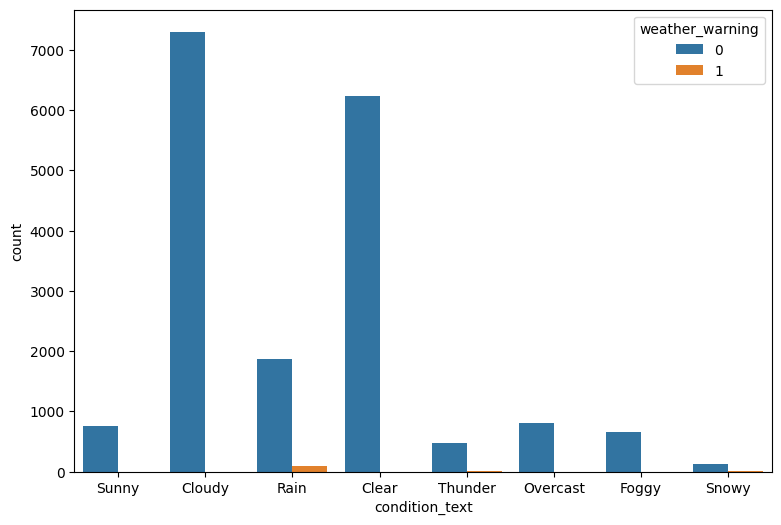

In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/daily-global-weather-csv/GlobalWeatherRepository.csv")

print(df.columns)

weather_mapping = {
    'Partly cloudy': 'Cloudy',
    'Clear': 'Clear',
    'Overcast': 'Overcast',
    'Sunny': 'Sunny',
    'Patchy rain possible': 'Rain',
    'Light rain': 'Rain',
    'Mist': 'Foggy',
    'Light rain shower': 'Rain',
    'Patchy light rain with thunder': 'Thunder',
    'Moderate or heavy rain with thunder': 'Thunder',
    'Moderate rain': 'Rain',
    'Fog': 'Foggy',
    'Cloudy': 'Cloudy',
    'Light snow': 'Snowy',
    'Light drizzle': 'Rain',
    'Moderate or heavy rain shower': 'Rain',
    'Thundery outbreaks possible': 'Thunder',
    'Patchy light drizzle': 'Rain',
    'Patchy light rain': 'Rain',
    'Moderate snow': 'Snowy',
    'Moderate rain at times': 'Rain',
    'Heavy rain': 'Rain',
    'Heavy snow': 'Snowy',
    'Patchy light snow': 'Snowy',
    'Freezing fog': 'Foggy',
    'Light freezing rain': 'Rain',
    'Light sleet': 'Rain',
    'Torrential rain shower': 'Rain',
    'Patchy moderate snow': 'Snowy',
    'Blowing snow': 'Snowy',
    'Light snow showers': 'Snowy',
    'Heavy rain at times': 'Rain',
    'Moderate or heavy snow showers': 'Snowy',
    'Moderate or heavy sleet': 'Rain',
    'Moderate or heavy snow with thunder': 'Thunder',
    'Patchy sleet possible': 'Rain',
    'Blizzard': 'Snowy',
    'Light sleet showers': 'Rain'
}
# Mapping dictionary for replacement
wind_direction_mapping = {
    'N': 'North',
    'NNE': 'North',
    'NE': 'North',
    'ENE': 'East',
    'E': 'East',
    'ESE': 'East',
    'SE': 'South',
    'SSE': 'South',
    'S': 'South',
    'SSW': 'South',
    'SW': 'South',
    'WSW': 'West',
    'W': 'West',
    'WNW': 'West',
    'NW': 'North',
    'NNW': 'North'
}

# Replace wind directions using the mapping dictionary
df['wind_direction'] = df['wind_direction'].map(wind_direction_mapping)
# Applying the mapping to the 'condition_text' column
df['condition_text'] = df['condition_text'].map(weather_mapping)

# Creating a new column 'weather_warning' based on specific conditions
df['weather_warning'] = 0  # Initialize as 0

# Setting weather_warning to 1 if there is heavy rain, thunderstorm, or blizzard
df.loc[
    (df['condition_text'].isin(['Thunder', 'Rain', 'Snowy'])) & (df['wind_mph'].notna()) & (df['wind_mph'] > 20),
    'weather_warning'
] = 1

# Converting 'weather_warning' to categorical and set it as the target
df['weather_warning'] = df['weather_warning'].astype('category')

target_column_name = 'weather_warning'

categoric_axis_name = ["Weather Condition", "Wind Direction", "Moon Phase"]
categoric_var = ["condition_text", "wind_direction", "moon_phase", target_column_name]
# Styling
title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size": 12}
axis_font = {"family": "arial", "color": "darkgreen", "weight": "bold", "size": 12}
# FacetGrid
for i, z in list(zip(categoric_var[:-1], categoric_axis_name)):
    plt.figure(figsize=(9, 6))
    sns.countplot(x=i, data=df, hue=target_column_name)

    mean_value = df.groupby(target_column_name)[i].mean()
    median_value = df.groupby(target_column_name)[i].median()

    plt.axvline(x=mean_value[0], color='blue', linestyle='--', label=f'Mean ({target_column_name} 0)')
    plt.axvline(x=mean_value[1], color='orange', linestyle='--', label=f'Mean ({target_column_name} 1)')

    plt.title(i + f" - {target_column_name}", fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel(target_column_name, fontdict=axis_font)

    plt.tight_layout()
    plt.legend()
    plt.show()


In [283]:
df['condition_text'] = df['condition_text'].map(weather_mapping)

df['weather_warning'] = 0  # Initialize as 0

# Set weather_warning to 1 if there is heavy rain, thunderstorm, or blizzard
df.loc[(df['condition_text'].isin(['Thunder', 'Rain', 'Snowy'])) & (df['wind_mph'] > 20), 'weather_warning'] = 1

# Convert 'weather_warning' to categorical and set it as the target
df['weather_warning'] = df['weather_warning'].astype('category')
target_column_name = 'weather_warning'

df['weather_warning'].value_counts()

weather_warning
0    18319
Name: count, dtype: int64

# **Numeric Variables Among Themselves (Analysis with Pair Plot)** 

In [259]:
numeric_var

['temperature_celsius', 'wind_mph', 'humidity', 'cloud', 'uv_index']

In [258]:
items_to_remove = ["latitude", "longitude", "last_updated_epoch", 'temperature_fahrenheit','pressure_mb',"wind_kph", 'precip_mm', "pressure_in", 'air_quality_Carbon_Monoxide', 'air_quality_Ozone','feels_like_celsius', 'feels_like_fahrenheit', 'precip_in','visibility_miles','gust_mph','air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index''gust_mph','moon_illumination', 'gust_kph','visibility_km','wind_degree']
# Use list comprehension to create a new list excluding items to remove
numeric_var = [item for item in numeric_var if item not in items_to_remove]


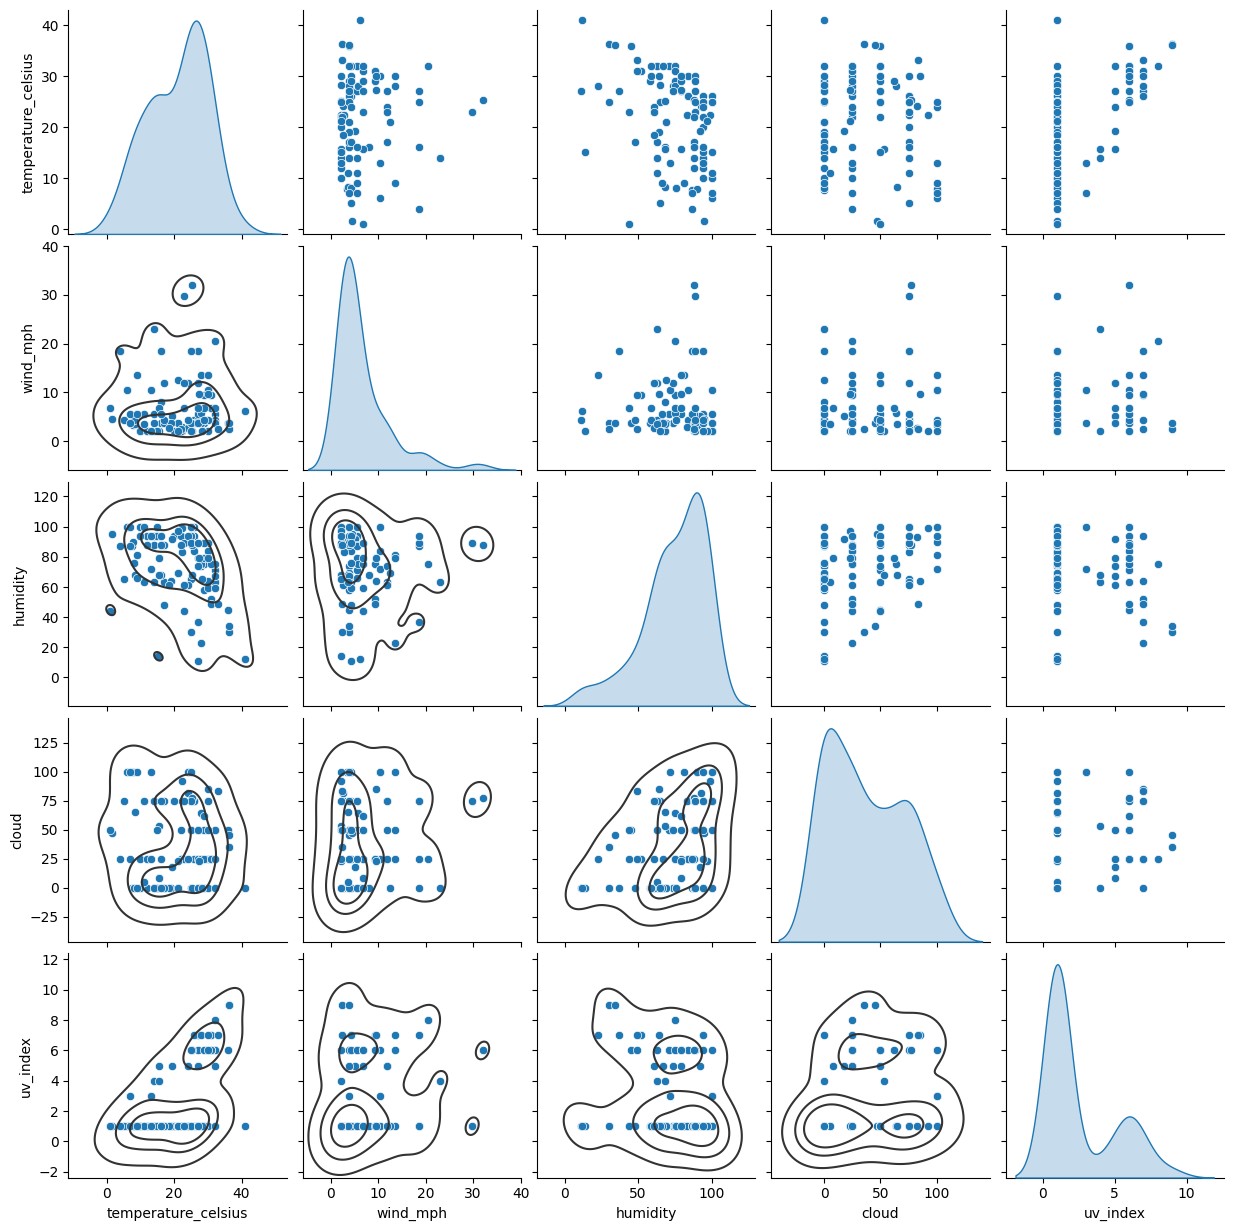

In [260]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_var = [col for col in numeric_var if col != 'target']
#Dataset is too big therefore 
# Assuming df is your DataFrame and numeric_var is your list of numeric variables
# Sample 100 (or 1000 on choice) rows randomly
df_sample = df.sample(n=100, random_state=42)  # You can change the random_state if needed

# Create the pair plot
graph = sns.pairplot(df_sample[numeric_var], diag_kind="kde")
graph.map_lower(sns.kdeplot, levels=4, color=".2")

plt.show()

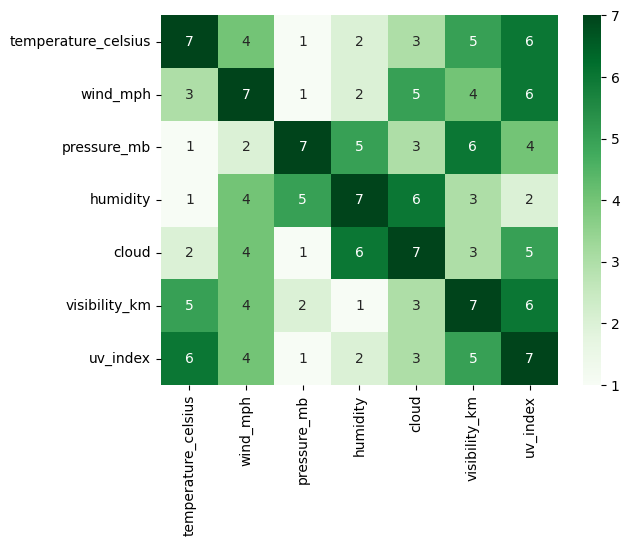

In [265]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to remove
columns_to_remove = ["latitude", "longitude", "last_updated_epoch", 'temperature_fahrenheit',
                       "wind_kph", 'precip_mm', "pressure_in",
                      'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
                      'feels_like_celsius', 'feels_like_fahrenheit', 'precip_in',
                      'visibility_miles', 'gust_mph', 'air_quality_Nitrogen_dioxide',
                      'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
                      'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'gust_mph',
                      'moon_illumination', 'gust_kph',  'wind_degree']
df_filtered = df.drop(columns=columns_to_remove, errors='ignore')

numeric_columns = df_filtered.select_dtypes(include=['number']).columns

corr = df_filtered[numeric_columns].corr()

sns.heatmap(corr.rank(axis='columns'), cmap='Greens', annot=True)

plt.show()


In [286]:
condition = (df['temperature_celsius'] > 25) & (df['humidity'] > 50)

df['target'] = condition.astype(int)
df['target'].value_counts()

target
0    12932
1     5387
Name: count, dtype: int64

****12932 locations are safe and 5387 locations have a weather warning ****

# **Finding Logistic Regression Performance**

In [289]:
X = df.drop('target',axis='columns')
y= df['target']

In [295]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
# Drop non-numeric columns that are not relevant
X_train = df.drop(['latitude', 'longitude', 'last_updated_epoch', 'temperature_fahrenheit', 'pressure_mb', 'wind_kph', 'precip_mm', 'pressure_in', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'feels_like_celsius', 'feels_like_fahrenheit', 'precip_in', 'visibility_miles', 'gust_mph', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'gust_mph', 'moon_illumination', 'gust_kph', 'visibility_km', 'wind_degree'], axis=1)
# target variable - weather warning
y_train = df['target']
# Define the columns and transformer for one-hot encoding
categorical_cols = ['location_name']
numeric_cols = X_train.columns.difference(categorical_cols)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', selector(dtype_exclude="object")),
        ('cat', OneHotEncoder(), selector(dtype_include="object"))
    ])
# Create a pipeline with the preprocessor and Logistic Regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Fit the pipeline (it will apply one-hot encoding and then fit the model)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c8590a7af50>),
                                                 ('cat', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c85a62ea1a0>)])),
                ('classifier', LogisticRegression())])

In [312]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame

# Drop non-numeric columns that are not relevant
X_train = df.drop(['latitude', 'longitude', 'last_updated_epoch', 'temperature_fahrenheit', 'pressure_mb', 'wind_kph', 'precip_mm', 'pressure_in', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'feels_like_celsius', 'feels_like_fahrenheit', 'precip_in', 'visibility_miles', 'gust_mph', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'gust_mph', 'moon_illumination', 'gust_kph', 'visibility_km', 'wind_degree'], axis=1)

# Assuming 'target' is your target variable
y_train = df['target']

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.columns.difference(numeric_cols)

# Create a preprocessor for numeric and categorical columns separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_cols),
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                 ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ])

# Create a pipeline with the preprocessor and Logistic Regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (it will impute missing values, apply one-hot encoding, and then fit the model)
pipeline.fit(X_train, y_train)

# Predict using the Logistic Regression model
y_prediction = pipeline.predict(X_test)

# Calculate and print accuracy
lr_test_acc = round(accuracy_score(y_test, y_prediction) * 100, 2)
print('Accuracy = {} %'.format(lr_test_acc))

Accuracy = 100.0 %


**demonstrates a typical workflow for preparing data and fitting a machine learning model using the Python library scikit-learn. Here's a breakdown of the code:

    Imports: The code imports necessary tools from scikit-learn for data imputation, preprocessing, pipeline creation, logistic regression modeling, data splitting, and accuracy measurement.

    Data Preparation:
        X_train is assigned all columns from the DataFrame df except for a specified list of non-numeric or irrelevant columns, which are dropped.
        y_train is assigned the target variable column from the same DataFrame.

    Feature Column Separation:
        Numeric columns are identified and separated based on their data type.
        Categorical columns are identified as those not in the numeric columns list.

    Preprocessing:
        A ColumnTransformer named preprocessor is created with two types of transformers:
            For numeric columns, SimpleImputer is used with a strategy of replacing missing values with the mean of the column.
            For categorical columns, a Pipeline is set up to first impute missing values with the most frequent value and then apply one-hot encoding to handle categorical data.

    Pipeline Creation:
        A Pipeline is built that includes the preprocessor and a logistic regression classifier as the final step.

    Data Splitting:
        The train_test_split function is called to split the data into training and test sets, using 80% of the data for training and 20% for testing. The random_state parameter is set to 42 for reproducibility.

    Model Training:
        The pipeline is fitted to the training data, which involves imputation, one-hot encoding, and fitting the logistic regression model.

    Prediction:
        The trained pipeline is used to predict the target variable on the test set.

    Accuracy Calculation:
        The accuracy_score function is used to calculate the percentage of correct predictions. The result is rounded to two decimal places and printed out.**

In [314]:
print(classification_report(

    y_test,
    pipeline.predict(X_test)

))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2576
           1       1.00      1.00      1.00      1088

    accuracy                           1.00      3664
   macro avg       1.00      1.00      1.00      3664
weighted avg       1.00      1.00      1.00      3664



# **Comparing Logistic Regression and K-Nearest Neighbors (KNN) on a Classification Dataset**

In [319]:
# Defining numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Creating transformers for numeric and categorical columns
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creating again a preprocessor using ColumnTransformer because we have different types of data which are not numbers.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating KNN classifier
knn_classifier = KNeighborsClassifier()
# Create a pipeline with the preprocessor and KNN model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn_classifier)
])
# pipeline (in order to handle missing values, applying encoding, and then put/fit the KNN model)
pipeline.fit(X_train, y_train)

#------------------------------------------------------------------------------------------------------------------------------
# Prediction using KNN
y_pred_knn = pipeline.predict(X_test)
#------------------------------------------------------------------------------------------------------------------------------
# Calculate and print accuracy for KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy: {:.2f}%".format(knn_accuracy * 100))
#------------------------------------------------------------------------------------------------------------------------------
# Now compare with Logistic Regression accuracy
lr_accuracy = lr_test_acc / 100  # Assuming lr_test_acc is the logistic regression accuracy
print("Logistic Regression Accuracy: {:.2f}%".format(lr_accuracy * 100))
#------------------------------------------------------------------------------------------------------------------------------

KNN Accuracy: 97.46%
Logistic Regression Accuracy: 100.00%


**# Defining numeric and categorical columns

numeric_cols = X_train.select_dtypes(include=['number']).columns

categorical_cols = X_train.select_dtypes(include=['object']).columns

​

# Creating transformers for numeric and categorical columns

numeric_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[

    ('imputer', SimpleImputer(strategy='most_frequent')),

    ('onehot', OneHotEncoder(handle_unknown='ignore'))

])

​

# Creating again a preprocessor using ColumnTransformer because we have different types of data which are not numbers.

preprocessor = ColumnTransformer(

    transformers=[

        ('num', numeric_transformer, numeric_cols),

        ('cat', categorical_transformer, categorical_cols)

    ])

​

# Creating KNN classifier

knn_classifier = KNeighborsClassifier()

# Create a pipeline with the preprocessor and KNN model

pipeline = Pipeline([

    ('preprocessor', preprocessor),

    ('classifier', knn_classifier)

])

# pipeline (in order to handle missing values, applying encoding, and then put/fit the KNN model)

pipeline.fit(X_train, y_train)

​

#------------------------------------------------------------------------------------------------------------------------------

# Prediction using KNN

y_pred_knn = pipeline.predict(X_test)

#------------------------------------------------------------------------------------------------------------------------------

# Calculate and print accuracy for KNN

knn_accuracy = accuracy_score(y_test, y_pred_knn)

print("KNN Accuracy: {:.2f}%".format(knn_accuracy * 100))

#------------------------------------------------------------------------------------------------------------------------------

# Now compare with Logistic Regression accuracy

lr_accuracy = lr_test_acc / 100  # Assuming lr_test_acc is the logistic regression accuracy

print("Logistic Regression Accuracy: {:.2f}%".format(lr_accuracy * 100))

#------------------------------------------------------------------------------------------------------------------------------

KNN Accuracy: 97.46%
Logistic Regression Accuracy: 100.00%**


# **Finding Linear Regression Performance**

In [331]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

X_reg = df.drop(["target"], axis=1)
y_reg = df["target"]
numeric_cols = X_reg.select_dtypes(include=['number']).columns
non_numeric_cols = X_reg.select_dtypes(exclude=['number']).columns

numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, non_numeric_cols)
    ])

# Impute missing values and perform one-hot encoding
X_reg_imputed_encoded = preprocessor.fit_transform(X_reg)

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_imputed_encoded, y_reg, test_size=0.2, random_state=42)
# Creating a Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_reg, y_train_reg)
# Predict using Linear Regression
y_pred_reg = linear_reg_model.predict(X_test_reg)
# Calculating and print Mean Squared Error for Linear Regression
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print("Linear Regression Mean Squared Error: {:.2f}".format(mse_reg))


Linear Regression Mean Squared Error: 0.11


**setting up a regression modeling process using a Linear Regression model. Here's a detailed description of what each part of the code is doing:

    Library Imports:
        Several classes are imported from scikit-learn for data preprocessing, model creation, and evaluation.

    Data Preparation:
        X_reg is created by dropping the target column from the DataFrame df. This leaves only the features used for prediction.
        y_reg is set to the target column from df, which contains the values we want to predict.

    Feature Column Categorization:
        numeric_cols identifies all columns in X_reg that contain numeric data.
        non_numeric_cols identifies all columns in X_reg that do not contain numeric data.

    Transformers Creation:
        numeric_transformer uses SimpleImputer with a strategy of filling missing numeric values with the mean of their respective columns.
        categorical_transformer is a pipeline that imputes missing values in non-numeric columns with the most frequent category and then applies one-hot encoding to convert categorical variables into a format that can be provided to a machine learning model. The handle_unknown='ignore' parameter tells the transformer to ignore categories in the validation set that were not present in the training set.

    Preprocessing:
        A ColumnTransformer named preprocessor is created to apply the numeric and categorical transformers to their respective columns.

    Data Preprocessing:
        The fit_transform method is called on X_reg using the preprocessor. This step imputes missing values and performs one-hot encoding on the dataset.

    Data Splitting:
        The train_test_split function is used to divide the dataset into training and testing sets, with 80% of the data used for training and 20% reserved for testing. The random_state is set for reproducibility.

    Model Creation and Training:
        A LinearRegression model is instantiated and trained on the processed training data.

    Prediction:
        The trained model is used to make predictions on the processed test data.

    Evaluation:

    The mean_squared_error function is used to calculate the Mean Squared Error (MSE) between the predicted values and the actual target values in the test set. MSE is a common evaluation metric for regression models, representing the average of the squares of the errors.

    Output:

    Finally, the code prints the calculated Mean Squared Error for the Linear Regression model, formatted to two decimal places.**

**Uses the mean_squared_error function from scikit-learn to calculate the mean squared error between the actual target values (y_test_reg) and the predicted values (y_pred_reg) obtained from the linear regression model.**